# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l1_active/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/1320388319_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/1795225096_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.5.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.6.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.7.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.8.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.9.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l1_active/1320388319_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


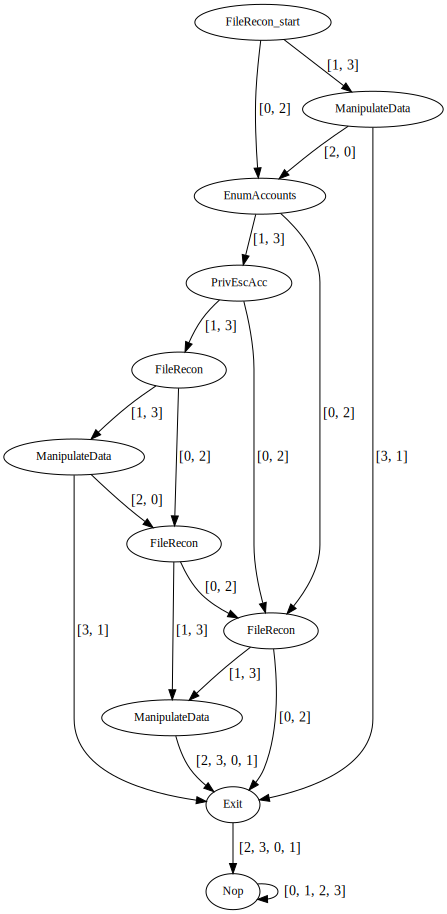

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l1_active/1795225096_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


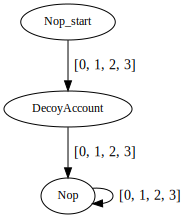

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l1_active/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                       file_write
8                               1.0                       file_write
9                               1.0                        file_enum

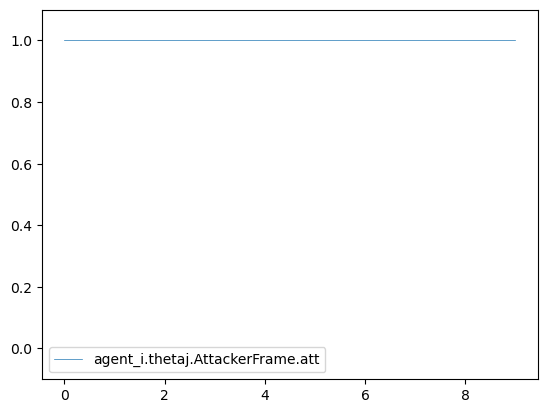

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

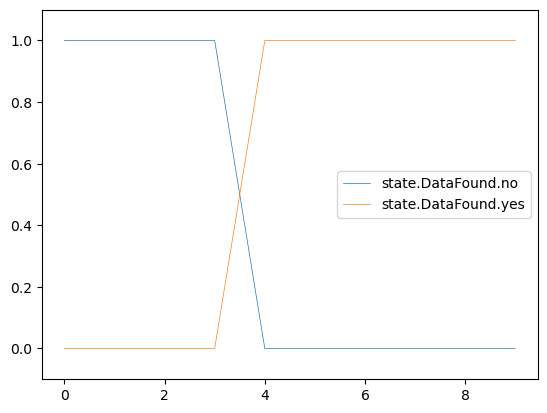

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.579282               0.420718            Nop  ManipulateData   
5              0.459130               0.540870            Nop            Exit   
6              0.490704               0.509296            Nop             Nop   
7              0.487993               0.512007            Nop             Nop   
8              0.470864               0.529136            Nop             Nop   
9              0.470647               0.529353            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                        file_enum

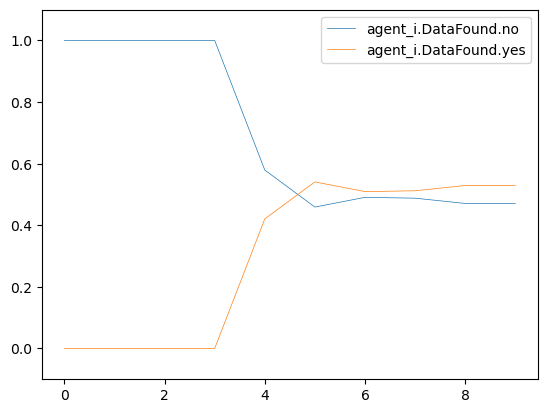

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.211914               0.788086  ManipulateData            Nop   
5              0.000269               0.999731            Exit            Nop   
6              0.000269               0.999731             Nop            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                   user_files                           failure

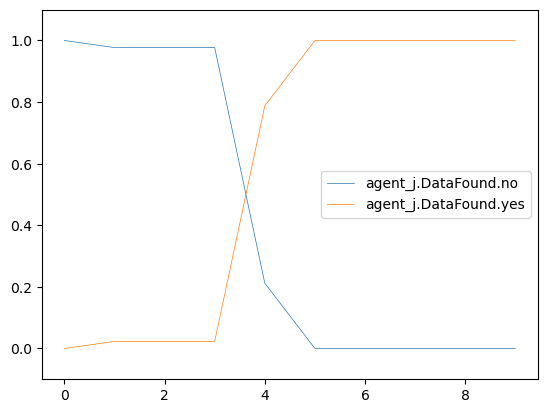

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

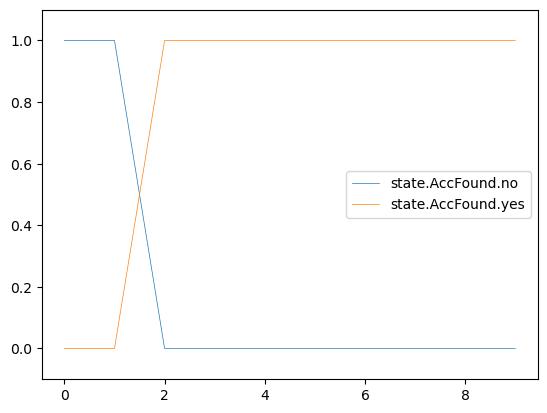

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.619900              0.380100            Nop       FileRecon   
4             0.315250              0.684750            Nop  ManipulateData   
5             0.315250              0.684750            Nop            Exit   
6             0.393471              0.606529            Nop             Nop   
7             0.390387              0.609613            Nop             Nop   
8             0.375734              0.624266            Nop             Nop   
9             0.375548              0.624452            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                        file_enum

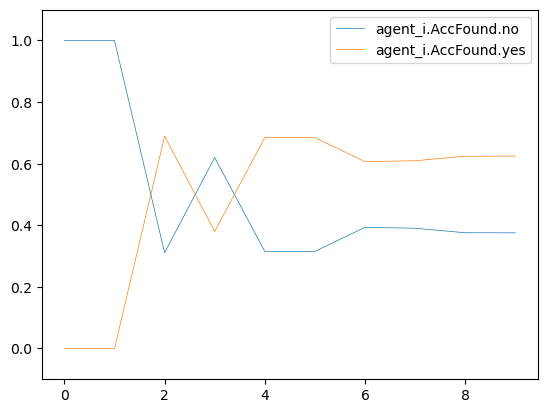

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.171048              0.828952      PrivEscAcc            Nop   
3             0.000207              0.999794       FileRecon            Nop   
4             0.000104              0.999896  ManipulateData            Nop   
5             0.000060              0.999940            Exit            Nop   
6             0.000060              0.999940             Nop            Nop   
7             0.000060              0.999940             Nop            Nop   
8             0.000060              0.999940             Nop            Nop   
9             0.000060              0.999940             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                   user_files                           failure

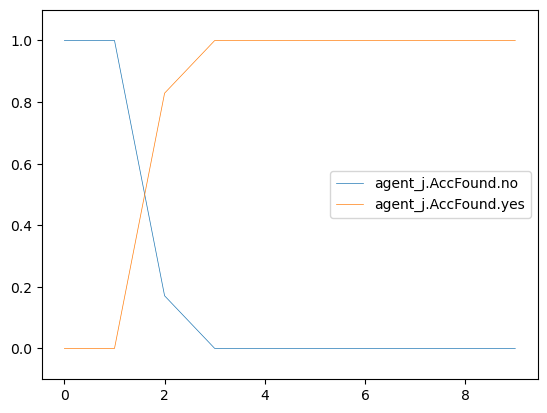

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

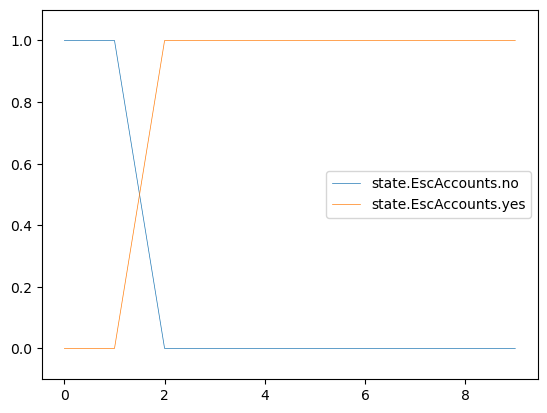

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                        file_enum

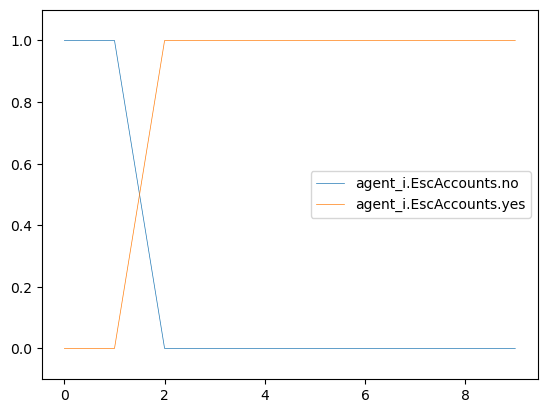

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005    EnumAccounts   
2                0.131574                 0.868426      PrivEscAcc   
3                0.000159                 0.999841       FileRecon   
4                0.000080                 0.999920  ManipulateData   
5                0.000046                 0.999954            Exit   
6                0.000046                 0.999954             Nop   
7                0.000046                 0.999954             Nop   
8                0.000046                 0.999954             Nop   
9                0.000046                 0.999954             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

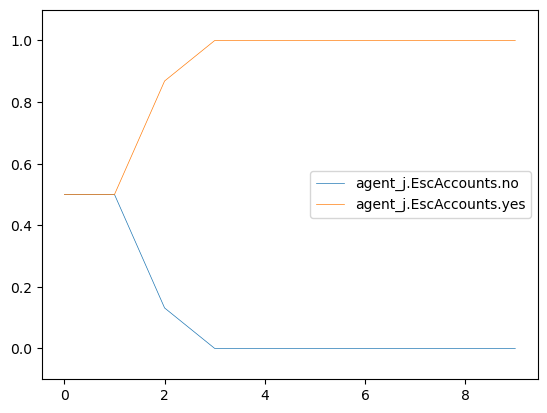

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

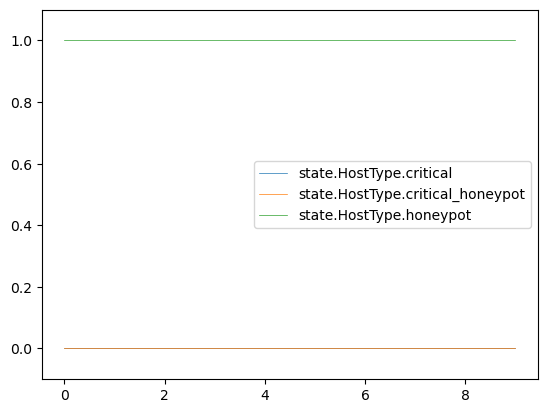

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                        file_enum

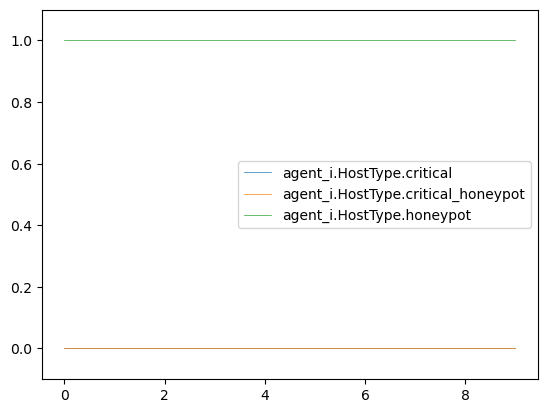

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                   user_files                           failure

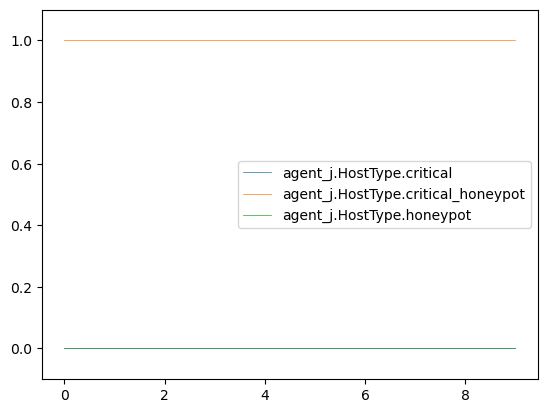

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

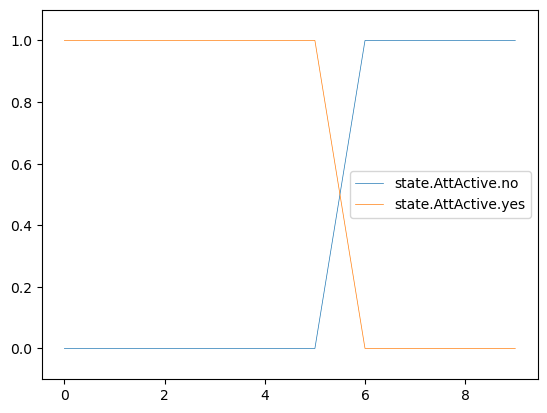

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount    EnumAccounts   
2              0.000000               1.000000            Nop      PrivEscAcc   
3              0.000005               0.999995            Nop       FileRecon   
4              0.291929               0.708071            Nop  ManipulateData   
5              0.382706               0.617294            Nop            Exit   
6              0.958604               0.041396            Nop             Nop   
7              0.980689               0.019311            Nop             Nop   
8              0.956088               0.043912            Nop             Nop   
9              0.999421               0.000579            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                        file_enum

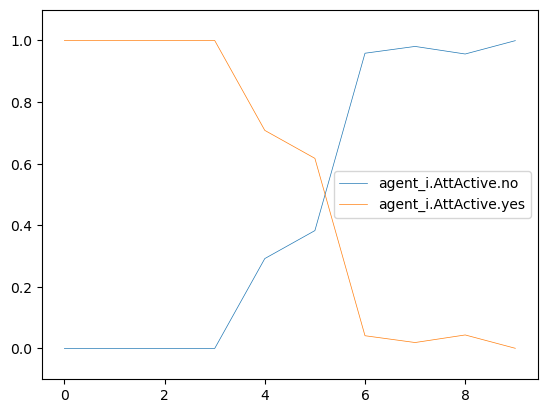

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                   user_files                           failure

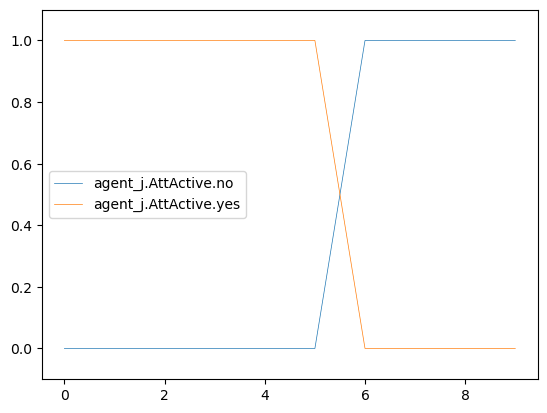

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

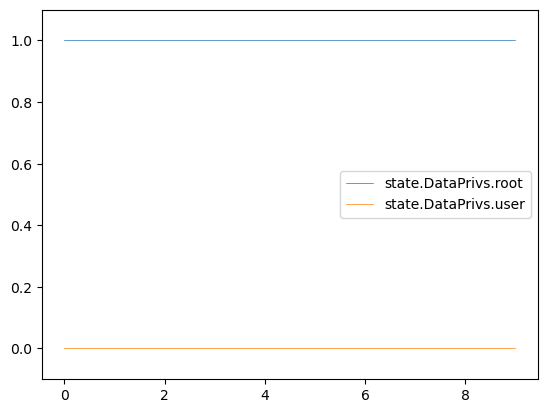

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                        file_enum

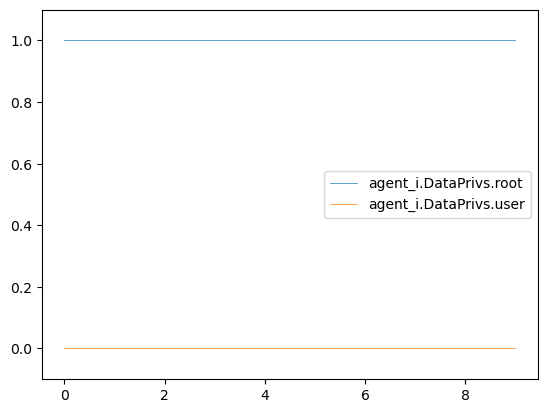

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592109                0.407891    EnumAccounts   
2                0.592113                0.407886      PrivEscAcc   
3                0.592118                0.407882       FileRecon   
4                0.673738                0.326262  ManipulateData   
5                0.708589                0.291411            Exit   
6                0.708592                0.291408             Nop   
7                0.708595                0.291405             Nop   
8                0.708598                0.291402             Nop   
9                0.708601                0.291399             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

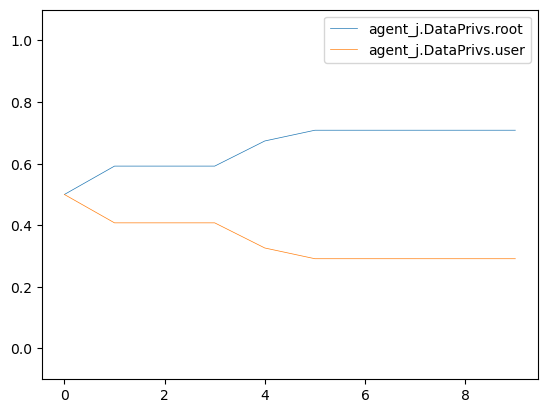

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

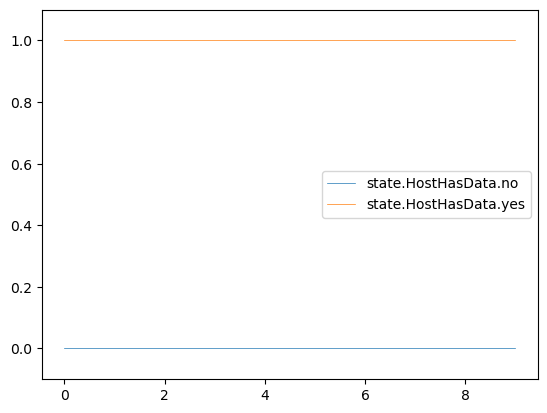

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                        file_enum

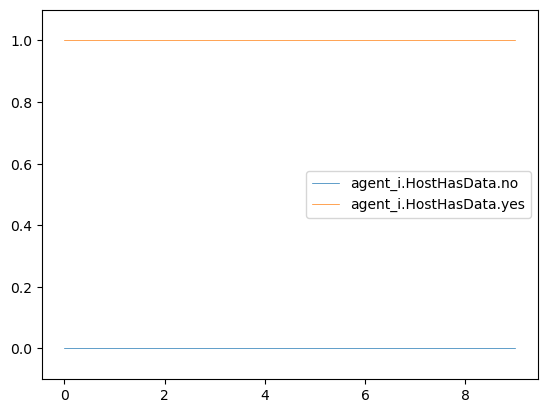

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.177323                 0.822677  ManipulateData   
5                0.000225                 0.999775            Exit   
6                0.000225                 0.999775             Nop   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

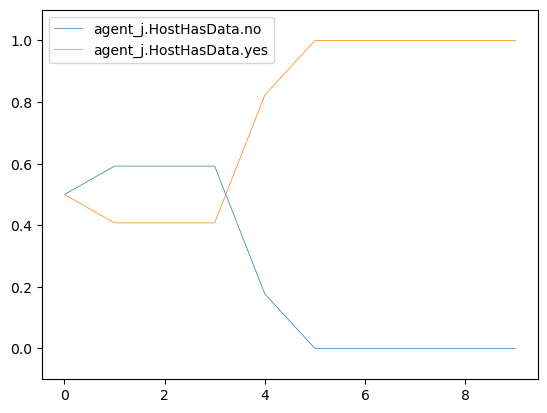

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

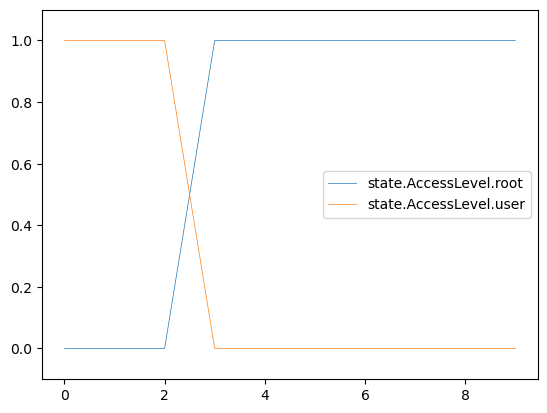

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.199936                  0.800064            Nop   
4                  0.610556                  0.389444            Nop   
5                  0.610556                  0.389444            Nop   
6                  0.513908                  0.486092            Nop   
7                  0.517719                  0.482281            Nop   
8                  0.535821                  0.464179            Nop   
9                  0.536051                  0.463949            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                        file_enum

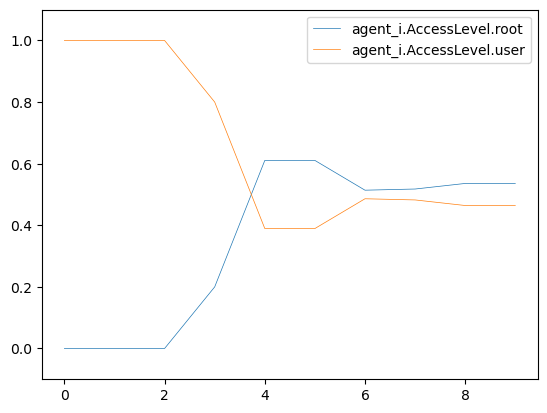

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999794                  0.000207       FileRecon   
4                  0.999896                  0.000104  ManipulateData   
5                  0.999940                  0.000060            Exit   
6                  0.999940                  0.000060             Nop   
7                  0.999940                  0.000060             Nop   
8                  0.999940                  0.000060             Nop   
9                  0.999940                  0.000060             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

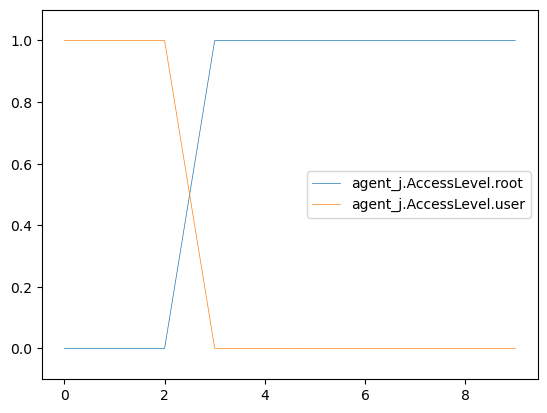

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

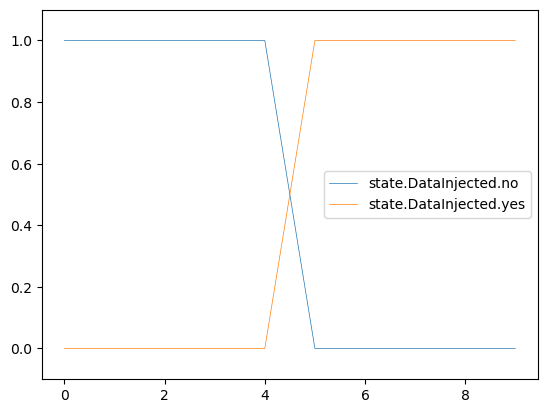

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.621354                  0.378646            Nop   
6                 0.501681                  0.498319            Nop   
7                 0.495790                  0.504210            Nop   
8                 0.472433                  0.527567            Nop   
9                 0.472136                  0.527864            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                        file_enum

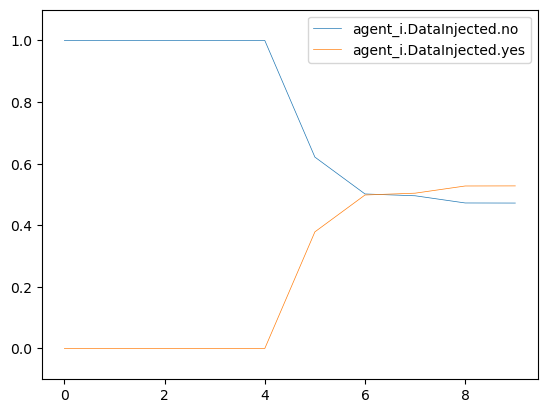

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000269                  0.999731            Exit   
6                 0.000269                  0.999731             Nop   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

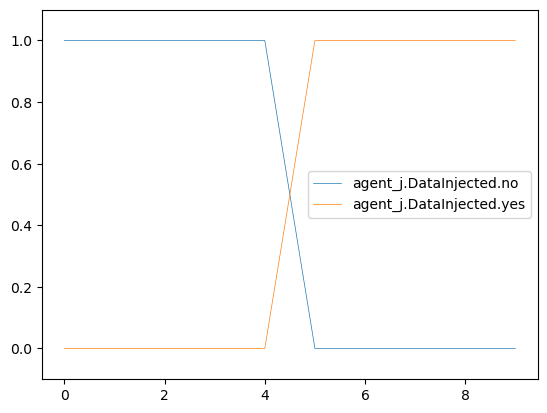

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                   login_activity
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

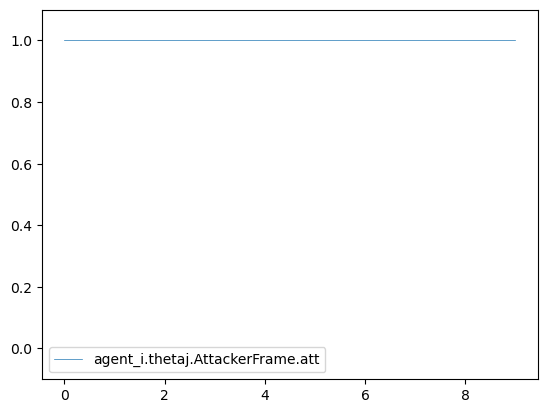

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount  ManipulateData
2                 1.0                  0.0            Nop    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

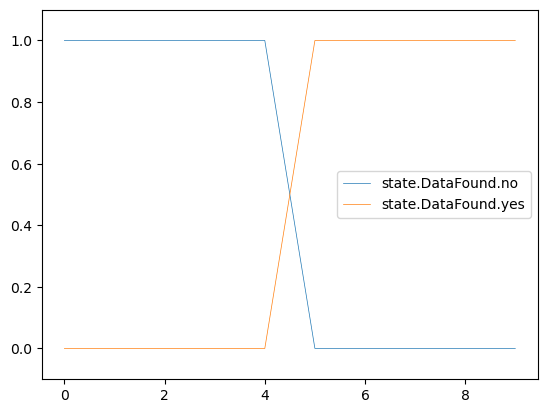

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount  ManipulateData   
2              1.000000               0.000000            Nop    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              0.649790               0.350210            Nop       FileRecon   
5              0.529327               0.470673            Nop  ManipulateData   
6              0.211300               0.788700            Nop            Exit   
7              0.162009               0.837991            Nop             Nop   
8              0.160227               0.839773            Nop             Nop   
9              0.160295               0.839705            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                   login_activity  
4                             none  
5                       file_write  
6                       file_write  
7                             none  
8                             none  
9                             none

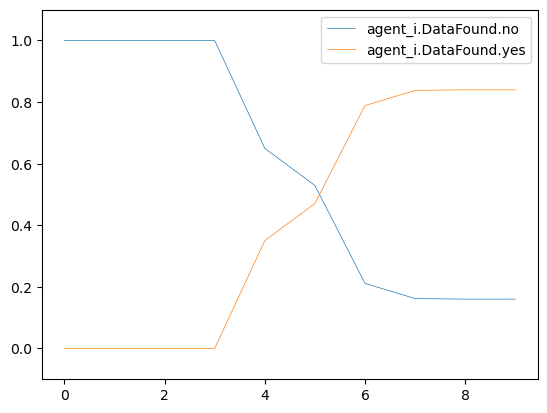

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.343750               0.656250  ManipulateData   DecoyAccount   
2              0.998074               0.001926    EnumAccounts            Nop   
3              0.998074               0.001926      PrivEscAcc            Nop   
4              0.998074               0.001926       FileRecon            Nop   
5              0.224719               0.775281  ManipulateData            Nop   
6              0.000290               0.999710            Exit            Nop   
7              0.000290               0.999710             Nop            Nop   
8              0.000290               0.999710             Nop            Nop   
9              0.000290               0.999710             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

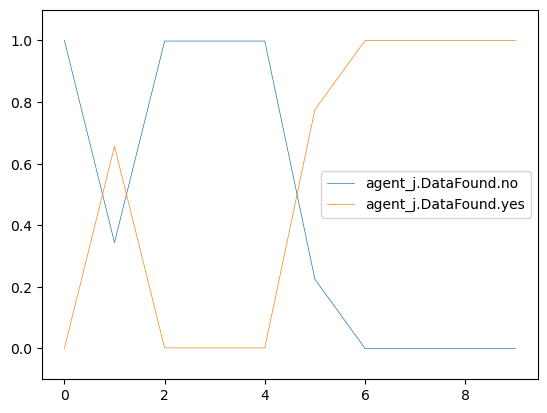

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount  ManipulateData
2                1.0                 0.0            Nop    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

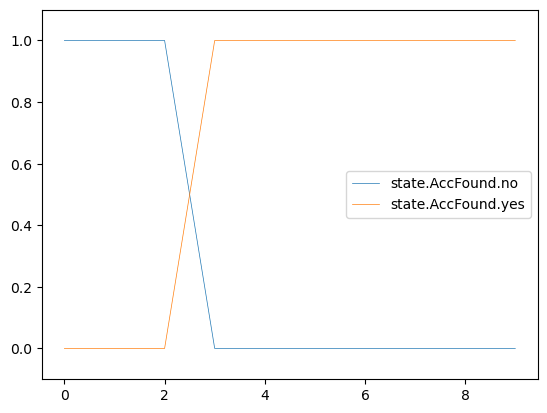

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount  ManipulateData   
2             0.606250              0.393750            Nop    EnumAccounts   
3             0.124417              0.875583            Nop      PrivEscAcc   
4             0.096854              0.903146            Nop       FileRecon   
5             0.353307              0.646693            Nop  ManipulateData   
6             0.144668              0.855332            Nop            Exit   
7             0.118538              0.881463            Nop             Nop   
8             0.121101              0.878899            Nop             Nop   
9             0.121166              0.878834            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                   login_activity  
4                             none  
5                       file_write  
6                       file_write  
7                             none  
8                             none  
9                             none

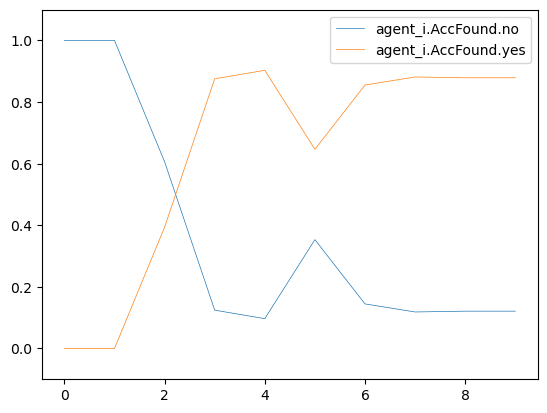

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000  ManipulateData   DecoyAccount   
2             1.000000              0.000000    EnumAccounts            Nop   
3             0.171046              0.828954      PrivEscAcc            Nop   
4             0.000207              0.999794       FileRecon            Nop   
5             0.000098              0.999902  ManipulateData            Nop   
6             0.000049              0.999951            Exit            Nop   
7             0.000049              0.999951             Nop            Nop   
8             0.000049              0.999951             Nop            Nop   
9             0.000049              0.999951             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

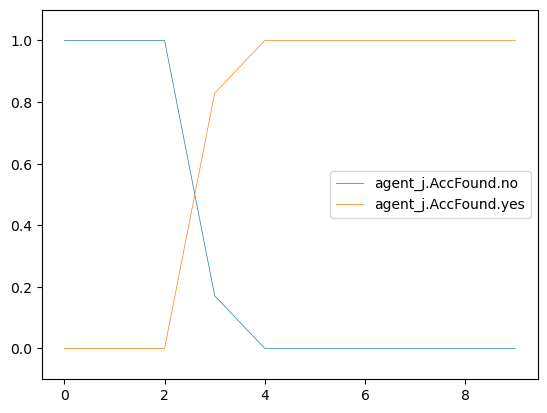

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

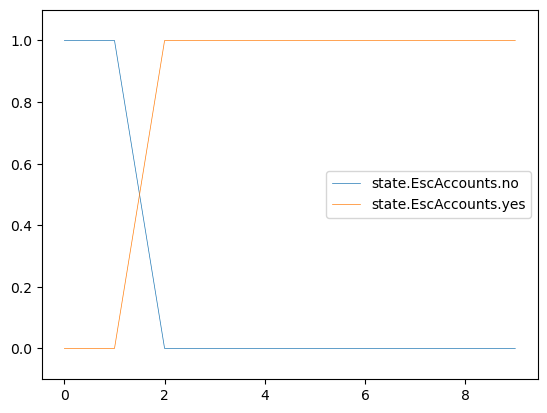

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                   login_activity  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

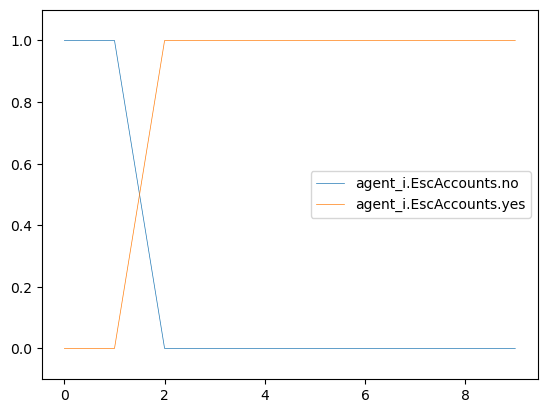

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005  ManipulateData   
2                0.499990                 0.500010    EnumAccounts   
3                0.131572                 0.868428      PrivEscAcc   
4                0.000159                 0.999841       FileRecon   
5                0.000075                 0.999925  ManipulateData   
6                0.000038                 0.999962            Exit   
7                0.000038                 0.999962             Nop   
8                0.000038                 0.999962             Nop   
9                0.000038                 0.999962             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

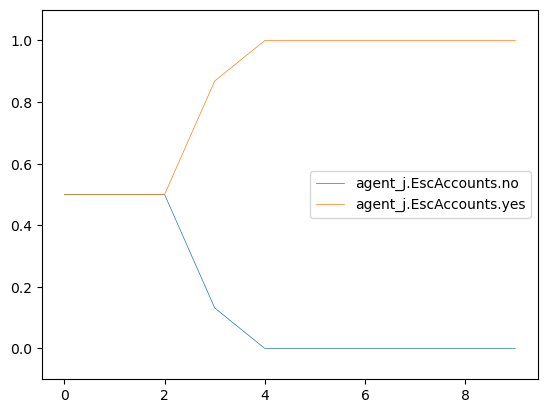

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount  ManipulateData  
2                      1.0            Nop    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

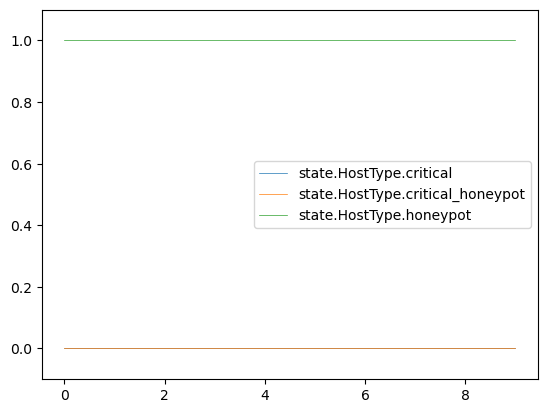

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount  ManipulateData   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                   login_activity  
4                             none  
5                       file_write  
6                       file_write  
7                             none  
8                             none  
9                             none

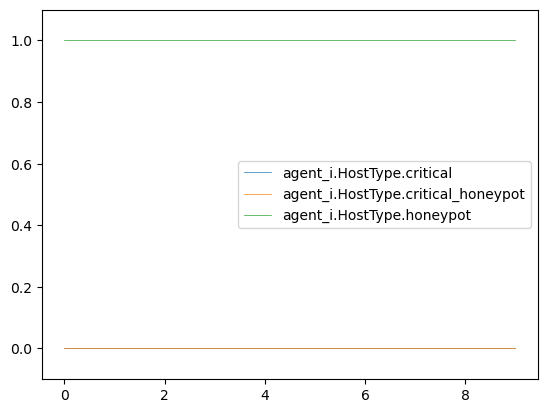

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0  ManipulateData   DecoyAccount   
2                        0.0    EnumAccounts            Nop   
3                        0.0      PrivEscAcc            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0  ManipulateData            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

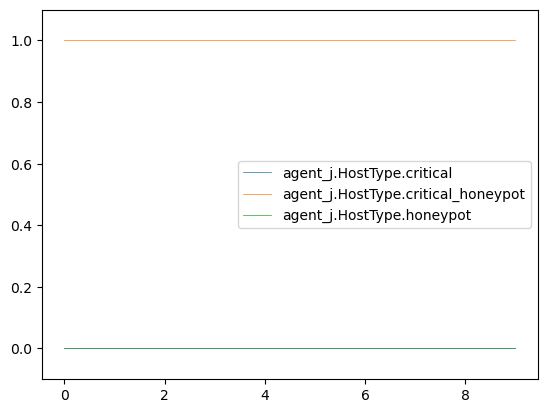

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount  ManipulateData
2                 0.0                  1.0            Nop    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

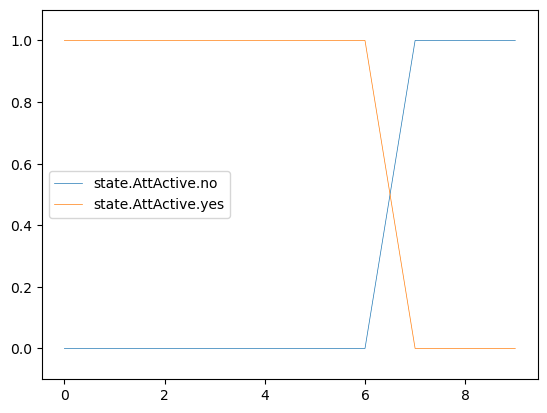

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount  ManipulateData   
2              0.000000               1.000000            Nop    EnumAccounts   
3              0.000136               0.999864            Nop      PrivEscAcc   
4              0.034803               0.965197            Nop       FileRecon   
5              0.400807               0.599193            Nop  ManipulateData   
6              0.249561               0.750439            Nop            Exit   
7              0.761892               0.238108            Nop             Nop   
8              0.996392               0.003608            Nop             Nop   
9              0.999911               0.000089            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                   login_activity  
4                             none  
5                       file_write  
6                       file_write  
7                             none  
8                             none  
9                             none

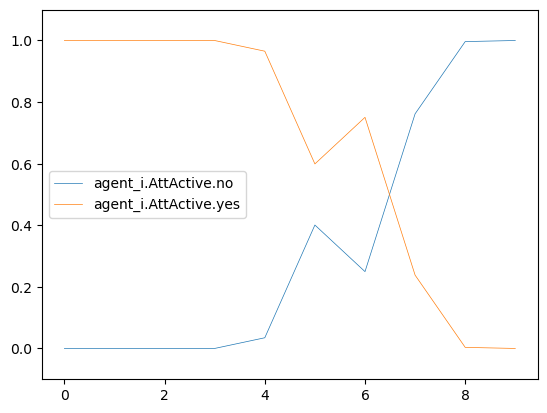

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData   DecoyAccount   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

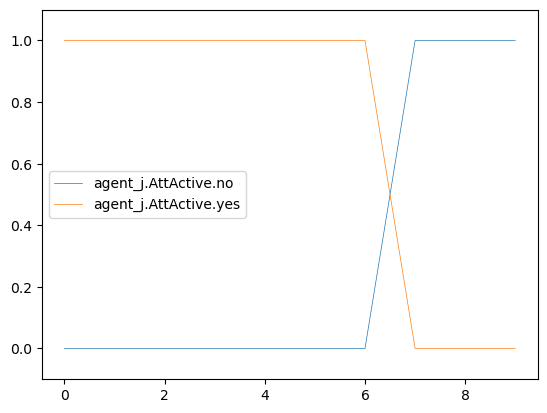

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount  ManipulateData
2                   1.0                   0.0            Nop    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

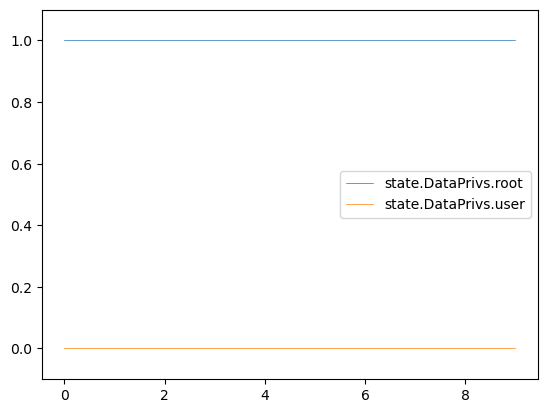

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                   login_activity  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

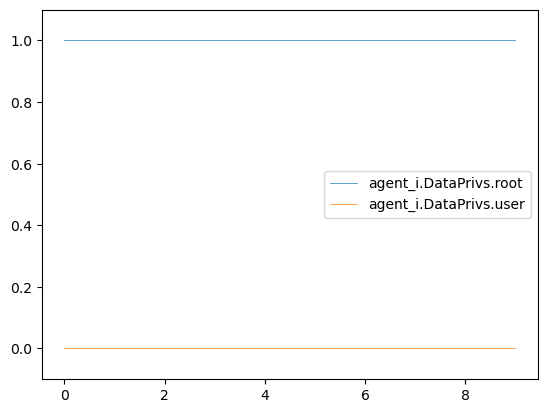

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.208341                0.791659  ManipulateData   
2                0.604920                0.395080    EnumAccounts   
3                0.604924                0.395076      PrivEscAcc   
4                0.604928                0.395072       FileRecon   
5                0.714502                0.285498  ManipulateData   
6                0.763866                0.236134            Exit   
7                0.763868                0.236132             Nop   
8                0.763871                0.236129             Nop   
9                0.763873                0.236127             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

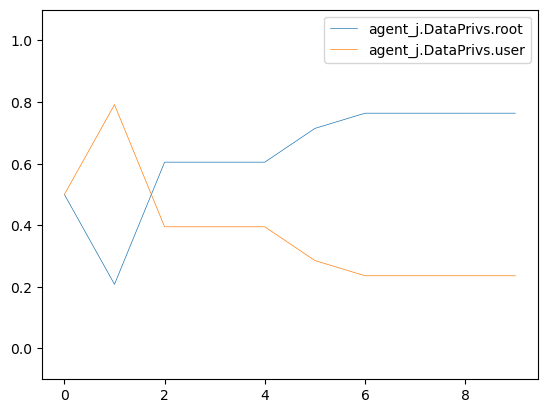

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

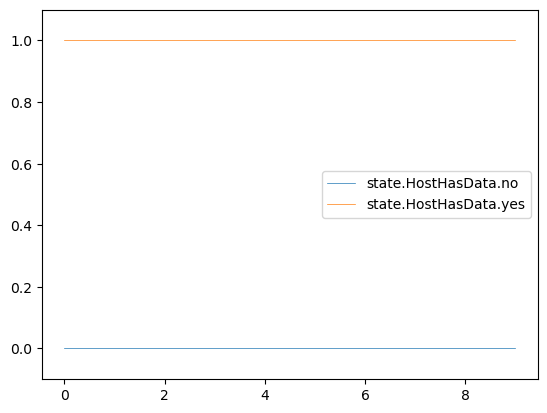

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                   login_activity  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

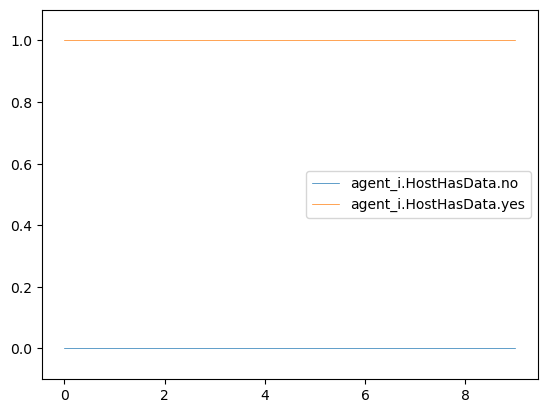

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.208333                 0.791667  ManipulateData   
2                0.604893                 0.395107    EnumAccounts   
3                0.604893                 0.395107      PrivEscAcc   
4                0.604893                 0.395107       FileRecon   
5                0.188038                 0.811962  ManipulateData   
6                0.000243                 0.999757            Exit   
7                0.000243                 0.999757             Nop   
8                0.000243                 0.999757             Nop   
9                0.000243                 0.999757             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

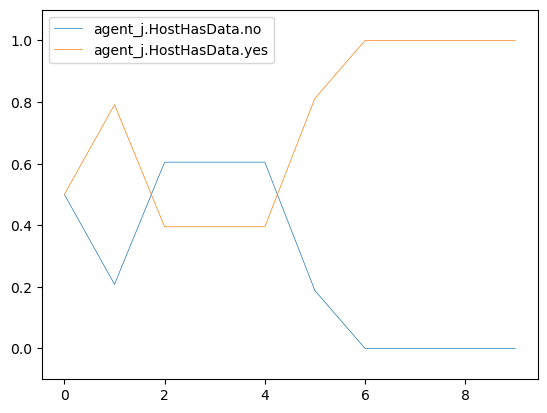

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

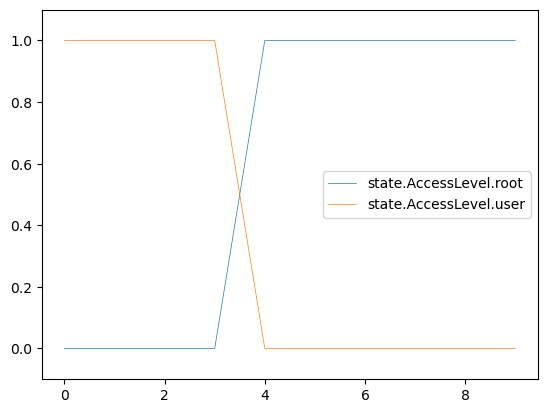

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.768590                  0.231410            Nop   
4                  0.889034                  0.110966            Nop   
5                  0.584278                  0.415722            Nop   
6                  0.830292                  0.169708            Nop   
7                  0.860947                  0.139054            Nop   
8                  0.857939                  0.142061            Nop   
9                  0.857863                  0.142137            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                   login_activity  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

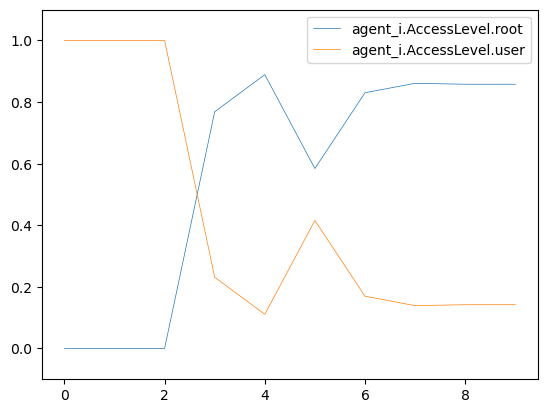

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999794                  0.000207       FileRecon   
5                  0.999902                  0.000098  ManipulateData   
6                  0.999951                  0.000049            Exit   
7                  0.999951                  0.000049             Nop   
8                  0.999951                  0.000049             Nop   
9                  0.999951                  0.000049             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

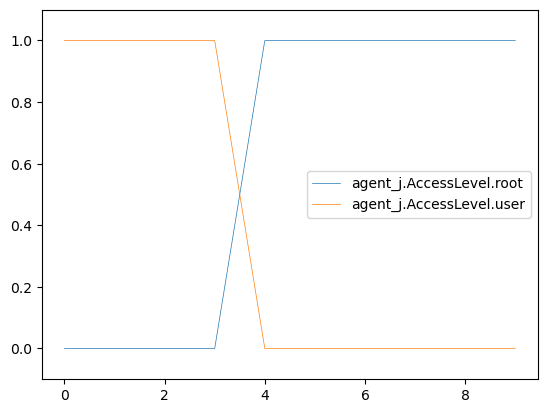

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

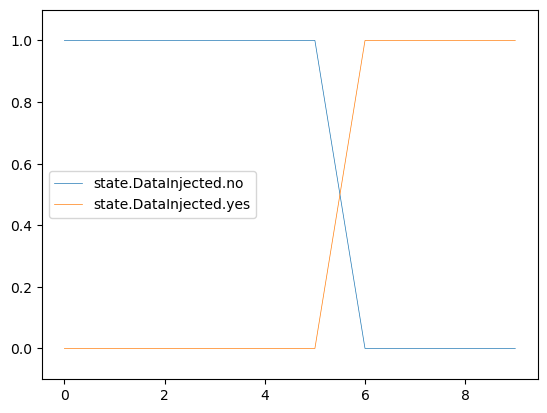

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.793093                  0.206907            Nop   
6                 0.250748                  0.749252            Nop   
7                 0.182487                  0.817513            Nop   
8                 0.162543                  0.837457            Nop   
9                 0.162014                  0.837986            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                   login_activity  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

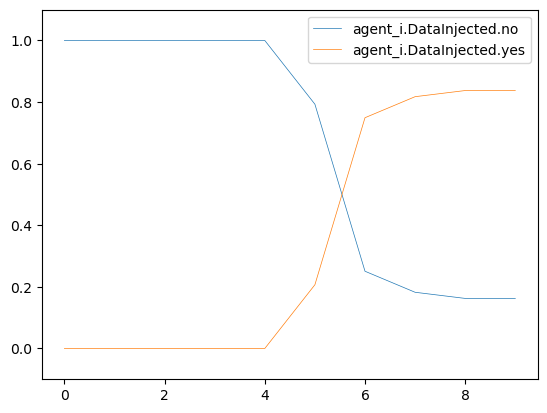

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.998093                  0.001907    EnumAccounts   
3                 0.998093                  0.001907      PrivEscAcc   
4                 0.998093                  0.001907       FileRecon   
5                 0.994664                  0.005336  ManipulateData   
6                 0.000290                  0.999710            Exit   
7                 0.000290                  0.999710             Nop   
8                 0.000290                  0.999710             Nop   
9                 0.000290                  0.999710             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

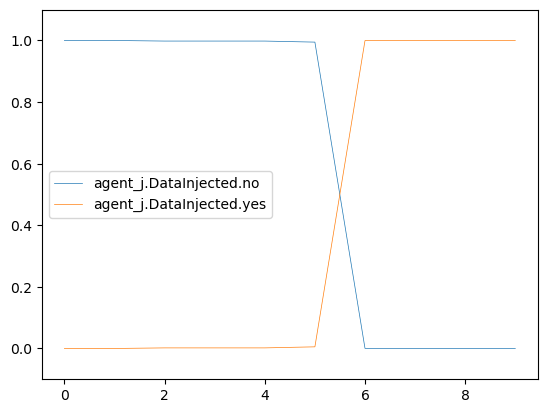

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                   login_activity
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

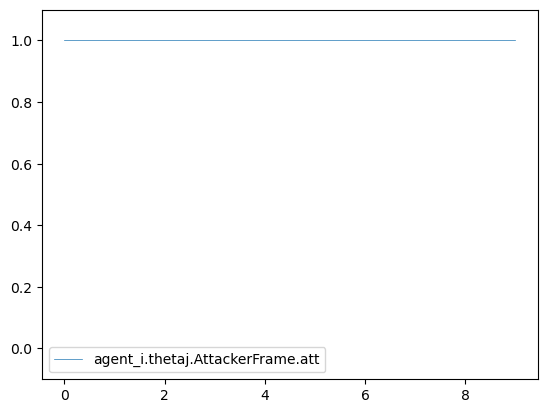

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

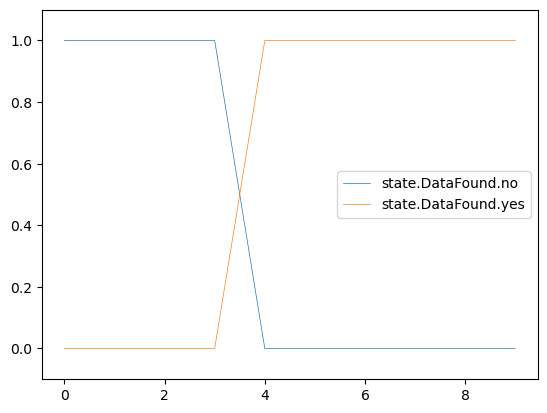

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.345530               0.654470            Nop       FileRecon   
5              0.214498               0.785502            Nop  ManipulateData   
6              0.095492               0.904508            Nop            Exit   
7              0.098493               0.901507            Nop             Nop   
8              0.098501               0.901499            Nop             Nop   
9              0.098501               0.901499            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                        file_enum

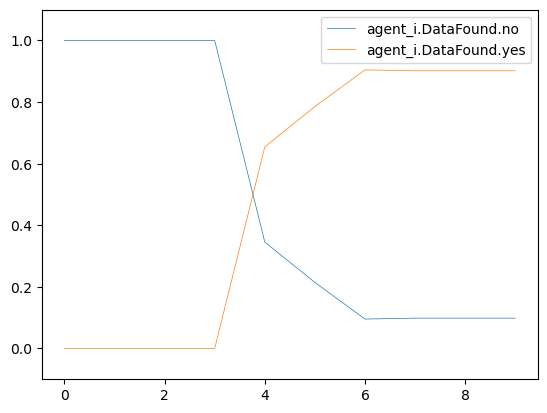

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.956103               0.043897       FileRecon            Nop   
5              0.380691               0.619309  ManipulateData            Nop   
6              0.000615               0.999385            Exit            Nop   
7              0.000615               0.999385             Nop            Nop   
8              0.000615               0.999385             Nop            Nop   
9              0.000615               0.999385             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           success

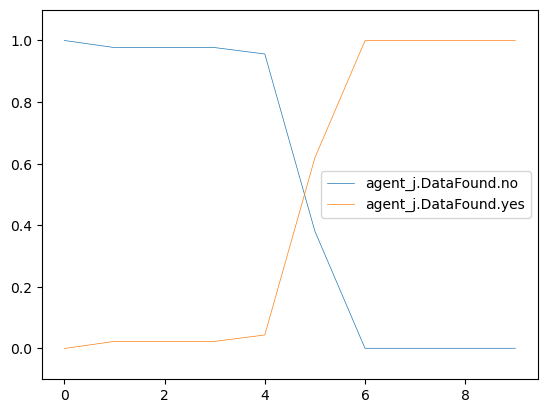

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

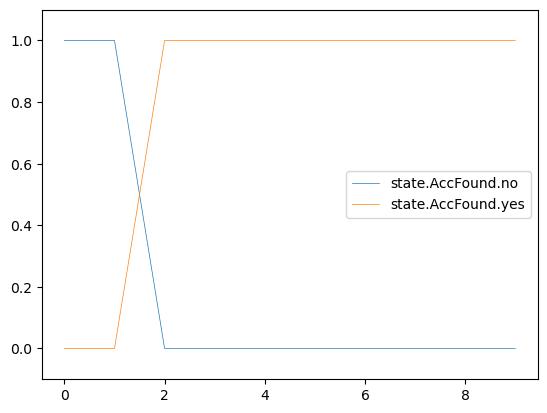

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.370000              0.630000            Nop      PrivEscAcc   
3             0.101242              0.898758            Nop       FileRecon   
4             0.059157              0.940843            Nop       FileRecon   
5             0.020556              0.979444            Nop  ManipulateData   
6             0.061163              0.938837            Nop            Exit   
7             0.065261              0.934739            Nop             Nop   
8             0.065272              0.934728            Nop             Nop   
9             0.065272              0.934728            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                        file_enum

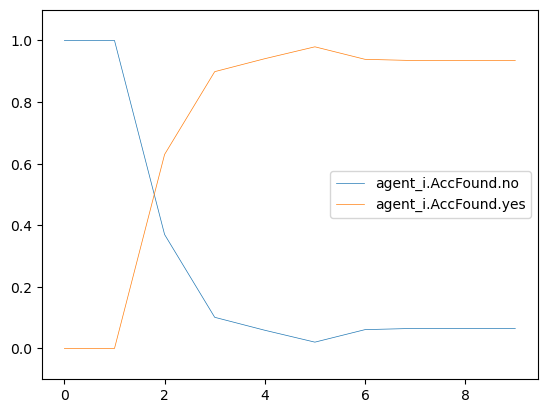

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.171048              0.828952      PrivEscAcc            Nop   
3             0.000207              0.999794       FileRecon            Nop   
4             0.000258              0.999742       FileRecon            Nop   
5             0.000144              0.999856  ManipulateData            Nop   
6             0.000051              0.999949            Exit            Nop   
7             0.000051              0.999949             Nop            Nop   
8             0.000051              0.999949             Nop            Nop   
9             0.000051              0.999949             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           success

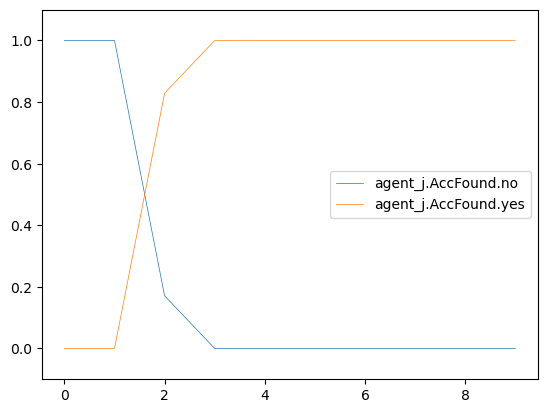

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

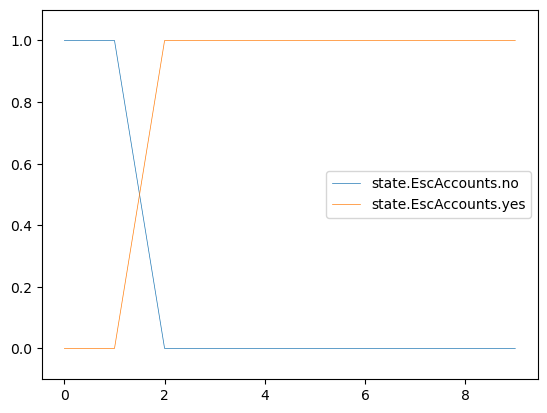

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

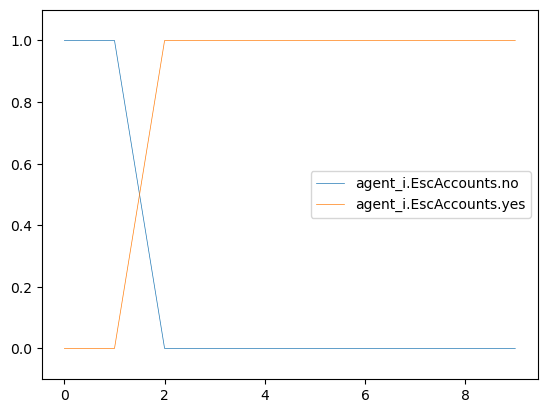

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005    EnumAccounts   
2                0.131574                 0.868426      PrivEscAcc   
3                0.000159                 0.999841       FileRecon   
4                0.000198                 0.999802       FileRecon   
5                0.000111                 0.999889  ManipulateData   
6                0.000040                 0.999961            Exit   
7                0.000040                 0.999961             Nop   
8                0.000040                 0.999961             Nop   
9                0.000040                 0.999961             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

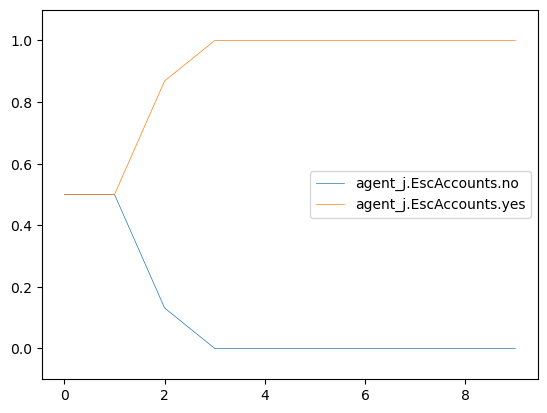

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

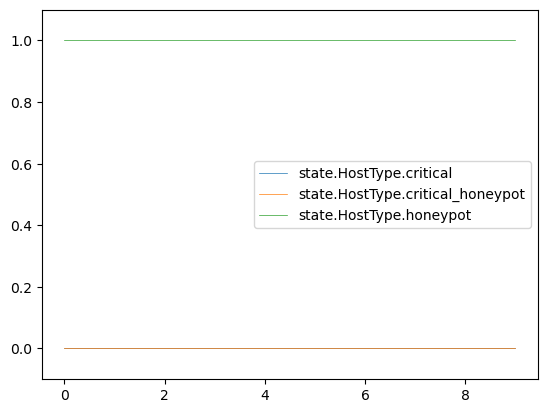

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                        file_enum

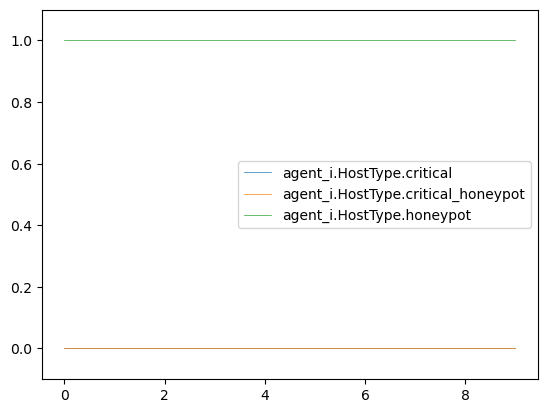

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0  ManipulateData            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           success

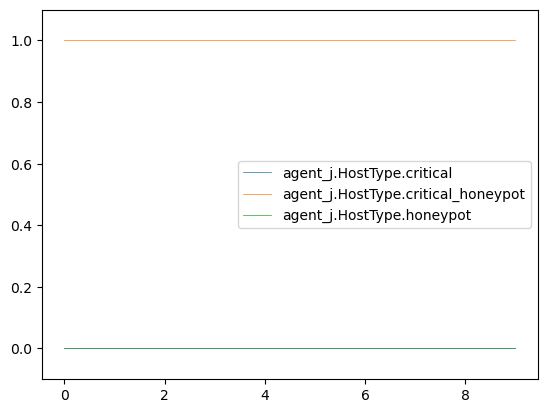

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

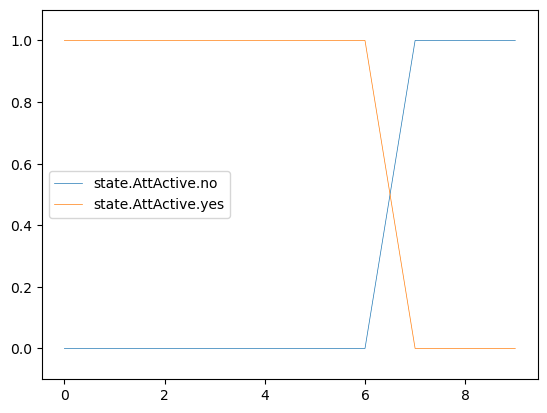

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000022           9.999781e-01            Nop       FileRecon   
4              0.009271           9.907289e-01            Nop       FileRecon   
5              0.019819           9.801816e-01            Nop  ManipulateData   
6              0.668234           3.317657e-01            Nop            Exit   
7              0.988820           1.117992e-02            Nop             Nop   
8              0.999973           2.651160e-05            Nop             Nop   
9              1.000000           4.914379e-08            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                        file_enum

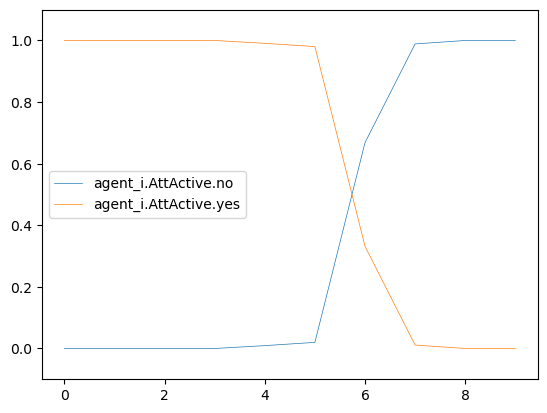

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           success

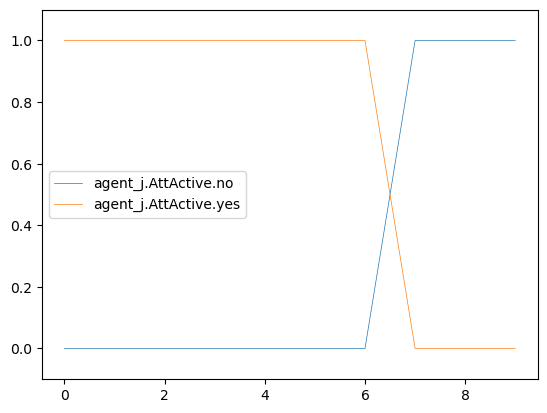

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

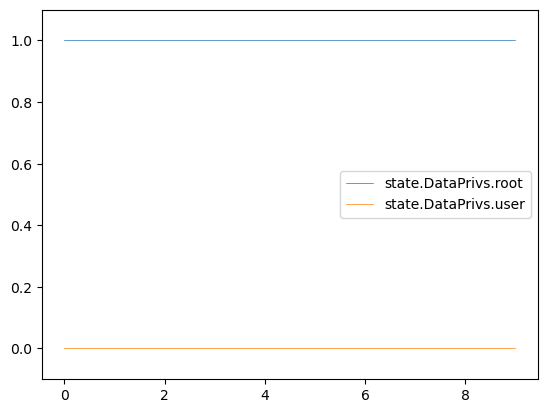

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

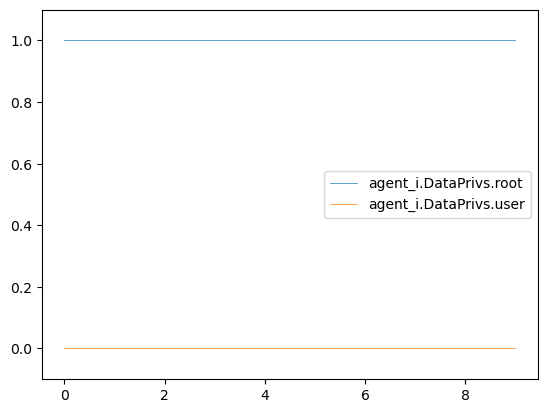

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592109                0.407891    EnumAccounts   
2                0.592113                0.407886      PrivEscAcc   
3                0.592118                0.407882       FileRecon   
4                0.551207                0.448793       FileRecon   
5                0.661655                0.338345  ManipulateData   
6                0.751694                0.248307            Exit   
7                0.751696                0.248304             Nop   
8                0.751698                0.248302             Nop   
9                0.751701                0.248299             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

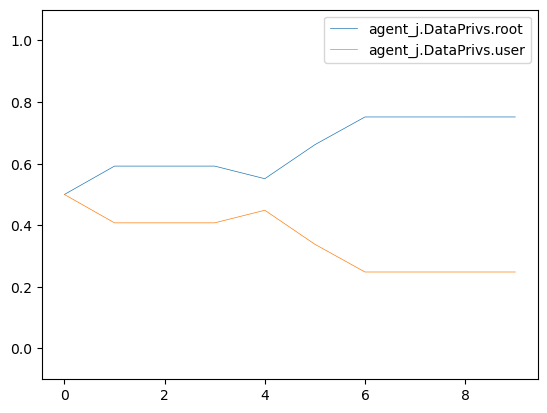

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

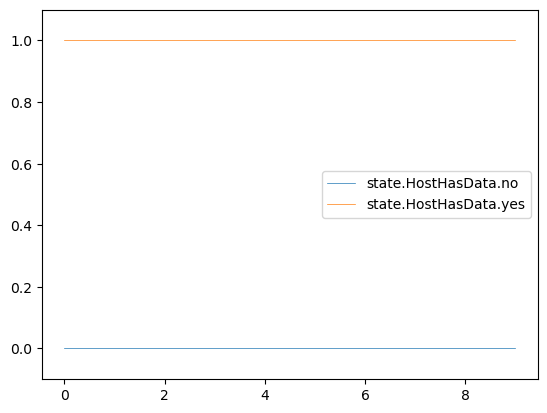

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

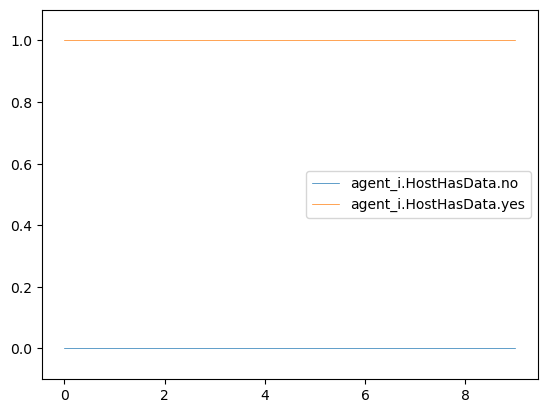

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.800038                 0.199962       FileRecon   
5                0.359620                 0.640380  ManipulateData   
6                0.000581                 0.999419            Exit   
7                0.000581                 0.999419             Nop   
8                0.000581                 0.999419             Nop   
9                0.000581                 0.999419             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

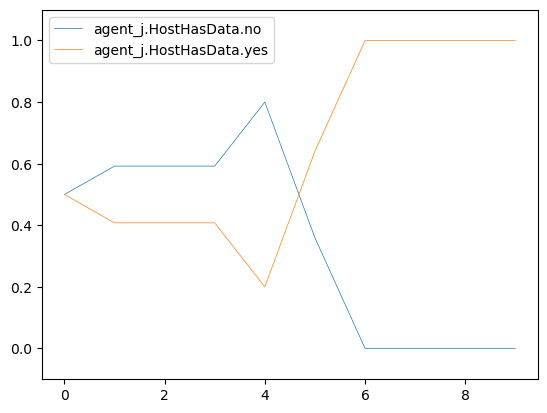

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

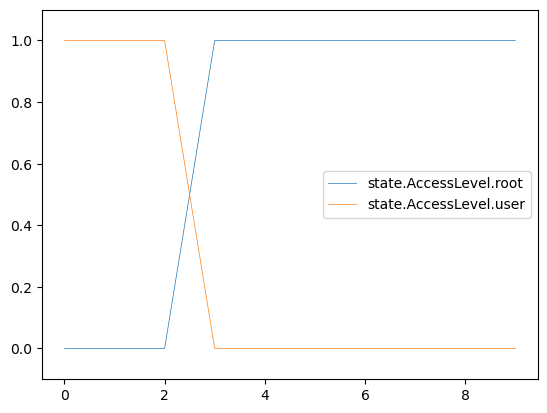

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.869632                  0.130368            Nop   
4                  0.937075                  0.062925            Nop   
5                  0.978153                  0.021847            Nop   
6                  0.934978                  0.065023            Nop   
7                  0.930620                  0.069380            Nop   
8                  0.930609                  0.069391            Nop   
9                  0.930609                  0.069391            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

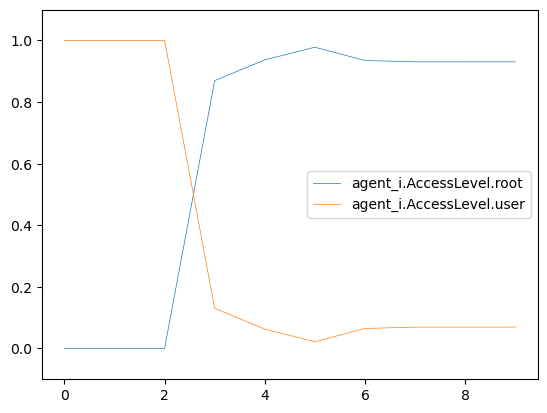

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999794                  0.000207       FileRecon   
4                  0.999742                  0.000258       FileRecon   
5                  0.999856                  0.000144  ManipulateData   
6                  0.999949                  0.000051            Exit   
7                  0.999949                  0.000051             Nop   
8                  0.999949                  0.000051             Nop   
9                  0.999949                  0.000051             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

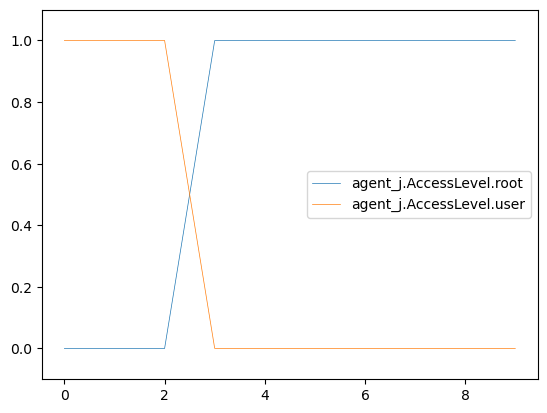

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

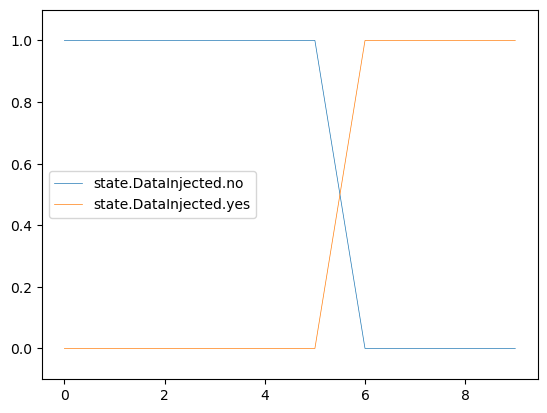

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.798208                  0.201792            Nop   
6                 0.172607                  0.827392            Nop   
7                 0.106616                  0.893384            Nop   
8                 0.106450                  0.893550            Nop   
9                 0.106450                  0.893550            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

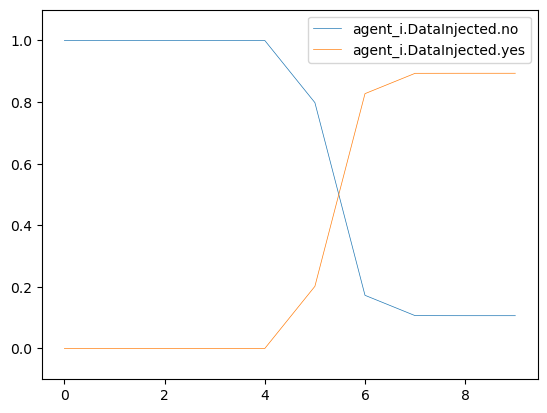

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000615                  0.999385            Exit   
7                 0.000615                  0.999385             Nop   
8                 0.000615                  0.999385             Nop   
9                 0.000615                  0.999385             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

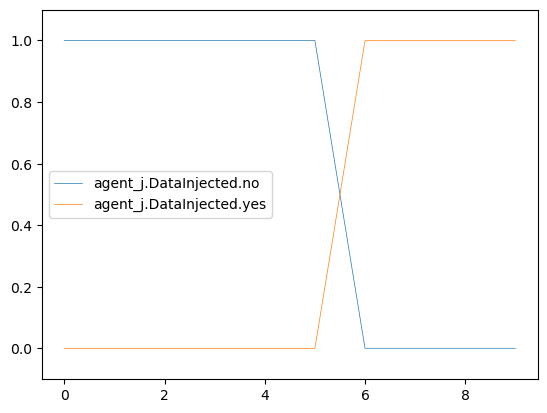

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                   login_activity
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

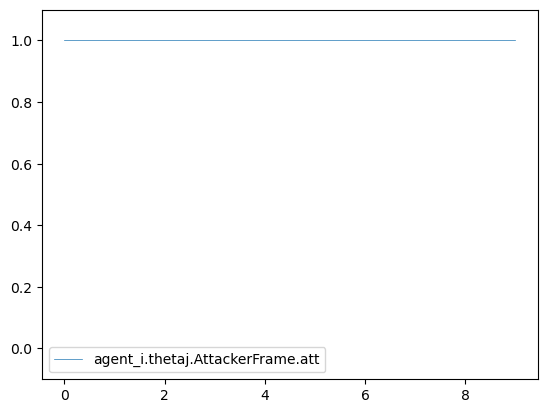

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0            Nop      FileRecon
3                 1.0                  0.0            Nop           Exit
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

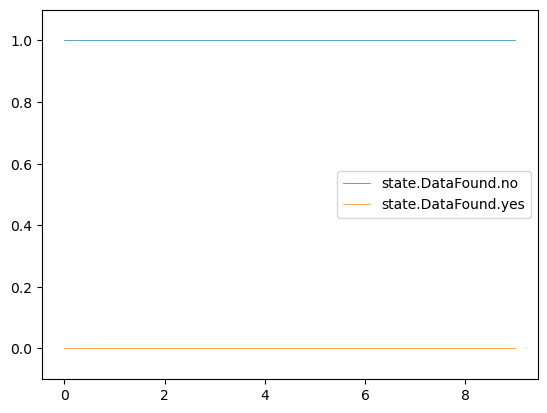

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop      FileRecon   
3              1.000000               0.000000            Nop           Exit   
4              0.591198               0.408802            Nop            Nop   
5              0.168158               0.831842            Nop            Nop   
6              0.126609               0.873391            Nop            Nop   
7              0.121957               0.878043            Nop            Nop   
8              0.122062               0.877938            Nop            Nop   
9              0.122062               0.877938            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

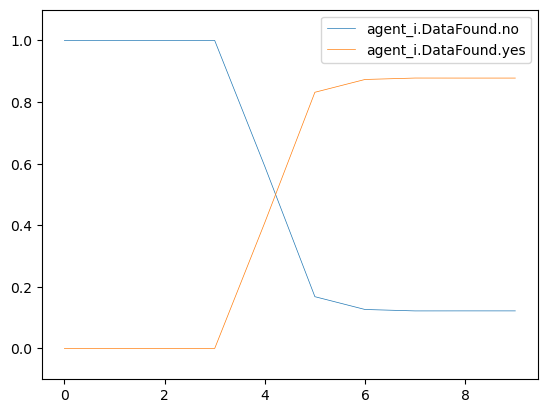

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts   DecoyAccount   
2              0.976974               0.023026      FileRecon            Nop   
3              0.989758               0.010242           Exit            Nop   
4              0.989758               0.010242            Nop            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                         none                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

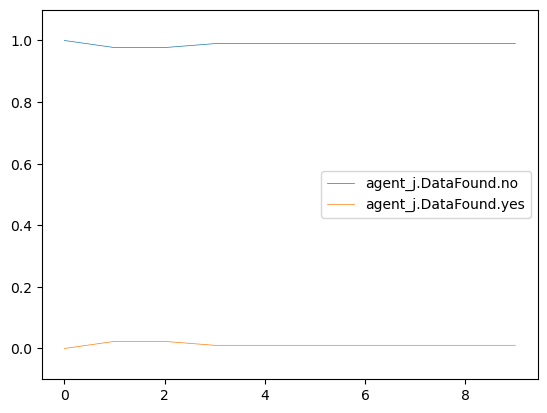

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                1.0                 0.0            Nop      FileRecon
3                1.0                 0.0            Nop           Exit
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

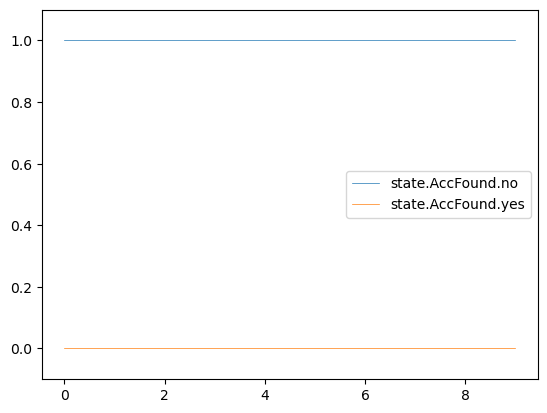

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.310937              0.689063            Nop      FileRecon   
3             0.300077              0.699923            Nop           Exit   
4             0.285255              0.714745            Nop            Nop   
5             0.091324              0.908676            Nop            Nop   
6             0.101361              0.898639            Nop            Nop   
7             0.097453              0.902547            Nop            Nop   
8             0.097592              0.902408            Nop            Nop   
9             0.097592              0.902408            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

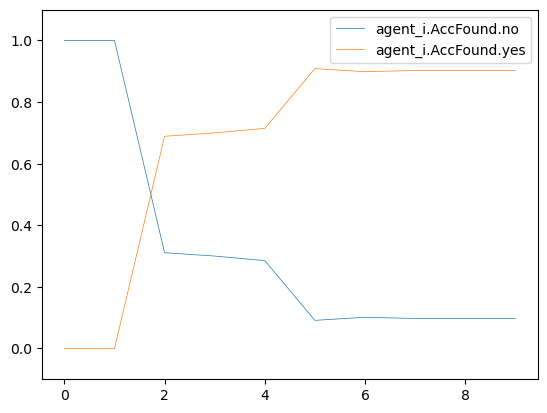

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.943547              0.056453      FileRecon            Nop   
3             0.943547              0.056453           Exit            Nop   
4             0.943547              0.056453            Nop            Nop   
5             0.943547              0.056453            Nop            Nop   
6             0.943547              0.056453            Nop            Nop   
7             0.943547              0.056453            Nop            Nop   
8             0.943547              0.056453            Nop            Nop   
9             0.943547              0.056453            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                         none                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

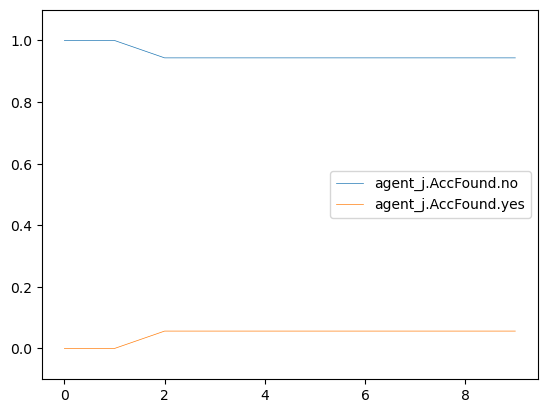

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0            Nop      FileRecon
3                   0.0                    1.0            Nop           Exit
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

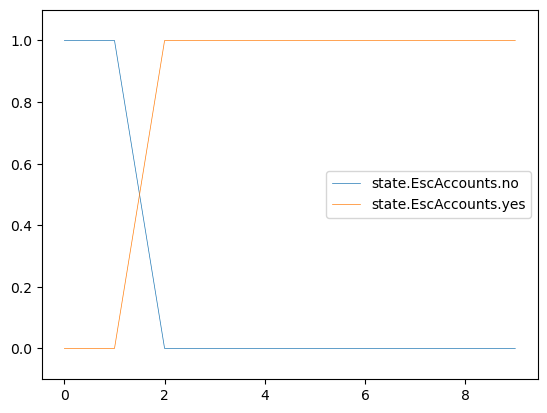

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                             none  
3           Exit                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

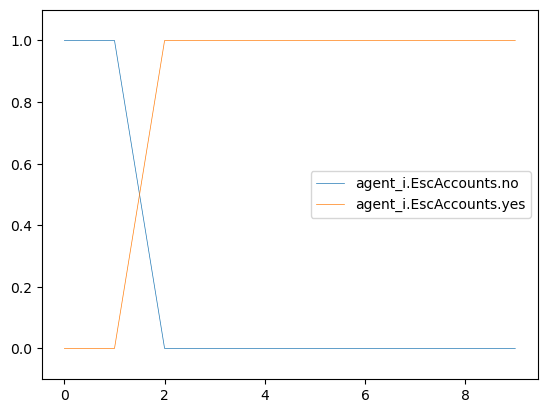

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.499995                 0.500005   EnumAccounts   
2                0.725798                 0.274201      FileRecon   
3                0.725791                 0.274209           Exit   
4                0.725784                 0.274216            Nop   
5                0.725777                 0.274223            Nop   
6                0.725770                 0.274230            Nop   
7                0.725762                 0.274238            Nop   
8                0.725755                 0.274245            Nop   
9                0.725748                 0.274252            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

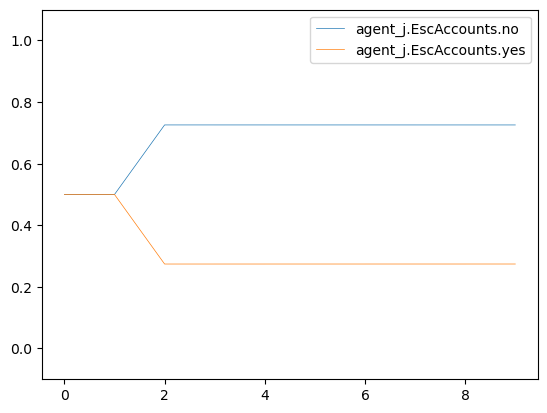

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0            Nop      FileRecon  
3                      1.0            Nop           Exit  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

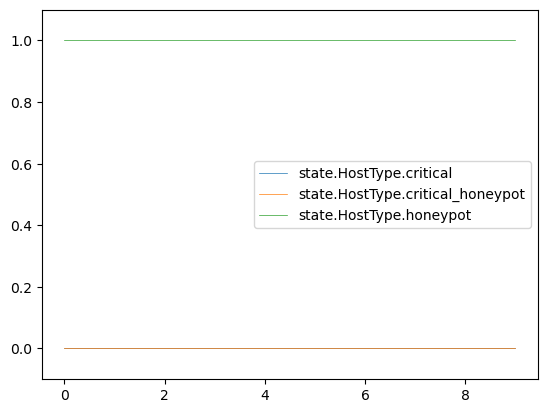

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop      FileRecon   
3                        1.0            Nop           Exit   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

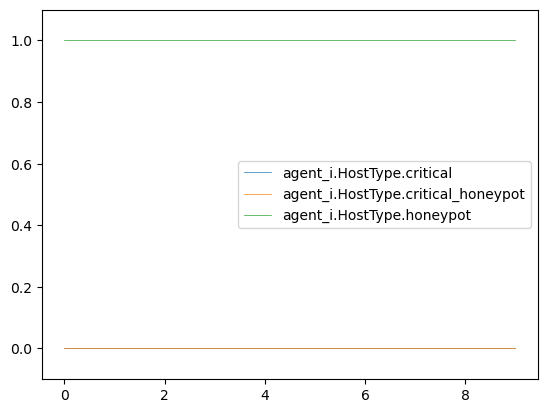

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0      FileRecon            Nop   
3                        0.0           Exit            Nop   
4                        0.0            Nop            Nop   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                         none                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

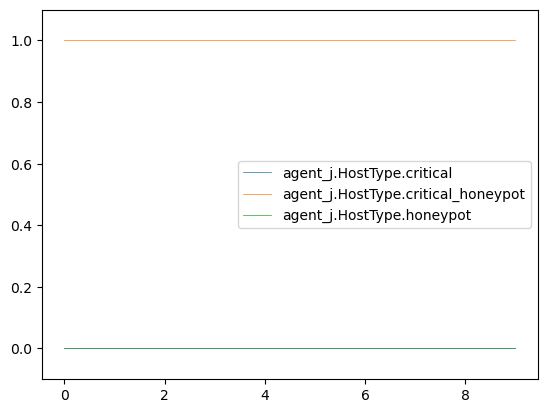

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0            Nop      FileRecon
3                 0.0                  1.0            Nop           Exit
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

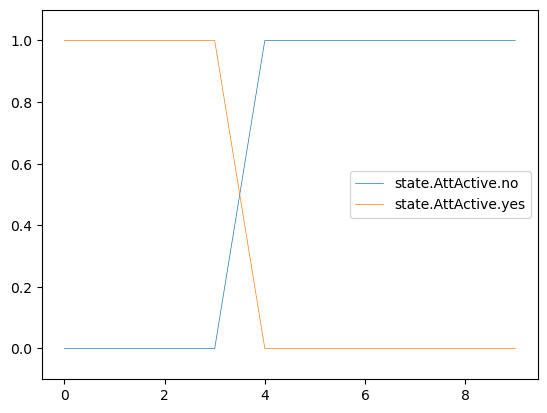

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00   DecoyAccount   EnumAccounts   
2              0.000000           1.000000e+00            Nop      FileRecon   
3              0.000109           9.998906e-01            Nop           Exit   
4              0.283761           7.162387e-01            Nop            Nop   
5              0.103525           8.964753e-01            Nop            Nop   
6              0.981496           1.850351e-02            Nop            Nop   
7              0.952696           4.730383e-02            Nop            Nop   
8              0.999762           2.382154e-04            Nop            Nop   
9              1.000000           4.415740e-07            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

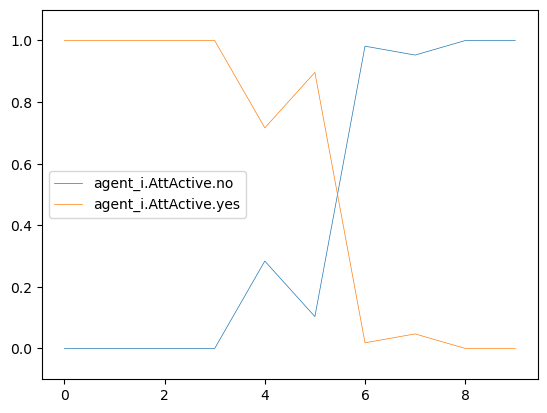

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0      FileRecon            Nop   
3                   0.0                    1.0           Exit            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                         none                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

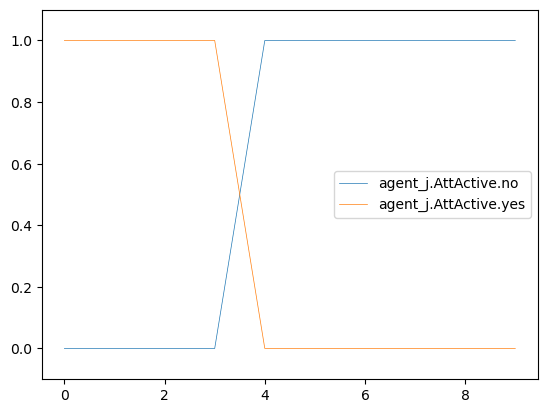

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0            Nop      FileRecon
3                   1.0                   0.0            Nop           Exit
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

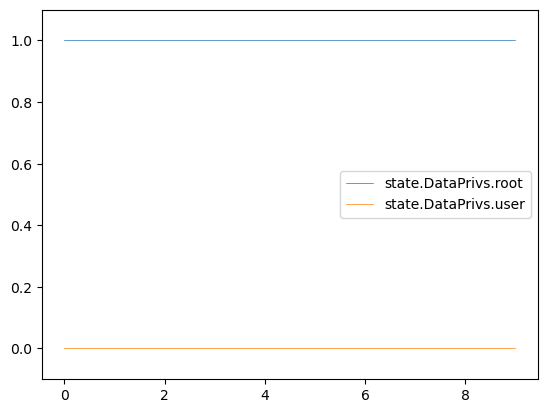

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                             none  
3           Exit                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

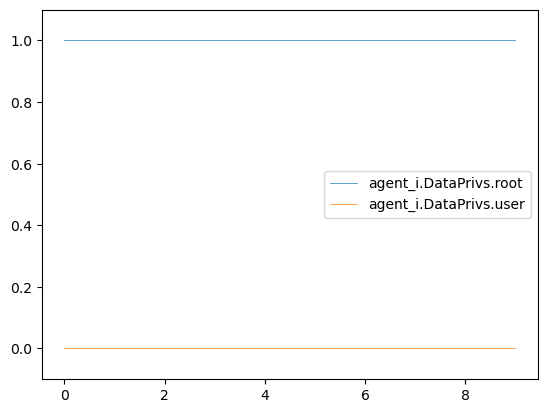

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.592109                0.407891   EnumAccounts   
2                0.592113                0.407886      FileRecon   
3                0.640631                0.359369           Exit   
4                0.640635                0.359365            Nop   
5                0.640638                0.359361            Nop   
6                0.640642                0.359358            Nop   
7                0.640646                0.359354            Nop   
8                0.640649                0.359351            Nop   
9                0.640653                0.359347            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

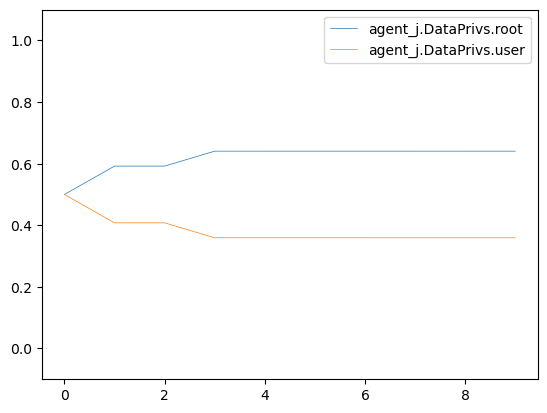

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0            Nop      FileRecon
3                   0.0                    1.0            Nop           Exit
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

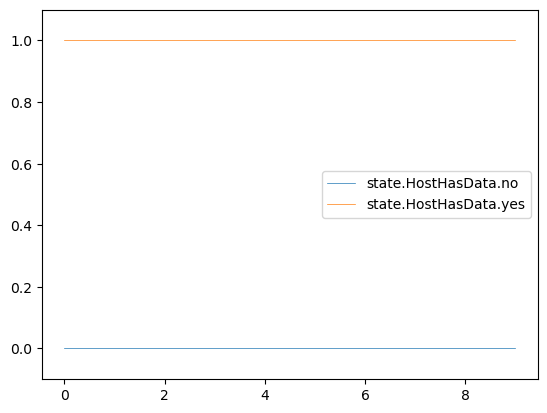

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                             none  
3           Exit                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

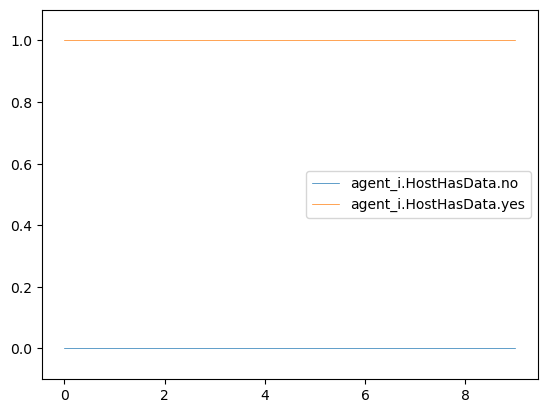

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895      FileRecon   
3                0.640619                 0.359381           Exit   
4                0.640619                 0.359381            Nop   
5                0.640619                 0.359381            Nop   
6                0.640619                 0.359381            Nop   
7                0.640619                 0.359381            Nop   
8                0.640619                 0.359381            Nop   
9                0.640619                 0.359381            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

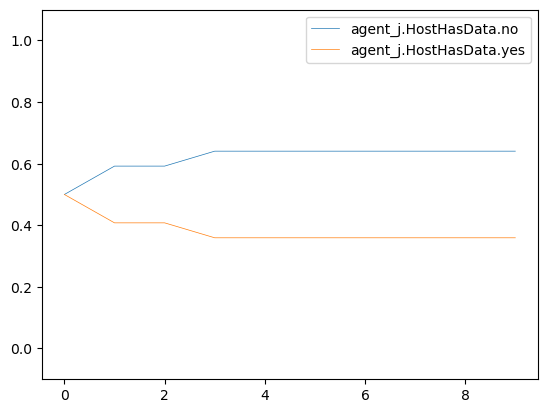

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

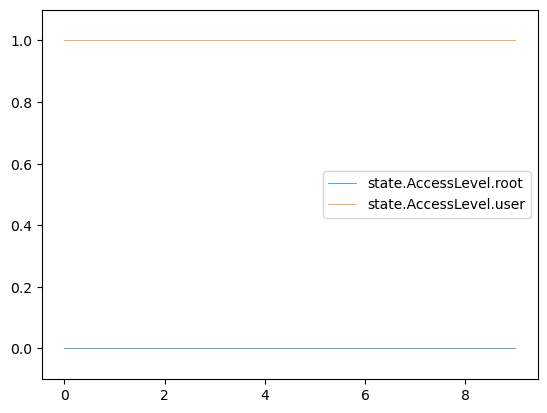

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.620098                  0.379902            Nop   
4                  0.648827                  0.351173            Nop   
5                  0.888709                  0.111291            Nop   
6                  0.876455                  0.123545            Nop   
7                  0.881220                  0.118780            Nop   
8                  0.881050                  0.118950            Nop   
9                  0.881050                  0.118950            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                             none  
3           Exit                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

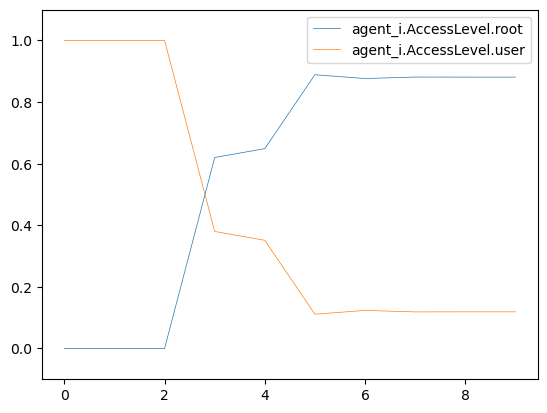

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0      FileRecon   
3                       0.0                       1.0           Exit   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

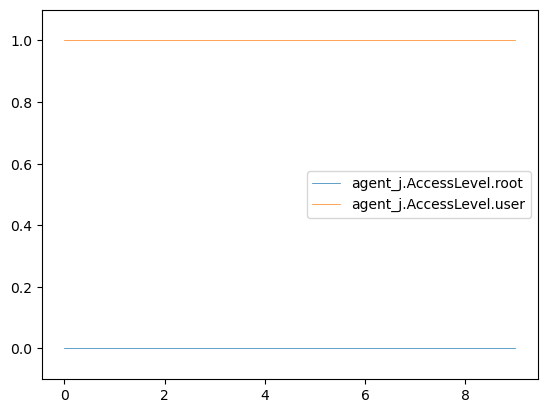

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0            Nop      FileRecon
3                    1.0                     0.0            Nop           Exit
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

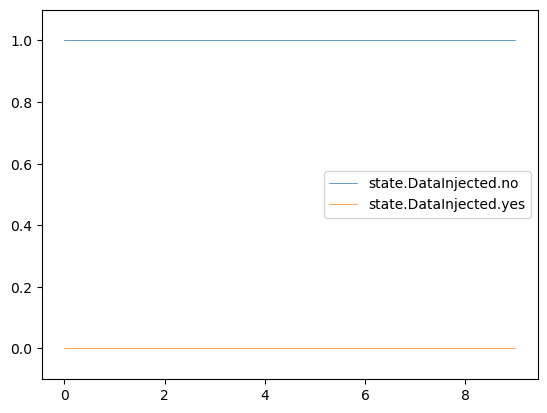

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.227133                  0.772867            Nop   
6                 0.133641                  0.866359            Nop   
7                 0.123919                  0.876081            Nop   
8                 0.122453                  0.877547            Nop   
9                 0.122451                  0.877549            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                             none  
3           Exit                   login_activity  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

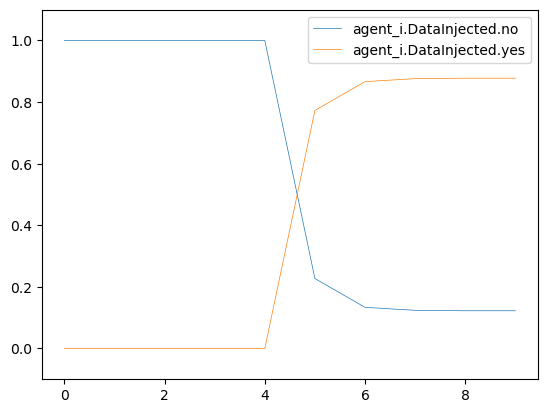

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0      FileRecon   
3                      1.0                       0.0           Exit   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

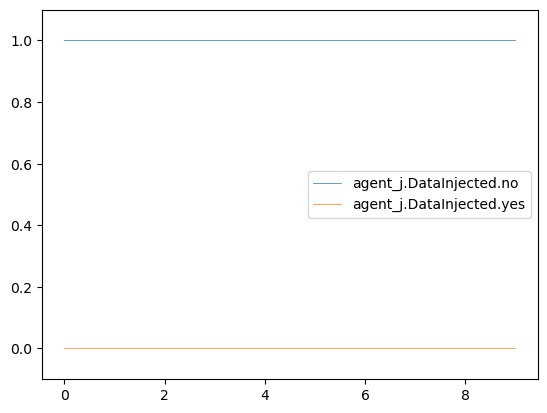

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                             none

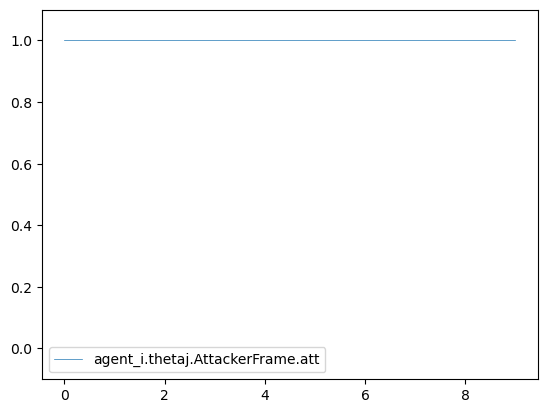

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

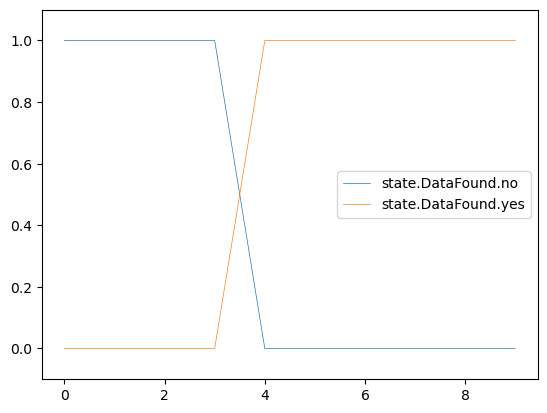

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop  ManipulateData   
5              0.075347               0.924654            Nop            Exit   
6              0.022530               0.977470            Nop             Nop   
7              0.020768               0.979232            Nop             Nop   
8              0.020768               0.979232            Nop             Nop   
9              0.020768               0.979232            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

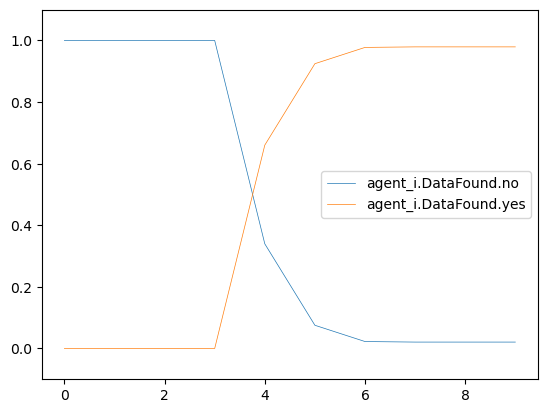

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.211914               0.788086  ManipulateData            Nop   
5              0.000269               0.999731            Exit            Nop   
6              0.000269               0.999731             Nop            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           success  
9                         none                           failure

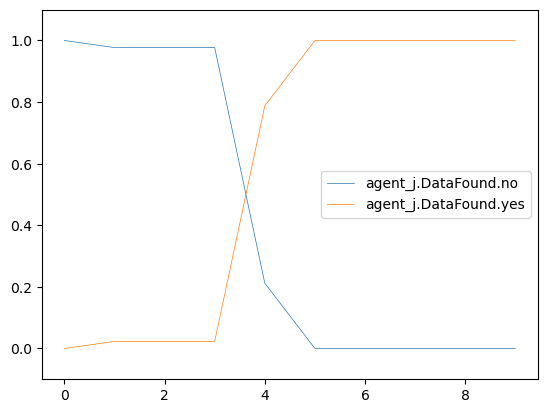

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

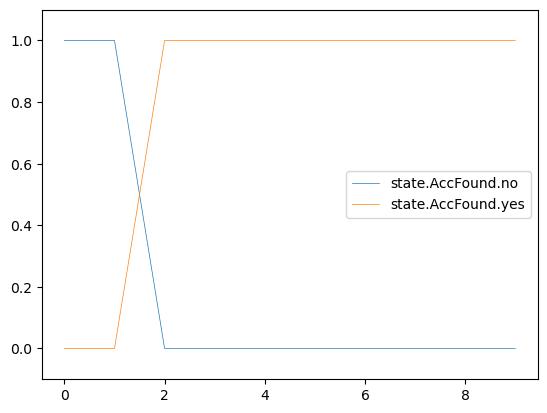

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop  ManipulateData   
5             0.017132              0.982868            Nop            Exit   
6             0.018896              0.981104            Nop             Nop   
7             0.019040              0.980960            Nop             Nop   
8             0.019040              0.980960            Nop             Nop   
9             0.019040              0.980960            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

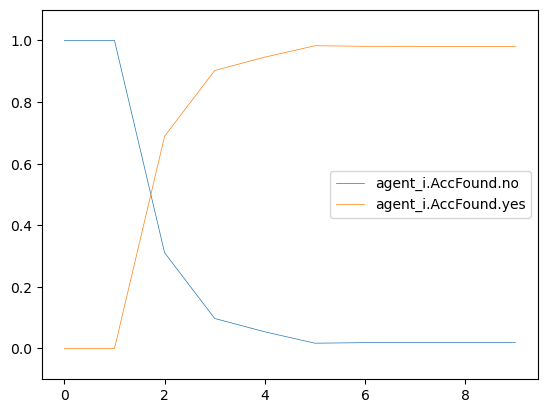

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.171048              0.828952      PrivEscAcc            Nop   
3             0.000207              0.999794       FileRecon            Nop   
4             0.000104              0.999896  ManipulateData            Nop   
5             0.000060              0.999940            Exit            Nop   
6             0.000060              0.999940             Nop            Nop   
7             0.000060              0.999940             Nop            Nop   
8             0.000060              0.999940             Nop            Nop   
9             0.000060              0.999940             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           success  
9                         none                           failure

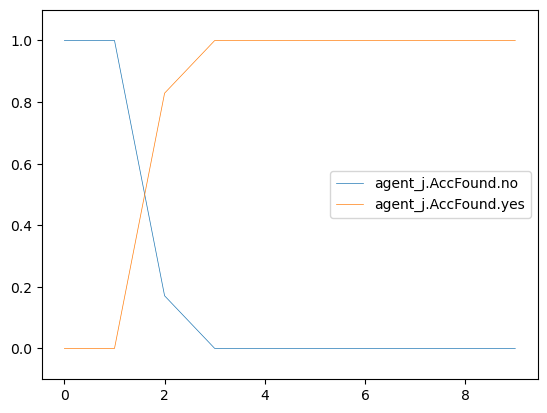

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

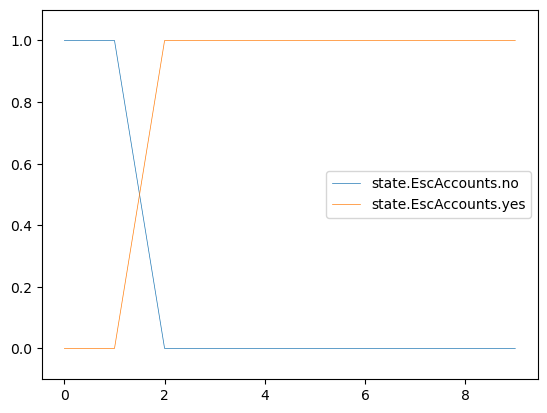

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

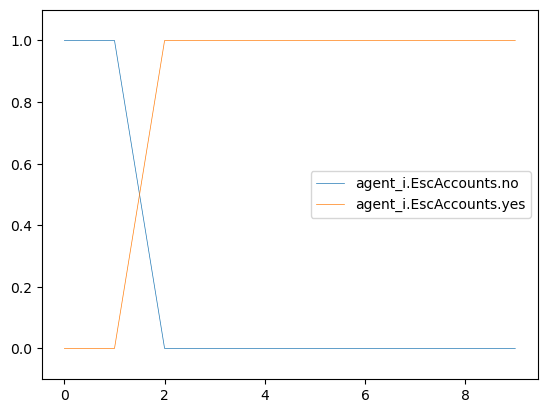

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005    EnumAccounts   
2                0.131574                 0.868426      PrivEscAcc   
3                0.000159                 0.999841       FileRecon   
4                0.000080                 0.999920  ManipulateData   
5                0.000046                 0.999954            Exit   
6                0.000046                 0.999954             Nop   
7                0.000046                 0.999954             Nop   
8                0.000046                 0.999954             Nop   
9                0.000046                 0.999954             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

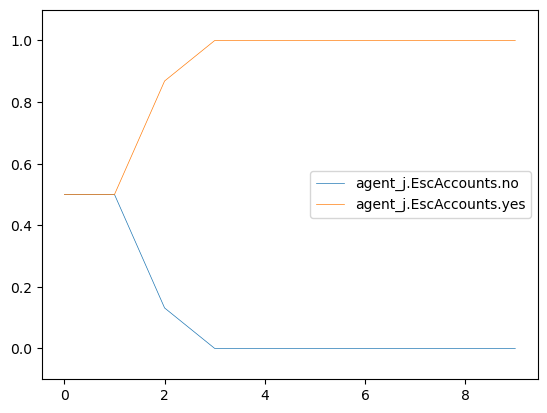

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

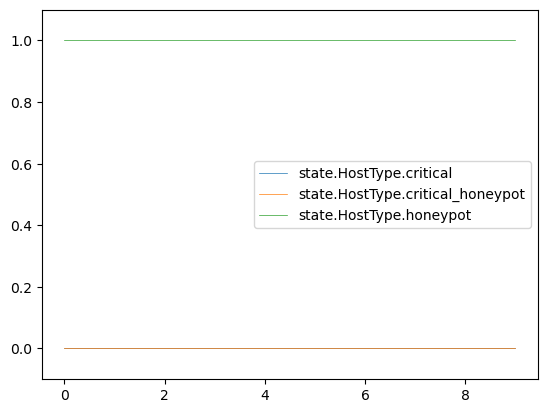

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

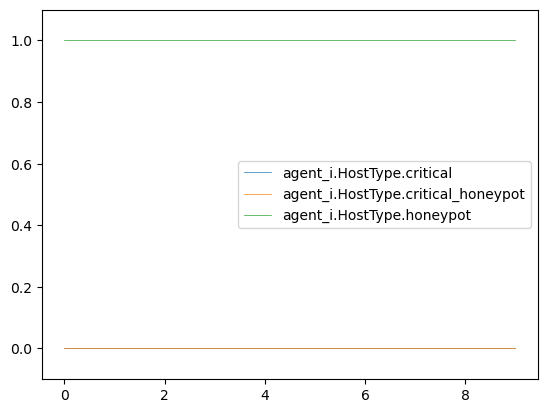

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           success  
9                         none                           failure

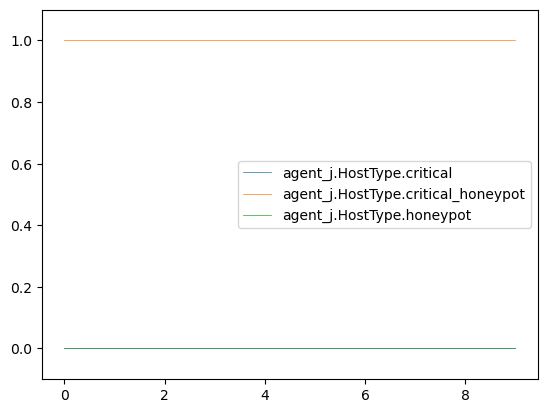

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

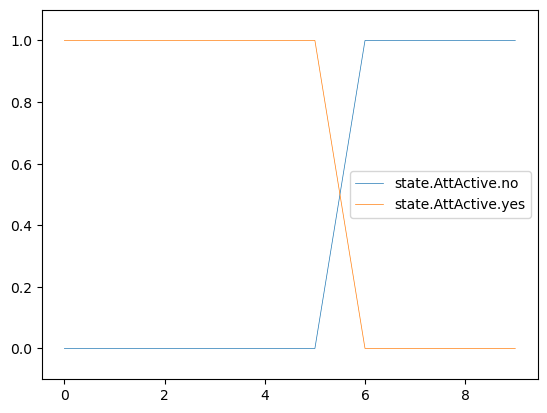

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999967e-01            Nop       FileRecon   
4              0.009350           9.906496e-01            Nop  ManipulateData   
5              0.010945           9.890546e-01            Nop            Exit   
6              0.982698           1.730196e-02            Nop             Nop   
7              0.998717           1.283457e-03            Nop             Nop   
8              0.999771           2.292867e-04            Nop             Nop   
9              1.000000           1.058911e-08            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

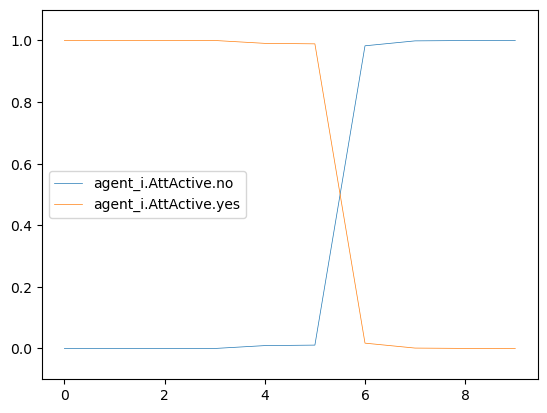

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           success  
9                         none                           failure

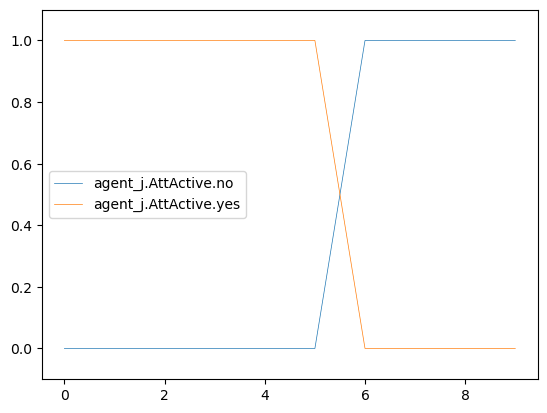

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

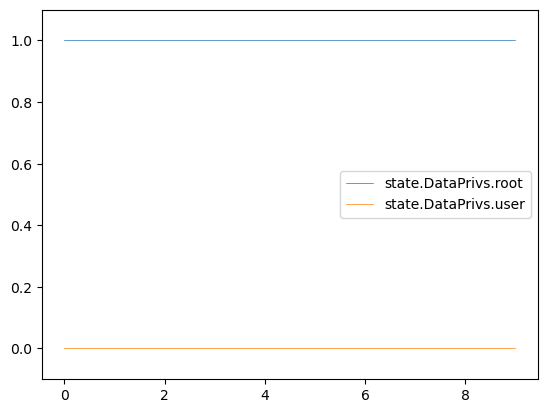

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

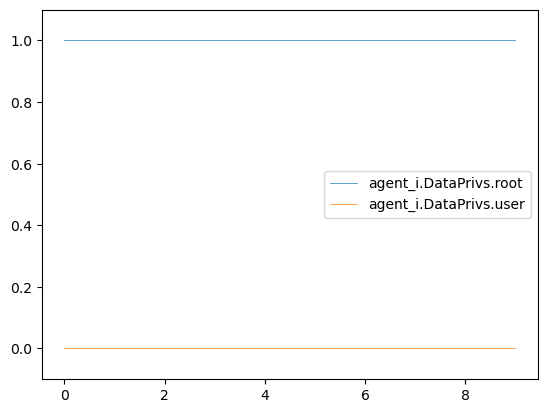

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592109                0.407891    EnumAccounts   
2                0.592113                0.407886      PrivEscAcc   
3                0.592118                0.407882       FileRecon   
4                0.673738                0.326262  ManipulateData   
5                0.708589                0.291411            Exit   
6                0.708592                0.291408             Nop   
7                0.708595                0.291405             Nop   
8                0.708598                0.291402             Nop   
9                0.708601                0.291399             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

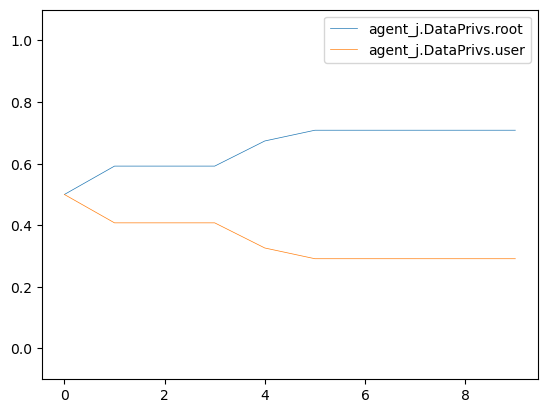

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

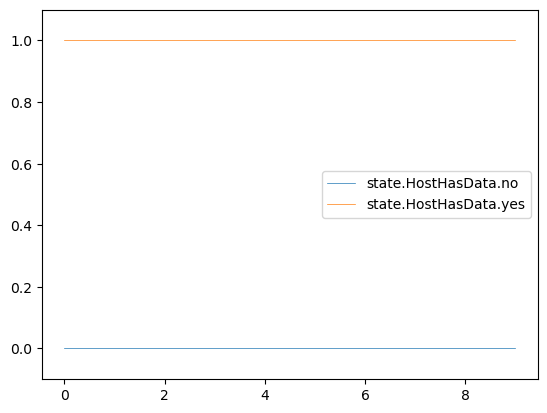

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

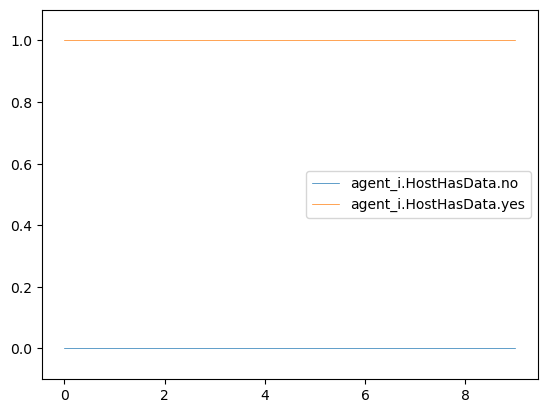

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.177323                 0.822677  ManipulateData   
5                0.000225                 0.999775            Exit   
6                0.000225                 0.999775             Nop   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

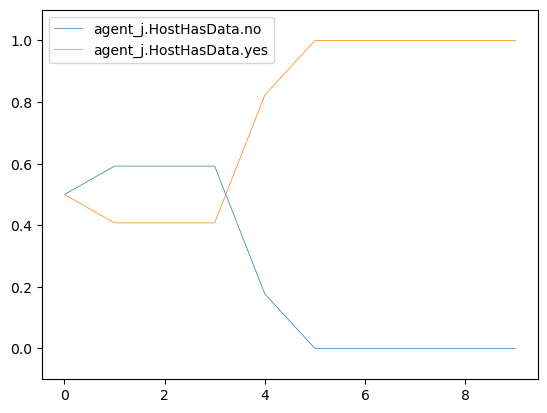

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

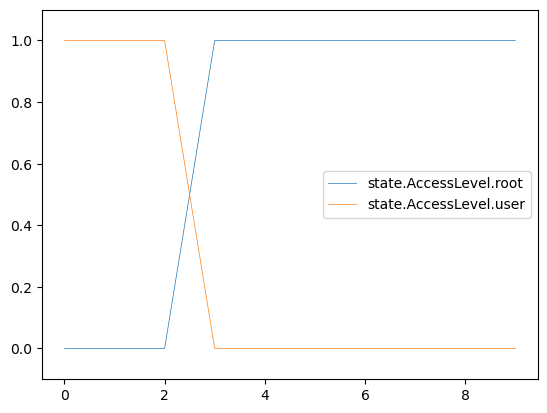

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.982340                  0.017660            Nop   
6                  0.980521                  0.019479            Nop   
7                  0.980372                  0.019628            Nop   
8                  0.980372                  0.019628            Nop   
9                  0.980372                  0.019628            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

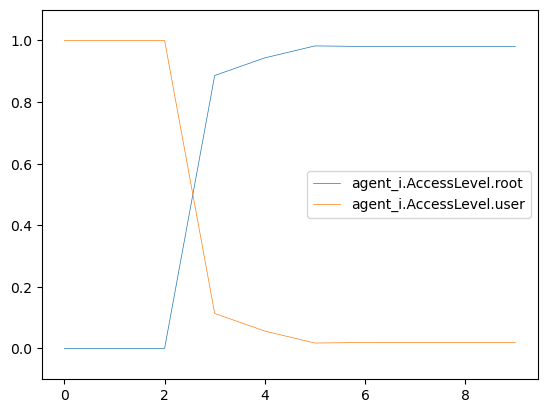

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999794                  0.000207       FileRecon   
4                  0.999896                  0.000104  ManipulateData   
5                  0.999940                  0.000060            Exit   
6                  0.999940                  0.000060             Nop   
7                  0.999940                  0.000060             Nop   
8                  0.999940                  0.000060             Nop   
9                  0.999940                  0.000060             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

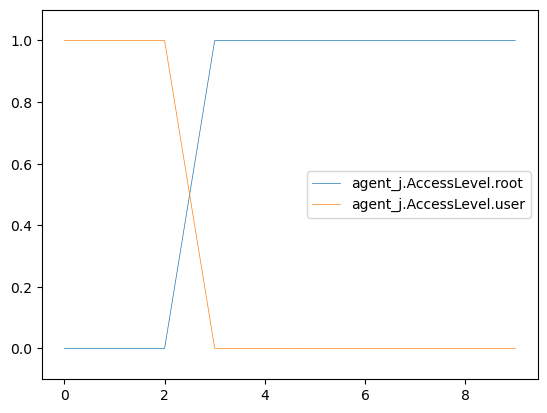

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

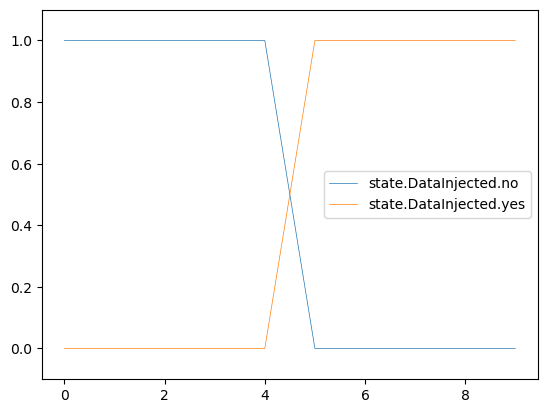

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.126646                  0.873354            Nop   
6                 0.029529                  0.970471            Nop   
7                 0.021270                  0.978730            Nop   
8                 0.021050                  0.978950            Nop   
9                 0.021050                  0.978950            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                             none

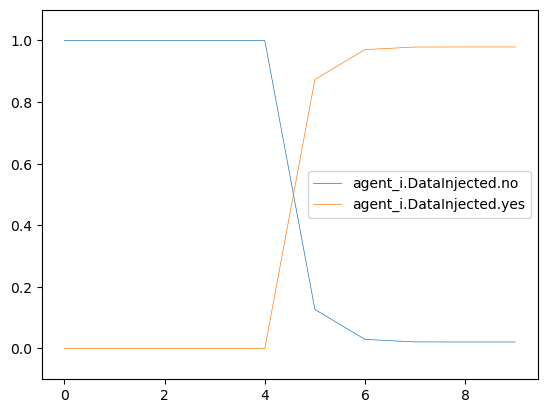

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000269                  0.999731            Exit   
6                 0.000269                  0.999731             Nop   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

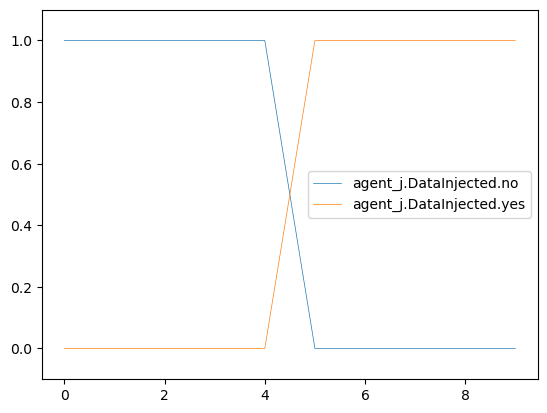

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

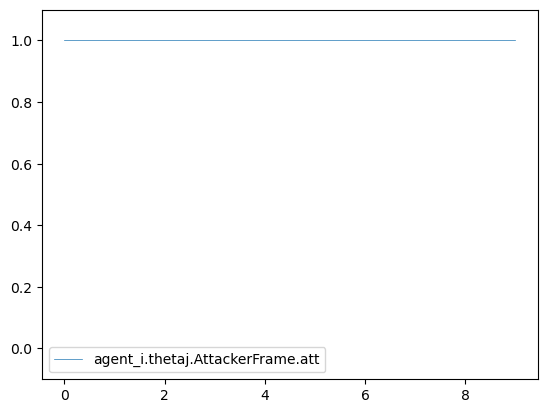

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

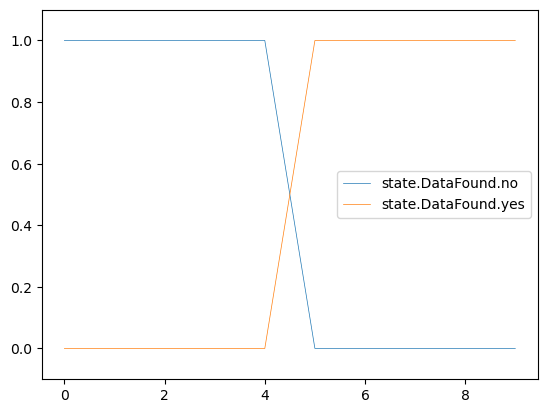

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop       FileRecon   
5              0.212100               0.787900            Nop       FileRecon   
6              0.168598               0.831401            Nop  ManipulateData   
7              0.064700               0.935299            Nop            Exit   
8              0.064748               0.935252            Nop             Nop   
9              0.064748               0.935252            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                        file_enum  
9                             none

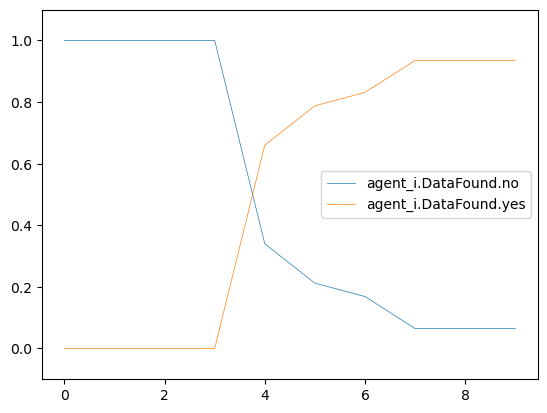

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.956103               0.043897       FileRecon            Nop   
5              0.980312               0.019689       FileRecon            Nop   
6              0.645108               0.354892  ManipulateData            Nop   
7              0.001816               0.998184            Exit            Nop   
8              0.001816               0.998184             Nop            Nop   
9              0.001816               0.998184             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                   user_files                           success

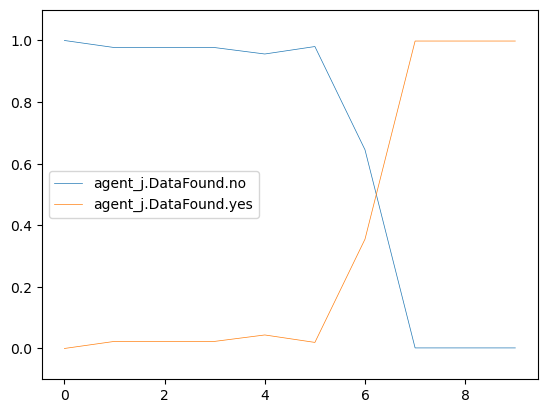

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop       FileRecon
6                0.0                 1.0            Nop  ManipulateData
7                0.0                 1.0            Nop            Exit
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

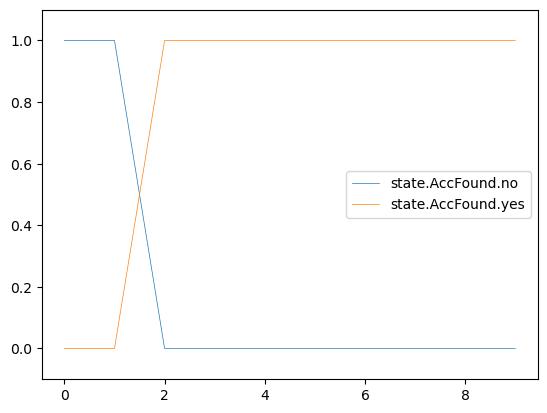

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop       FileRecon   
5             0.018611              0.981389            Nop       FileRecon   
6             0.007982              0.992018            Nop  ManipulateData   
7             0.002066              0.997934            Nop            Exit   
8             0.002069              0.997931            Nop             Nop   
9             0.002069              0.997931            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                        file_enum  
9                             none

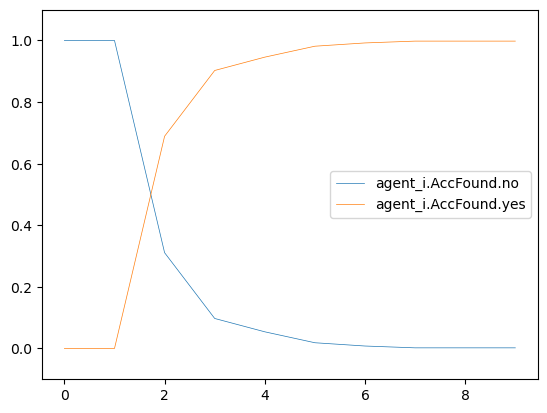

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.171048              0.828952      PrivEscAcc            Nop   
3             0.000207              0.999794       FileRecon            Nop   
4             0.000258              0.999742       FileRecon            Nop   
5             0.000290              0.999710       FileRecon            Nop   
6             0.000214              0.999786  ManipulateData            Nop   
7             0.000049              0.999951            Exit            Nop   
8             0.000049              0.999950             Nop            Nop   
9             0.000049              0.999951             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                   user_files                           success

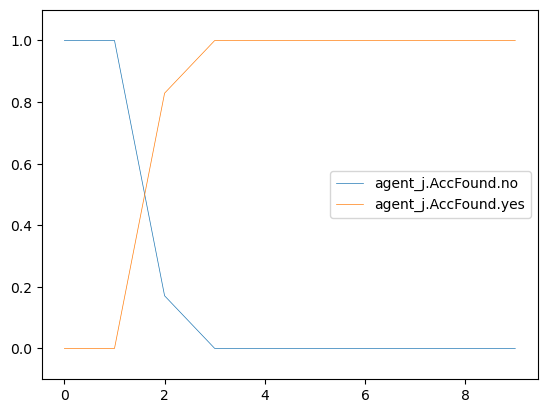

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

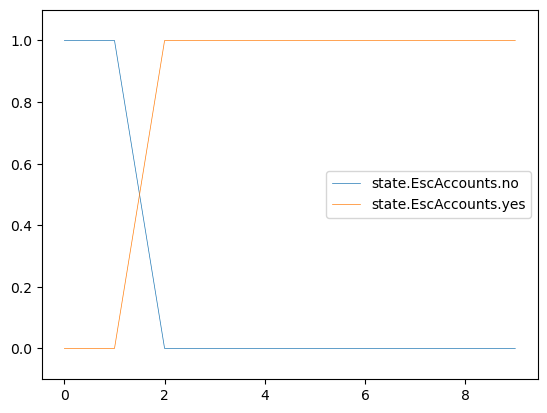

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

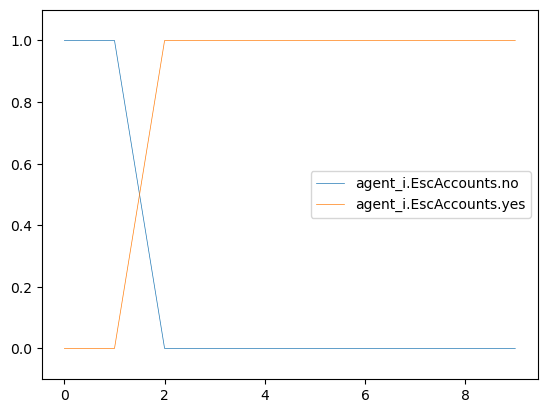

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005    EnumAccounts   
2                0.131574                 0.868426      PrivEscAcc   
3                0.000159                 0.999841       FileRecon   
4                0.000198                 0.999802       FileRecon   
5                0.000223                 0.999777       FileRecon   
6                0.000165                 0.999835  ManipulateData   
7                0.000038                 0.999962            Exit   
8                0.000038                 0.999962             Nop   
9                0.000038                 0.999962             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

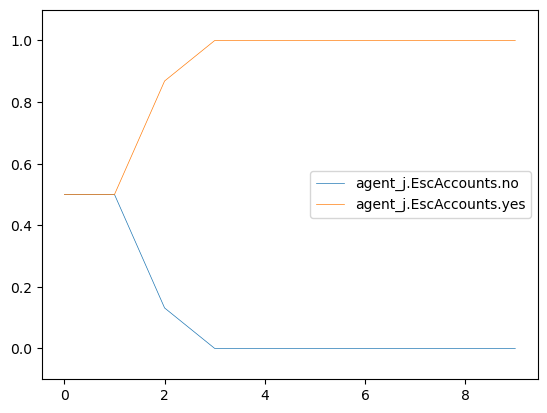

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop       FileRecon  
6                      1.0            Nop  ManipulateData  
7                      1.0            Nop            Exit  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

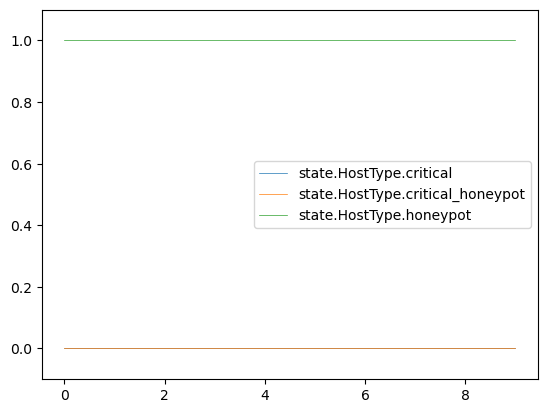

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                        file_enum  
9                             none

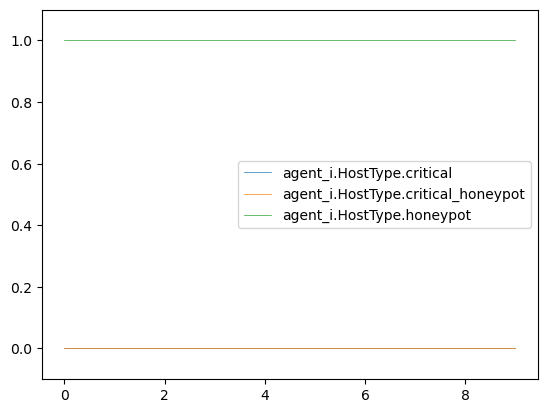

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0       FileRecon            Nop   
6                        0.0  ManipulateData            Nop   
7                        0.0            Exit            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                   user_files                           success

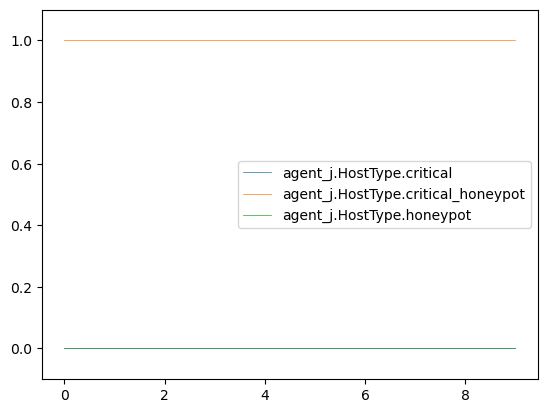

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

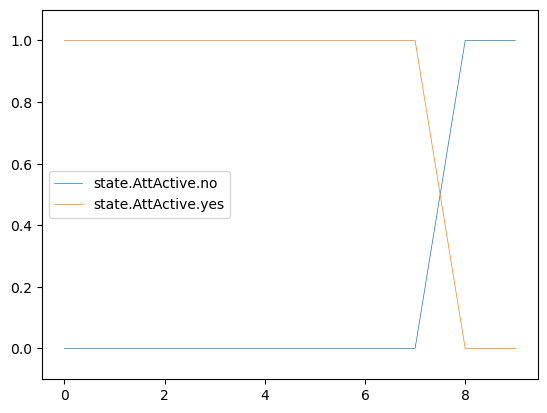

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999967e-01            Nop       FileRecon   
4              0.009350           9.906496e-01            Nop       FileRecon   
5              0.017826           9.821738e-01            Nop       FileRecon   
6              0.092754           9.072463e-01            Nop  ManipulateData   
7              0.126989           8.730111e-01            Nop            Exit   
8              0.999745           2.547377e-04            Nop             Nop   
9              1.000000           8.053888e-08            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                        file_enum  
9                             none

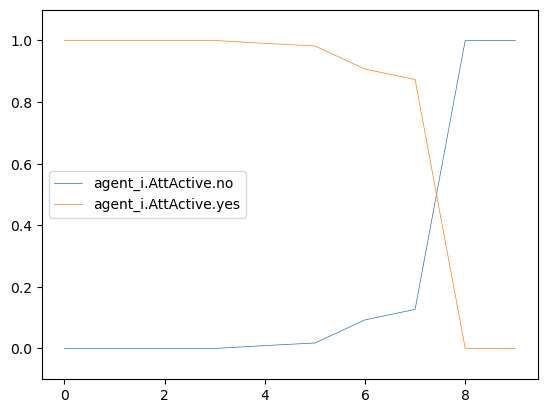

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                   user_files                           success

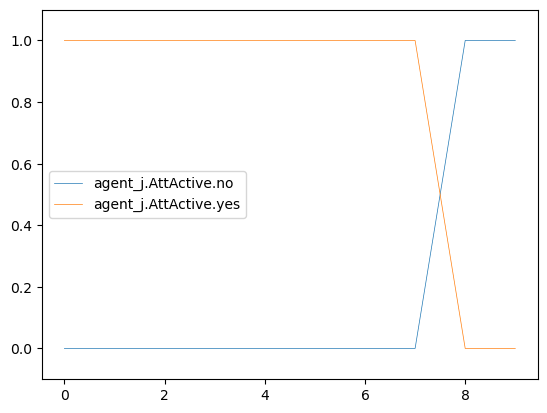

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop       FileRecon
6                   1.0                   0.0            Nop  ManipulateData
7                   1.0                   0.0            Nop            Exit
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

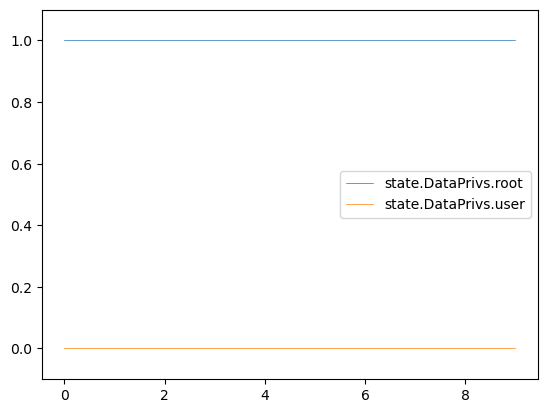

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

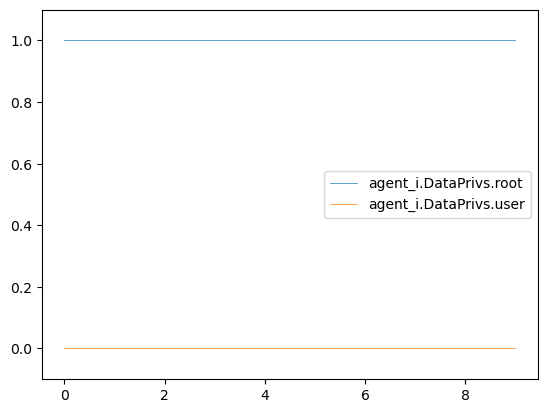

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592109                0.407891    EnumAccounts   
2                0.592113                0.407886      PrivEscAcc   
3                0.592118                0.407882       FileRecon   
4                0.551207                0.448793       FileRecon   
5                0.519611                0.480389       FileRecon   
6                0.596479                0.403521  ManipulateData   
7                0.762804                0.237196            Exit   
8                0.762807                0.237193             Nop   
9                0.762809                0.237191             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

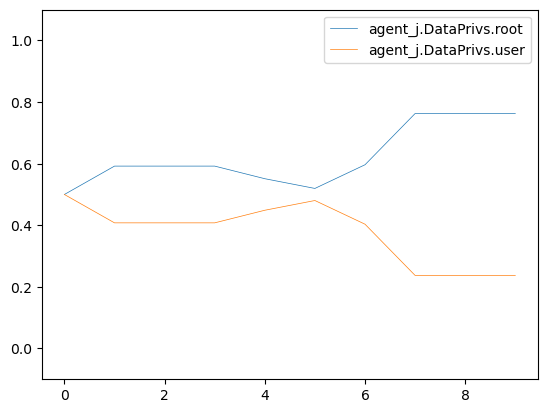

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

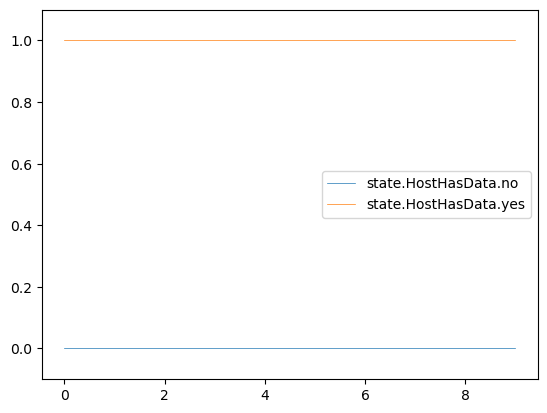

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

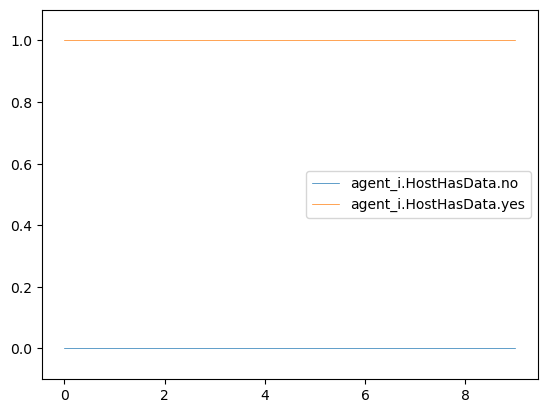

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.800038                 0.199962       FileRecon   
5                0.926051                 0.073950       FileRecon   
6                0.633919                 0.366081  ManipulateData   
7                0.001785                 0.998215            Exit   
8                0.001785                 0.998215             Nop   
9                0.001785                 0.998215             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

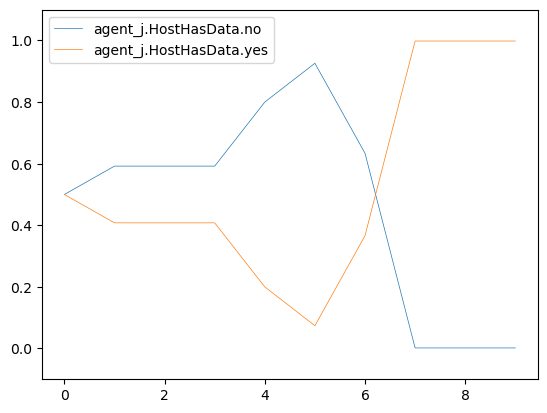

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

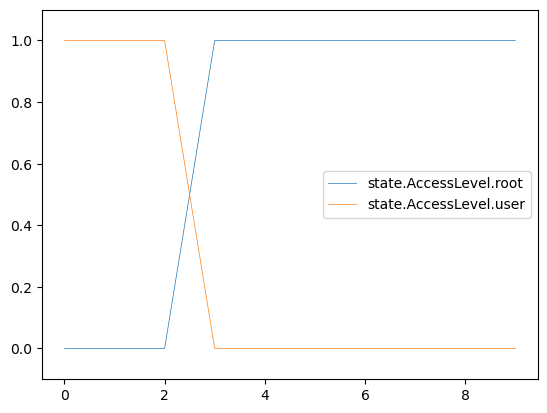

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.980577                  0.019423            Nop   
6                  0.991679                  0.008321            Nop   
7                  0.997848                  0.002152            Nop   
8                  0.997845                  0.002155            Nop   
9                  0.997845                  0.002155            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

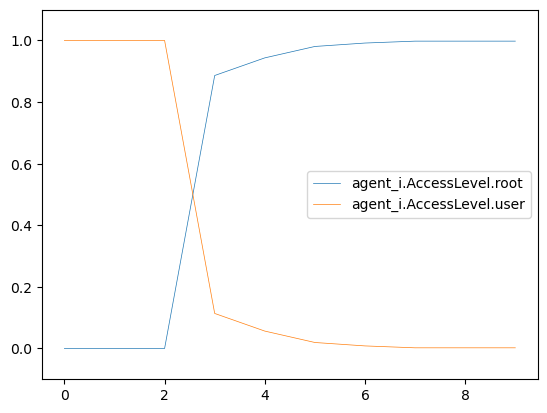

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999794                  0.000207       FileRecon   
4                  0.999742                  0.000258       FileRecon   
5                  0.999710                  0.000290       FileRecon   
6                  0.999786                  0.000214  ManipulateData   
7                  0.999951                  0.000049            Exit   
8                  0.999950                  0.000049             Nop   
9                  0.999951                  0.000049             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

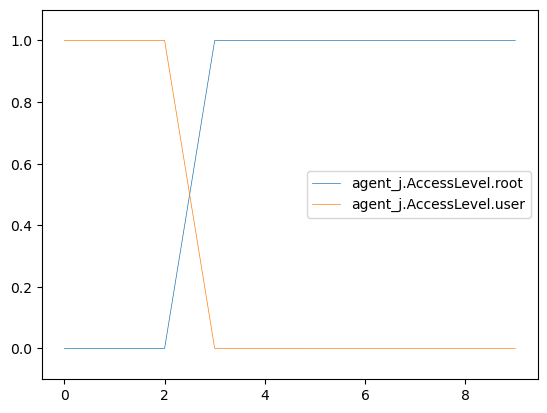

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

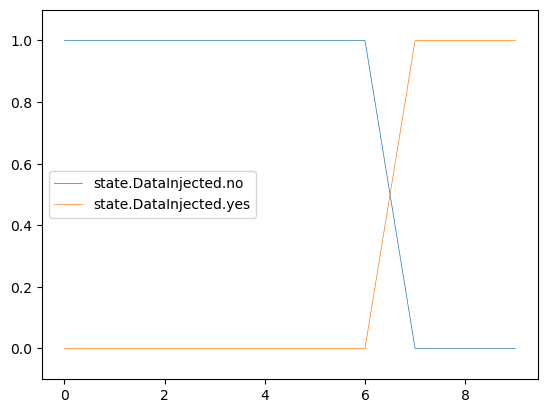

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.796803                  0.203197            Nop   
6                 0.695347                  0.304653            Nop   
7                 0.079456                  0.920544            Nop   
8                 0.077816                  0.922184            Nop   
9                 0.077816                  0.922184            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                        file_enum  
9             Nop                             none

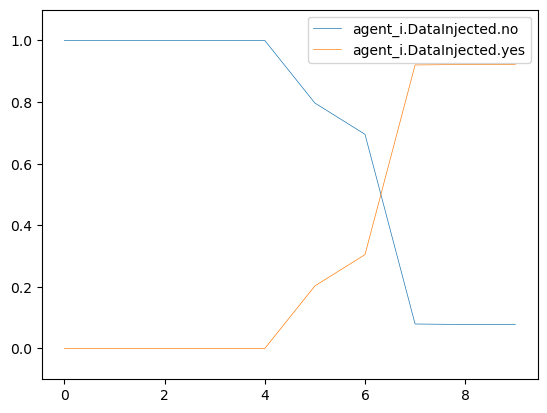

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.001816                  0.998184            Exit   
8                 0.001816                  0.998184             Nop   
9                 0.001816                  0.998184             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

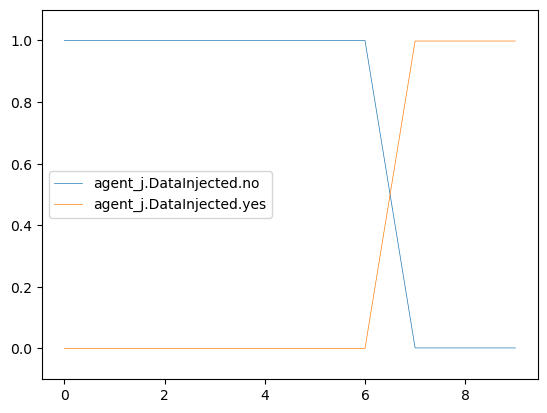

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

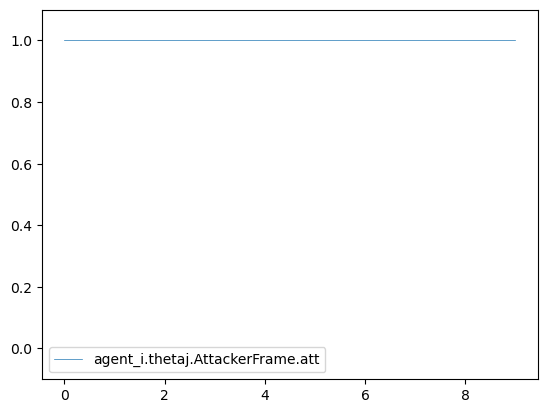

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount  ManipulateData
2                 1.0                  0.0            Nop    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

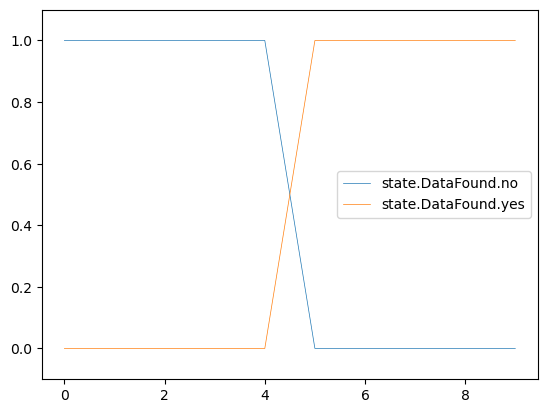

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount  ManipulateData   
2              1.000000               0.000000            Nop    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              0.955490               0.044510            Nop       FileRecon   
5              0.440024               0.559976            Nop       FileRecon   
6              0.259642               0.740358            Nop  ManipulateData   
7              0.062779               0.937221            Nop            Exit   
8              0.063282               0.936718            Nop             Nop   
9              0.063284               0.936716            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                             none

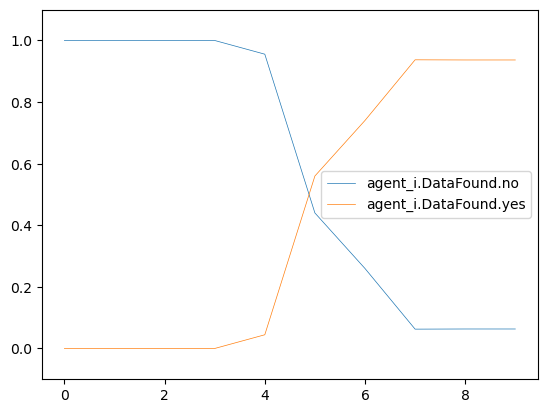

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.343750               0.656250  ManipulateData   DecoyAccount   
2              0.998074               0.001926    EnumAccounts            Nop   
3              0.998074               0.001926      PrivEscAcc            Nop   
4              0.998074               0.001926       FileRecon            Nop   
5              0.959147               0.040853       FileRecon            Nop   
6              0.385643               0.614357  ManipulateData            Nop   
7              0.000628               0.999372            Exit            Nop   
8              0.000628               0.999372             Nop            Nop   
9              0.000628               0.999372             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

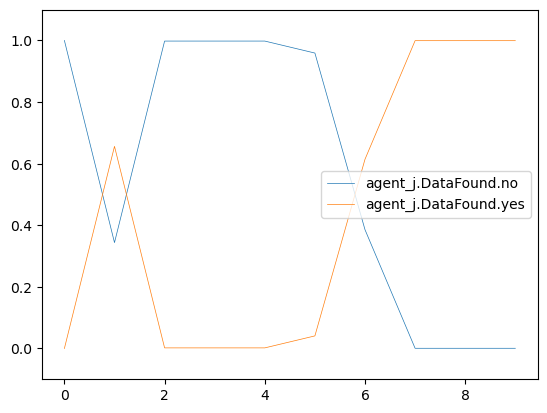

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount  ManipulateData
2                1.0                 0.0            Nop    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop       FileRecon
6                0.0                 1.0            Nop  ManipulateData
7                0.0                 1.0            Nop            Exit
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

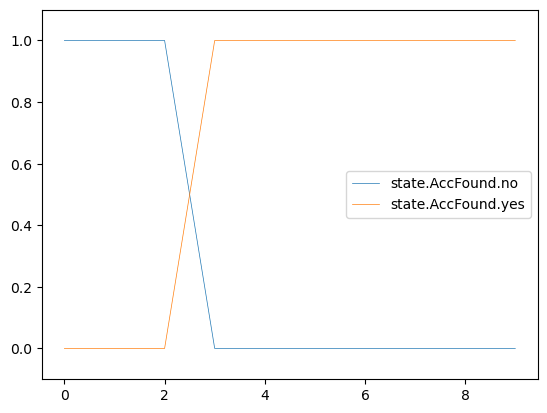

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount  ManipulateData   
2             0.606250              0.393750            Nop    EnumAccounts   
3             0.418935              0.581065            Nop      PrivEscAcc   
4             0.473010              0.526990            Nop       FileRecon   
5             0.173101              0.826899            Nop       FileRecon   
6             0.067256              0.932744            Nop  ManipulateData   
7             0.016658              0.983342            Nop            Exit   
8             0.017208              0.982792            Nop             Nop   
9             0.017209              0.982791            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                             none

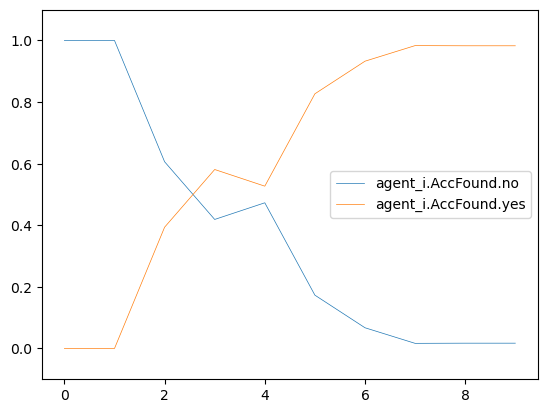

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000  ManipulateData   DecoyAccount   
2             1.000000              0.000000    EnumAccounts            Nop   
3             0.171046              0.828954      PrivEscAcc            Nop   
4             0.000207              0.999794       FileRecon            Nop   
5             0.000258              0.999742       FileRecon            Nop   
6             0.000143              0.999857  ManipulateData            Nop   
7             0.000048              0.999952            Exit            Nop   
8             0.000048              0.999952             Nop            Nop   
9             0.000048              0.999952             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

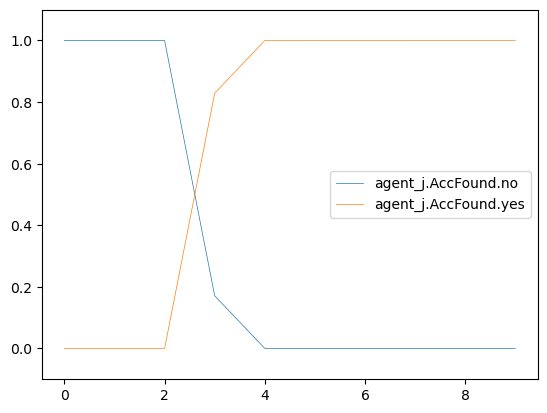

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

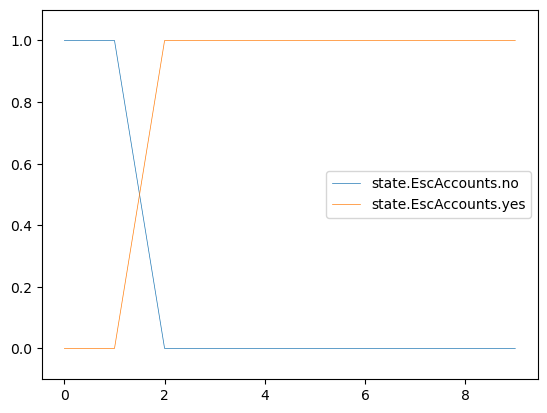

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

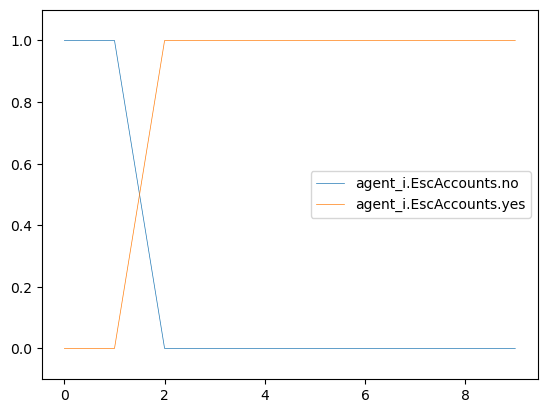

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005  ManipulateData   
2                0.499990                 0.500010    EnumAccounts   
3                0.131572                 0.868428      PrivEscAcc   
4                0.000159                 0.999841       FileRecon   
5                0.000199                 0.999802       FileRecon   
6                0.000110                 0.999890  ManipulateData   
7                0.000037                 0.999963            Exit   
8                0.000037                 0.999963             Nop   
9                0.000037                 0.999963             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

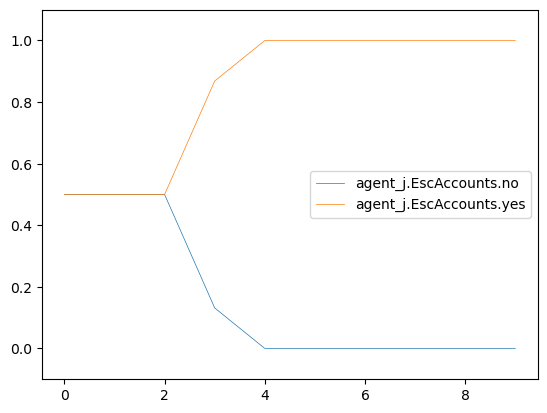

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount  ManipulateData  
2                      1.0            Nop    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop       FileRecon  
6                      1.0            Nop  ManipulateData  
7                      1.0            Nop            Exit  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

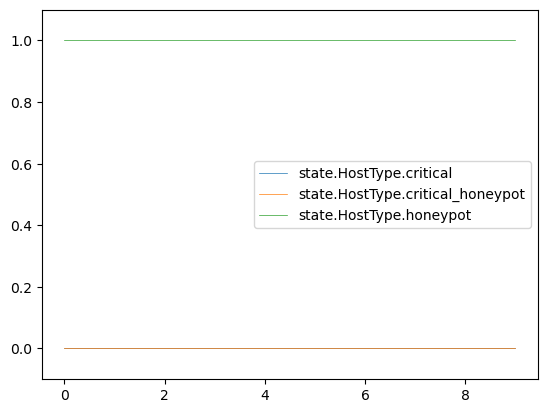

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount  ManipulateData   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                             none

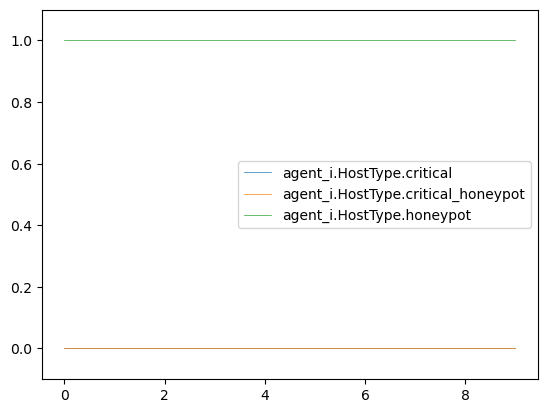

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0  ManipulateData   DecoyAccount   
2                        0.0    EnumAccounts            Nop   
3                        0.0      PrivEscAcc            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0       FileRecon            Nop   
6                        0.0  ManipulateData            Nop   
7                        0.0            Exit            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

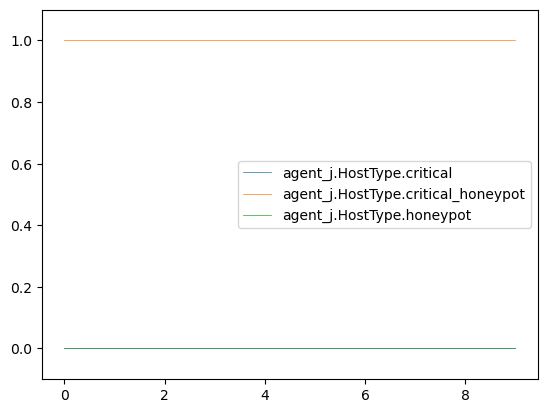

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount  ManipulateData
2                 0.0                  1.0            Nop    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

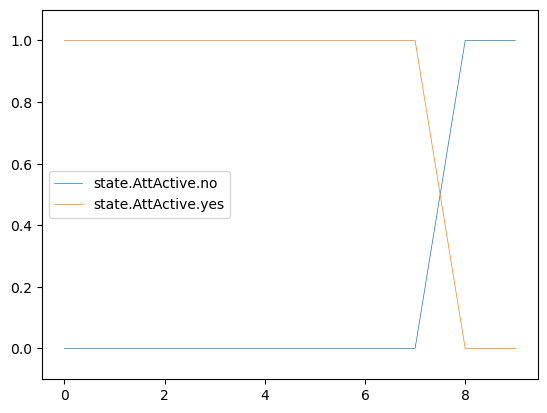

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount  ManipulateData   
2              0.000000               1.000000            Nop    EnumAccounts   
3              0.000092               0.999908            Nop      PrivEscAcc   
4              0.216272               0.783728            Nop       FileRecon   
5              0.168049               0.831951            Nop       FileRecon   
6              0.084411               0.915589            Nop  ManipulateData   
7              0.071115               0.928885            Nop            Exit   
8              0.994481               0.005519            Nop             Nop   
9              0.999989               0.000011            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                             none

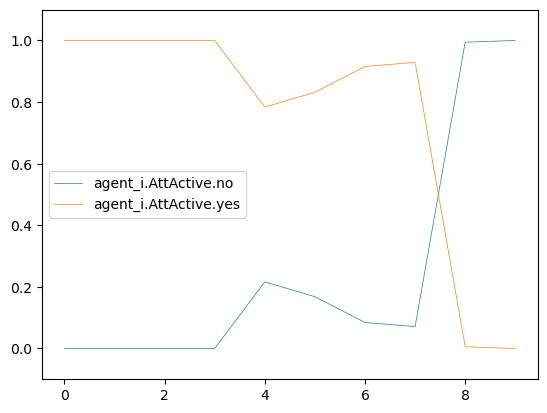

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData   DecoyAccount   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

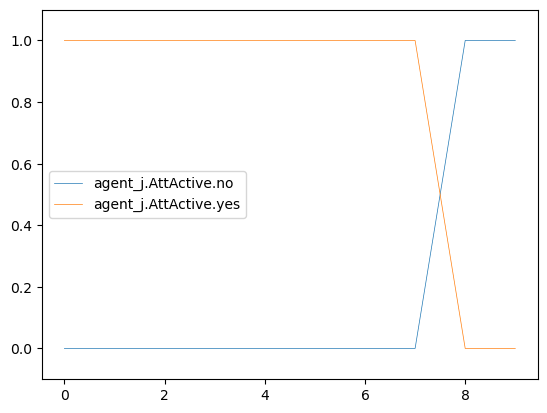

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount  ManipulateData
2                   1.0                   0.0            Nop    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop       FileRecon
6                   1.0                   0.0            Nop  ManipulateData
7                   1.0                   0.0            Nop            Exit
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

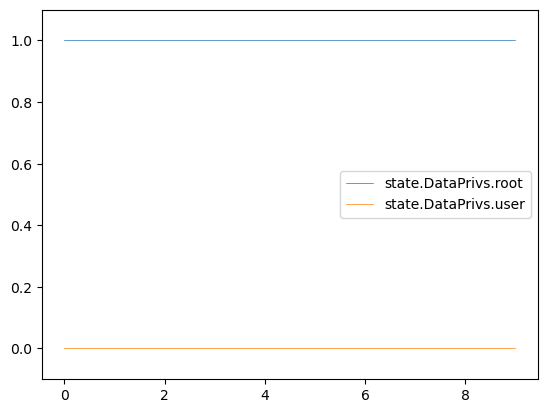

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

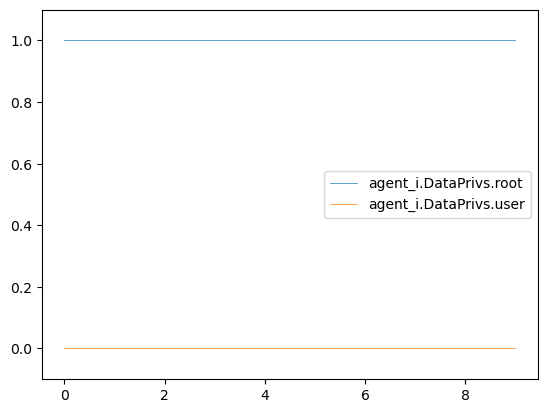

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.208341                0.791659  ManipulateData   
2                0.604920                0.395080    EnumAccounts   
3                0.604924                0.395076      PrivEscAcc   
4                0.604928                0.395072       FileRecon   
5                0.552969                0.447031       FileRecon   
6                0.670275                0.329725  ManipulateData   
7                0.767618                0.232382            Exit   
8                0.767620                0.232380             Nop   
9                0.767622                0.232378             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

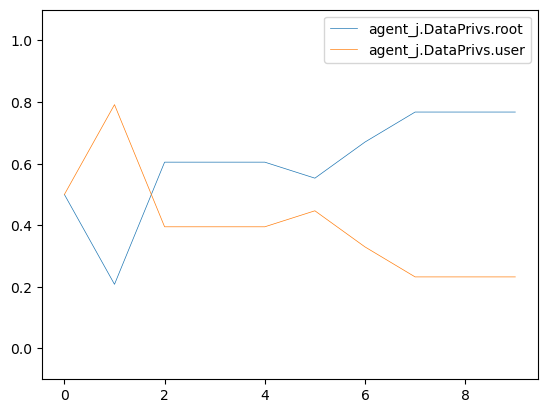

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

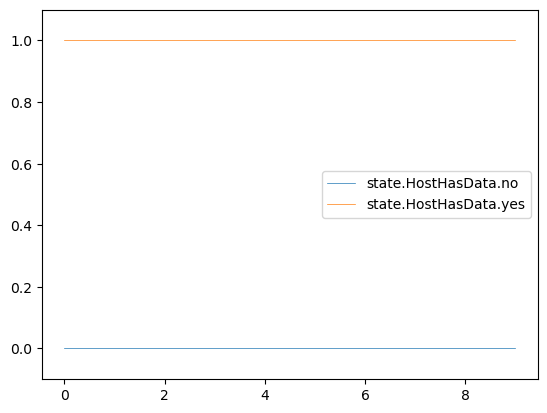

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

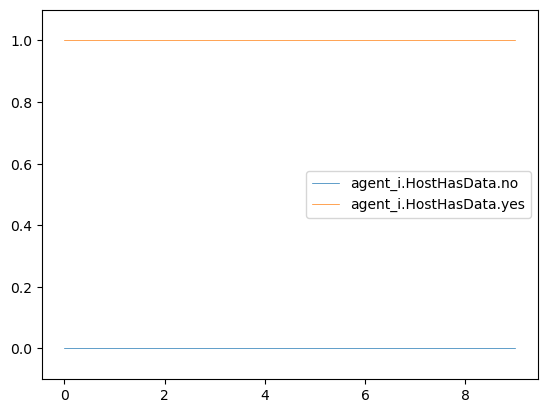

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.208333                 0.791667  ManipulateData   
2                0.604893                 0.395107    EnumAccounts   
3                0.604893                 0.395107      PrivEscAcc   
4                0.604893                 0.395107       FileRecon   
5                0.802585                 0.197415       FileRecon   
6                0.364297                 0.635703  ManipulateData   
7                0.000593                 0.999407            Exit   
8                0.000593                 0.999407             Nop   
9                0.000593                 0.999407             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

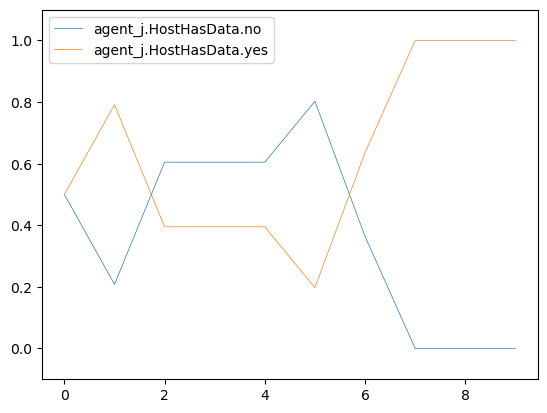

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

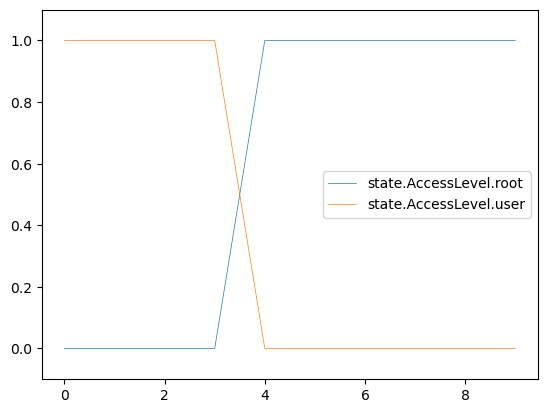

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.074294                  0.925706            Nop   
4                  0.409433                  0.590567            Nop   
5                  0.791313                  0.208687            Nop   
6                  0.918935                  0.081065            Nop   
7                  0.979925                  0.020075            Nop   
8                  0.979262                  0.020738            Nop   
9                  0.979261                  0.020739            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

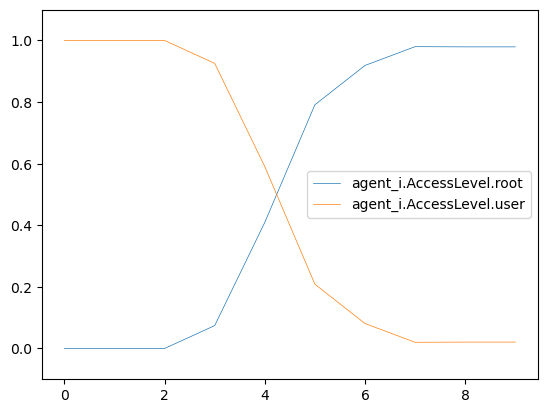

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999794                  0.000207       FileRecon   
5                  0.999742                  0.000258       FileRecon   
6                  0.999857                  0.000143  ManipulateData   
7                  0.999952                  0.000048            Exit   
8                  0.999952                  0.000048             Nop   
9                  0.999952                  0.000048             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

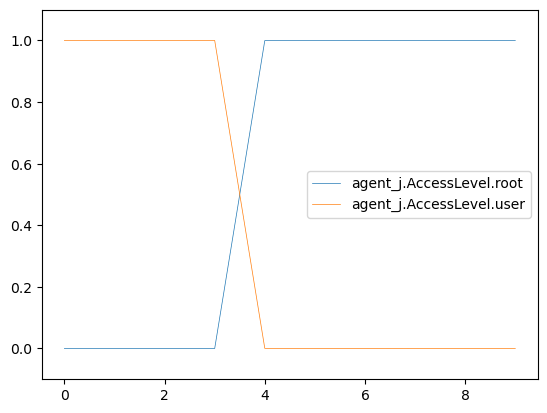

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

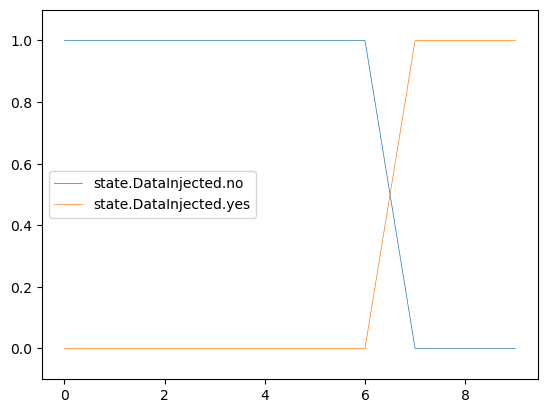

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.987874                  0.012126            Nop   
6                 0.803937                  0.196063            Nop   
7                 0.102913                  0.897087            Nop   
8                 0.068008                  0.931992            Nop   
9                 0.067938                  0.932062            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

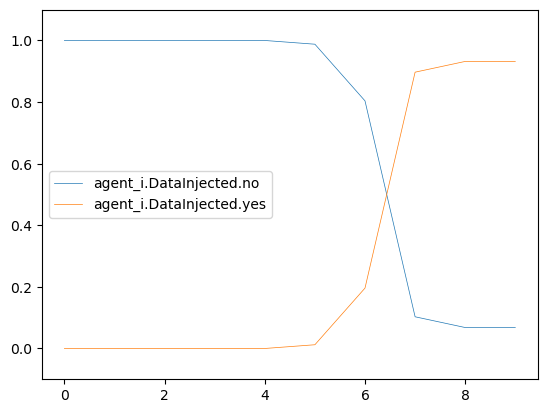

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.998093                  0.001907    EnumAccounts   
3                 0.998093                  0.001907      PrivEscAcc   
4                 0.998093                  0.001907       FileRecon   
5                 0.999719                  0.000281       FileRecon   
6                 0.998851                  0.001149  ManipulateData   
7                 0.000628                  0.999372            Exit   
8                 0.000628                  0.999372             Nop   
9                 0.000628                  0.999372             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

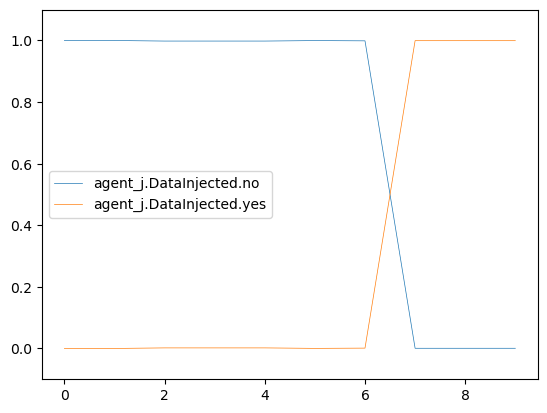

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

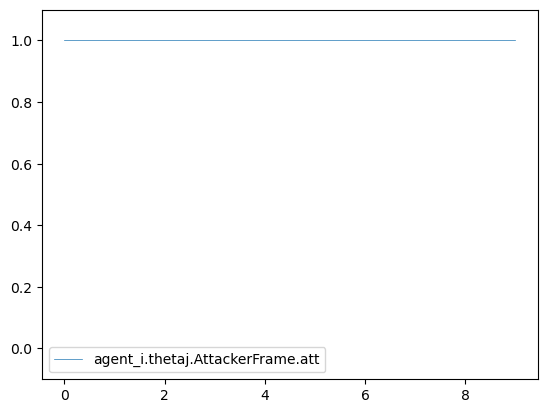

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

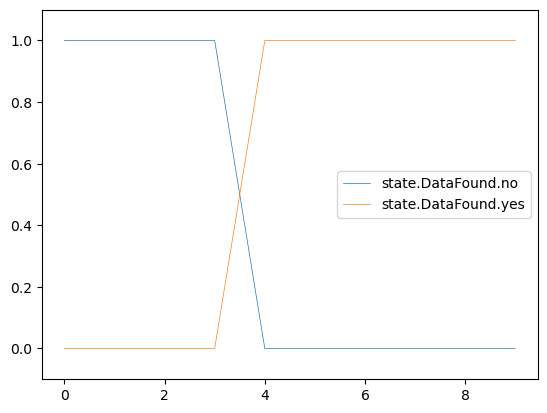

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop  ManipulateData   
5              0.075347               0.924654            Nop            Exit   
6              0.022530               0.977470            Nop             Nop   
7              0.020768               0.979232            Nop             Nop   
8              0.020766               0.979234            Nop             Nop   
9              0.020766               0.979234            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

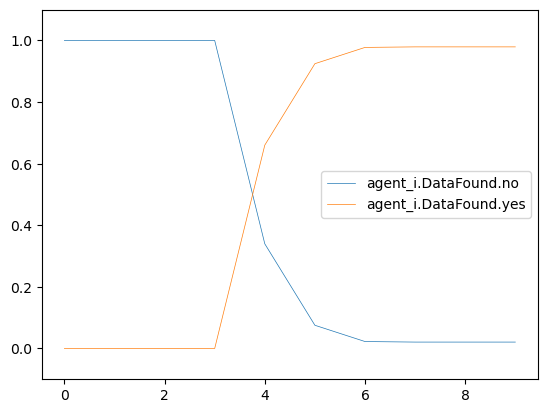

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.211914               0.788086  ManipulateData            Nop   
5              0.000269               0.999731            Exit            Nop   
6              0.000269               0.999731             Nop            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

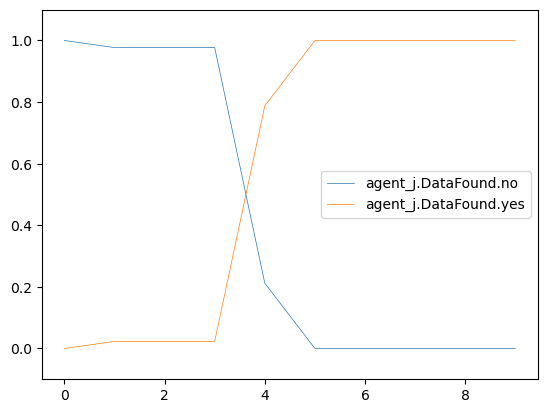

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

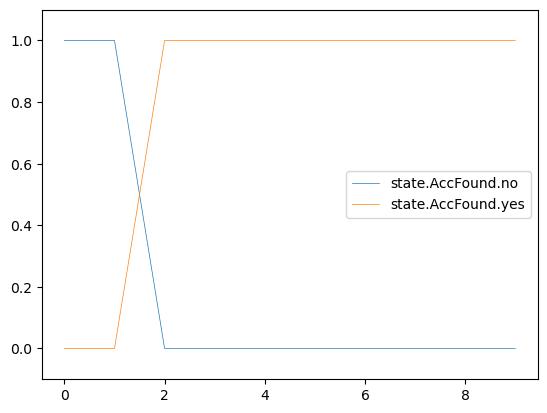

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop  ManipulateData   
5             0.017132              0.982868            Nop            Exit   
6             0.018896              0.981104            Nop             Nop   
7             0.019040              0.980960            Nop             Nop   
8             0.019044              0.980956            Nop             Nop   
9             0.019044              0.980956            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

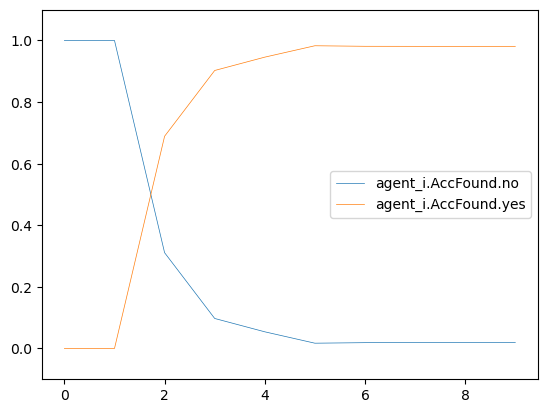

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.171048              0.828952      PrivEscAcc            Nop   
3             0.000207              0.999794       FileRecon            Nop   
4             0.000104              0.999896  ManipulateData            Nop   
5             0.000060              0.999940            Exit            Nop   
6             0.000060              0.999940             Nop            Nop   
7             0.000060              0.999940             Nop            Nop   
8             0.000060              0.999940             Nop            Nop   
9             0.000060              0.999940             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

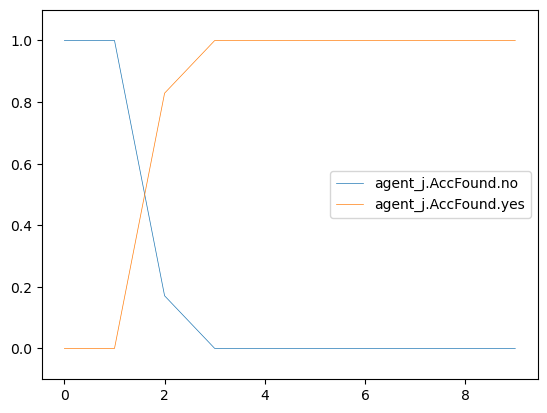

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

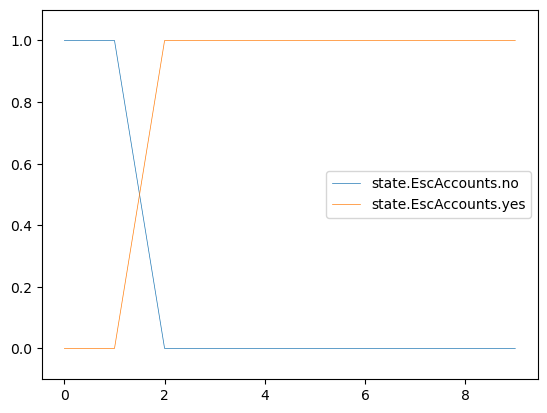

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

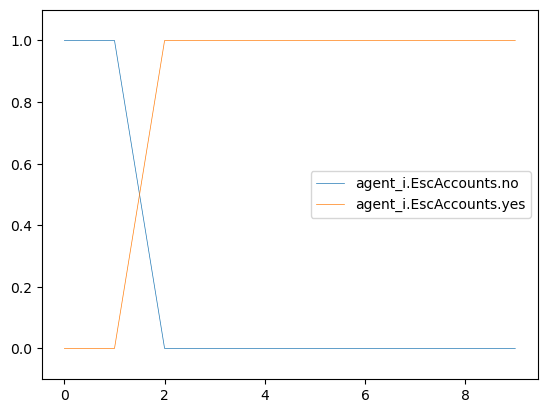

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005    EnumAccounts   
2                0.131574                 0.868426      PrivEscAcc   
3                0.000159                 0.999841       FileRecon   
4                0.000080                 0.999920  ManipulateData   
5                0.000046                 0.999954            Exit   
6                0.000046                 0.999954             Nop   
7                0.000046                 0.999954             Nop   
8                0.000046                 0.999954             Nop   
9                0.000046                 0.999954             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           failure  
9                           failure

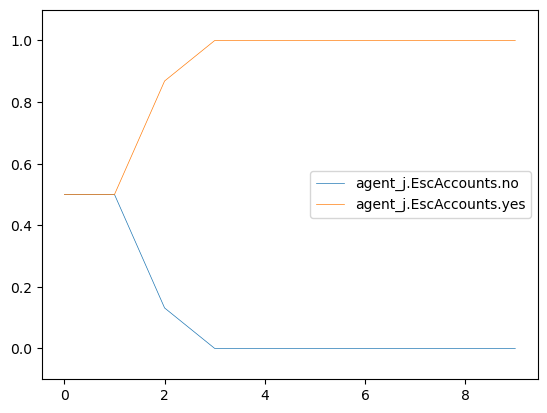

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

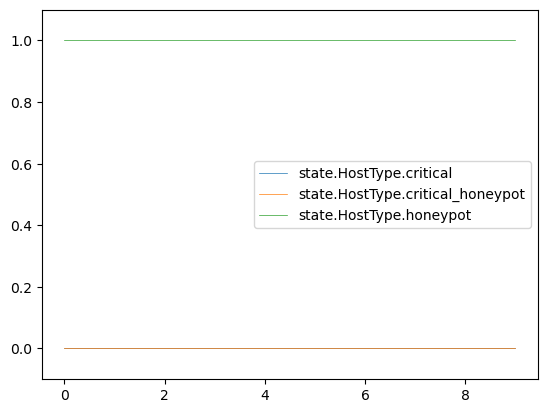

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

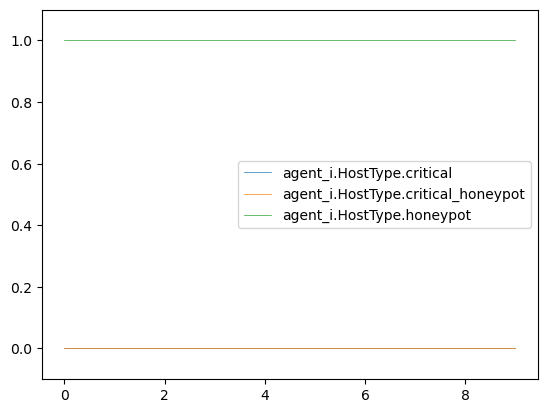

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

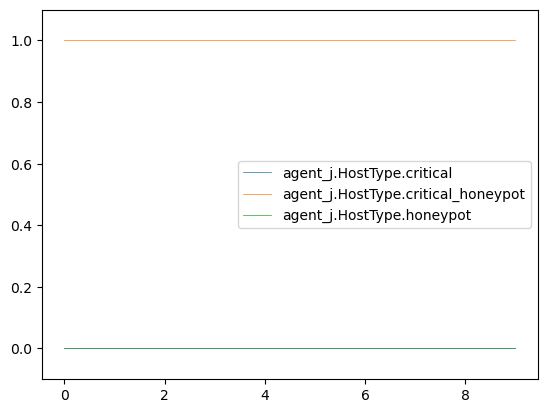

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

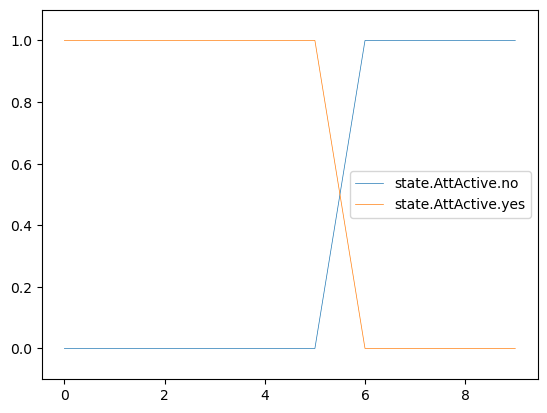

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999967e-01            Nop       FileRecon   
4              0.009350           9.906496e-01            Nop  ManipulateData   
5              0.010945           9.890546e-01            Nop            Exit   
6              0.982698           1.730196e-02            Nop             Nop   
7              0.998717           1.283457e-03            Nop             Nop   
8              0.999967           3.274891e-05            Nop             Nop   
9              1.000000           2.161467e-10            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

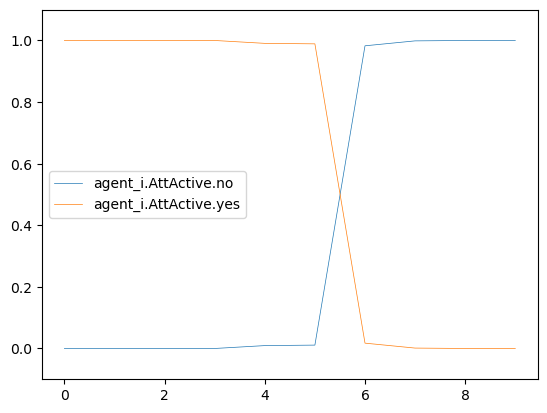

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

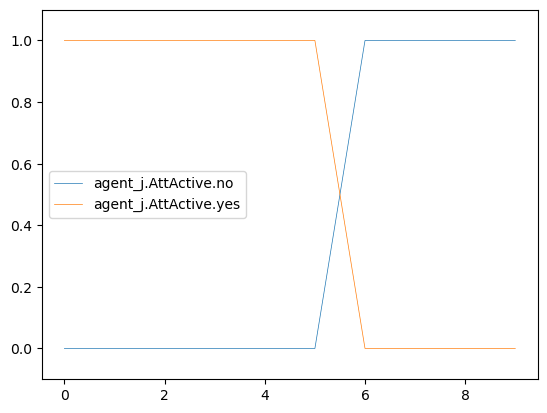

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

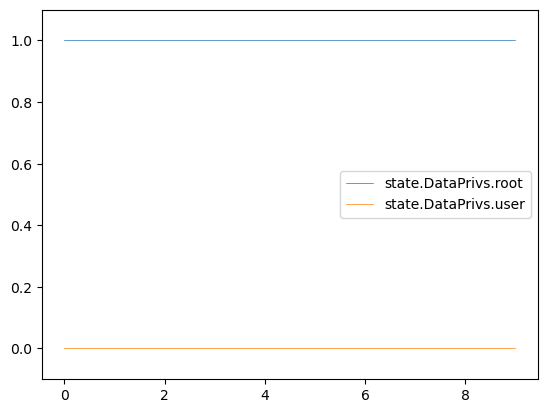

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

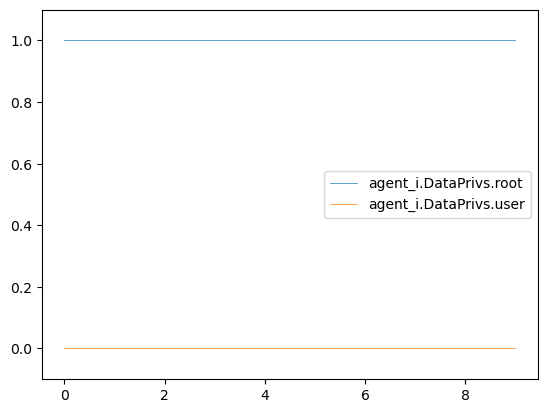

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592109                0.407891    EnumAccounts   
2                0.592113                0.407886      PrivEscAcc   
3                0.592118                0.407882       FileRecon   
4                0.673738                0.326262  ManipulateData   
5                0.708589                0.291411            Exit   
6                0.708592                0.291408             Nop   
7                0.708595                0.291405             Nop   
8                0.708598                0.291402             Nop   
9                0.708601                0.291399             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           failure  
9                           failure

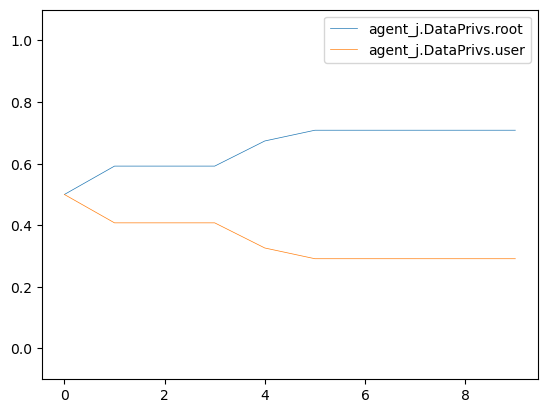

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

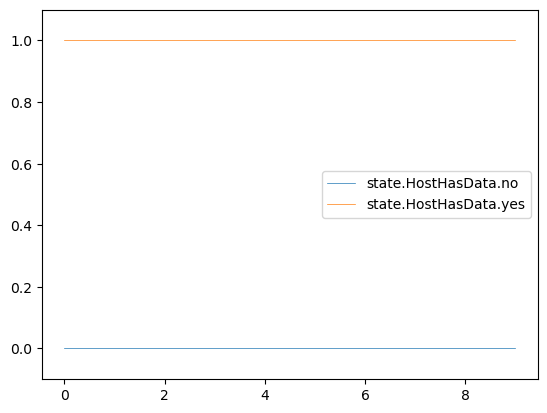

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

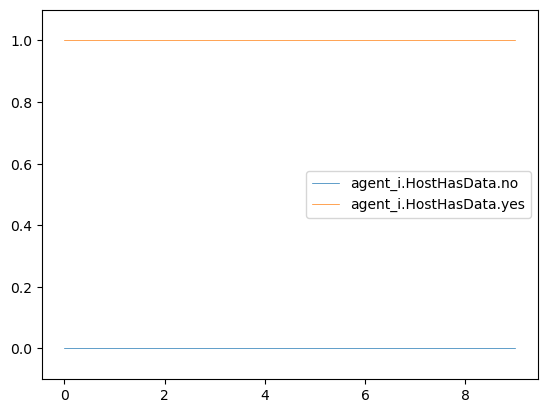

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.177323                 0.822677  ManipulateData   
5                0.000225                 0.999775            Exit   
6                0.000225                 0.999775             Nop   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           failure  
9                           failure

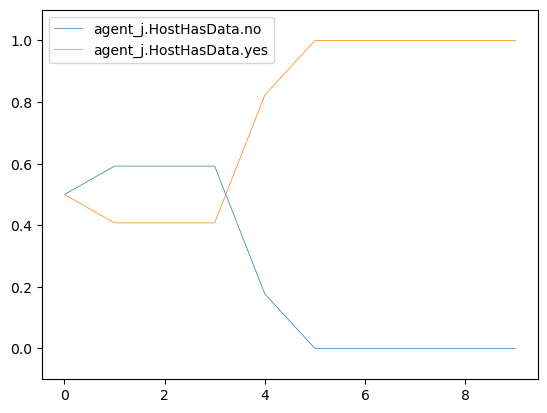

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

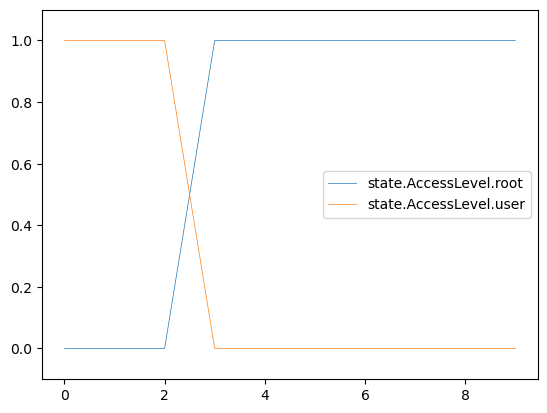

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.982340                  0.017660            Nop   
6                  0.980521                  0.019479            Nop   
7                  0.980372                  0.019628            Nop   
8                  0.980368                  0.019632            Nop   
9                  0.980368                  0.019632            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

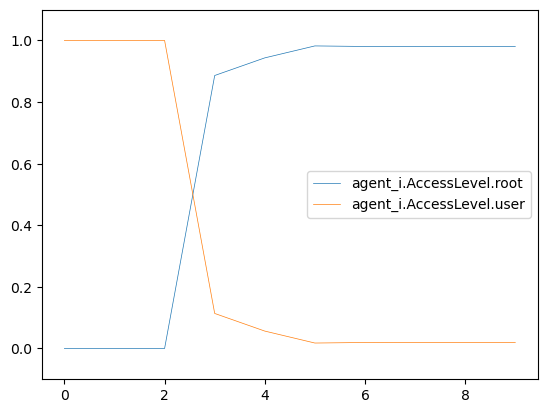

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999794                  0.000207       FileRecon   
4                  0.999896                  0.000104  ManipulateData   
5                  0.999940                  0.000060            Exit   
6                  0.999940                  0.000060             Nop   
7                  0.999940                  0.000060             Nop   
8                  0.999940                  0.000060             Nop   
9                  0.999940                  0.000060             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           failure  
9                           failure

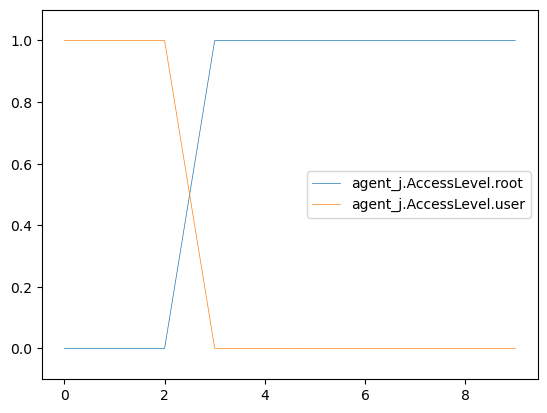

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

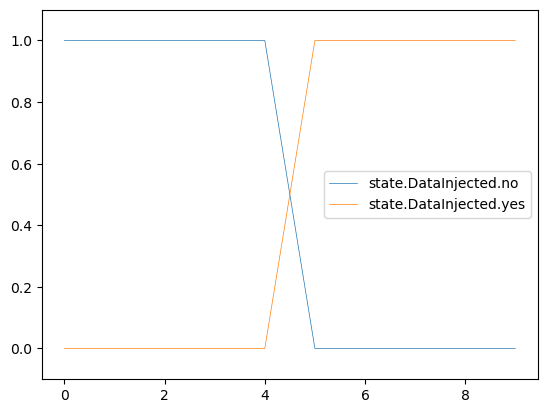

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.126646                  0.873354            Nop   
6                 0.029529                  0.970471            Nop   
7                 0.021270                  0.978730            Nop   
8                 0.021047                  0.978953            Nop   
9                 0.021047                  0.978953            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

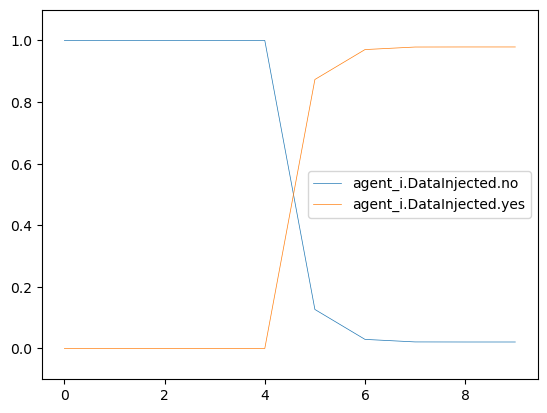

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000269                  0.999731            Exit   
6                 0.000269                  0.999731             Nop   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           failure  
9                           failure

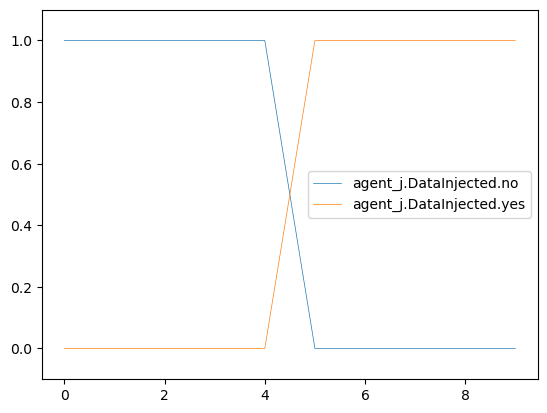

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                   login_activity
5                               1.0                       file_write
6                               1.0                        file_enum
7                               1.0                       file_write
8                               1.0                       file_write
9                               1.0                             none

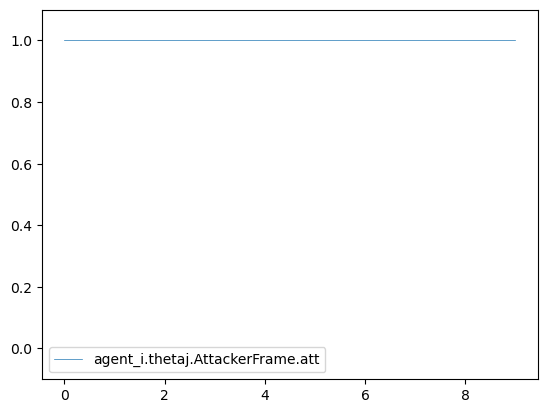

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

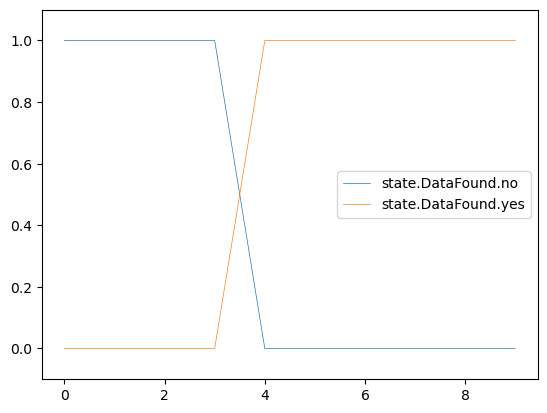

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.579282               0.420718            Nop       FileRecon   
5              0.459130               0.540870            Nop  ManipulateData   
6              0.233501               0.766498            Nop            Exit   
7              0.231218               0.768782            Nop             Nop   
8              0.206399               0.793601            Nop             Nop   
9              0.204832               0.795168            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

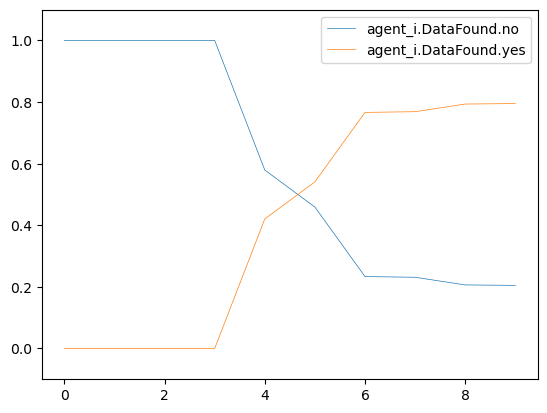

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.956103               0.043897       FileRecon            Nop   
5              0.380691               0.619309  ManipulateData            Nop   
6              0.000615               0.999385            Exit            Nop   
7              0.000615               0.999385             Nop            Nop   
8              0.000615               0.999385             Nop            Nop   
9              0.000615               0.999385             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

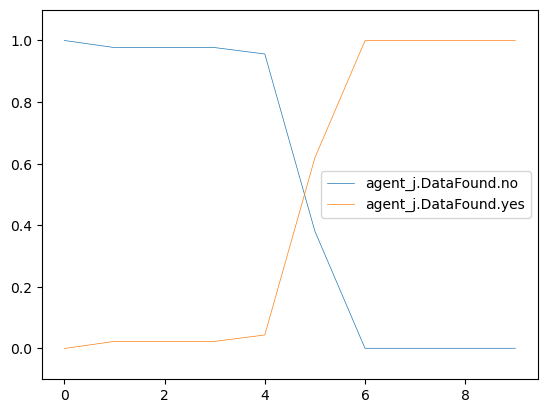

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

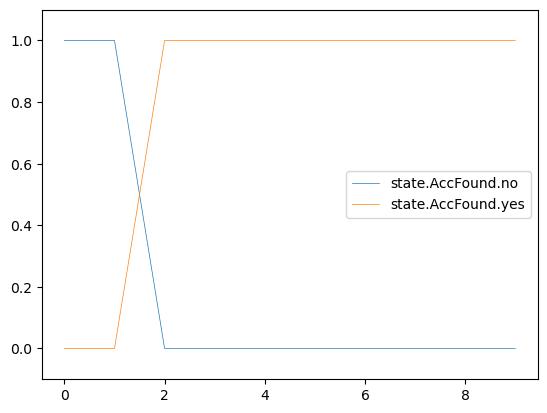

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310938              0.689063            Nop      PrivEscAcc   
3             0.619900              0.380100            Nop       FileRecon   
4             0.315250              0.684750            Nop       FileRecon   
5             0.315250              0.684750            Nop  ManipulateData   
6             0.165466              0.834534            Nop            Exit   
7             0.160851              0.839149            Nop             Nop   
8             0.141445              0.858555            Nop             Nop   
9             0.140164              0.859836            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

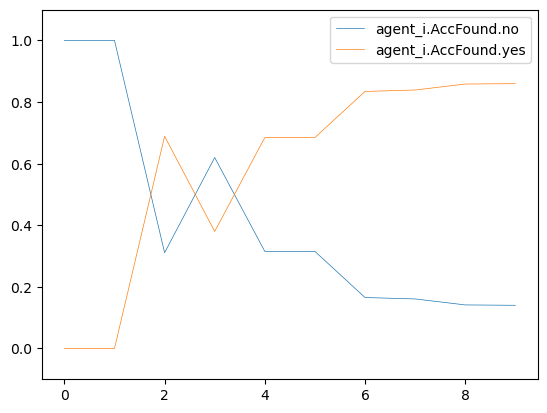

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.171048              0.828952      PrivEscAcc            Nop   
3             0.000207              0.999794       FileRecon            Nop   
4             0.000258              0.999742       FileRecon            Nop   
5             0.000144              0.999856  ManipulateData            Nop   
6             0.000051              0.999949            Exit            Nop   
7             0.000051              0.999949             Nop            Nop   
8             0.000051              0.999949             Nop            Nop   
9             0.000051              0.999949             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

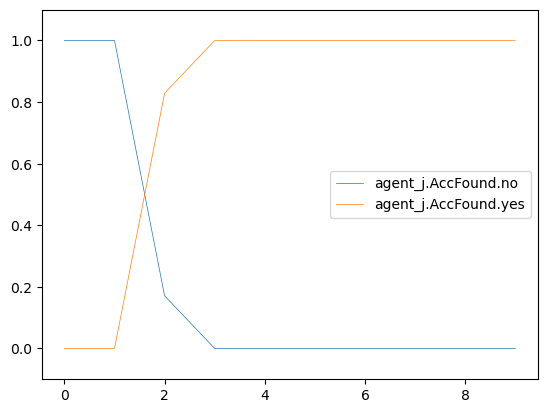

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

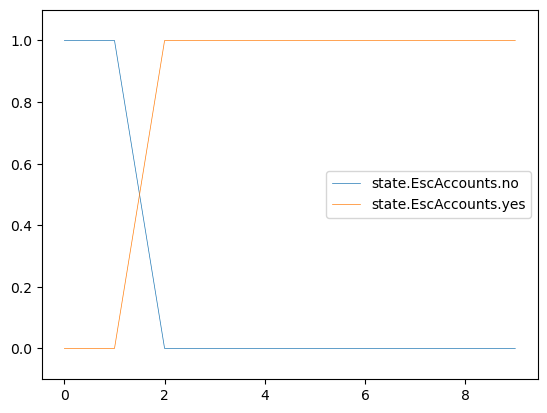

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                   login_activity  
5  ManipulateData                       file_write  
6            Exit                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

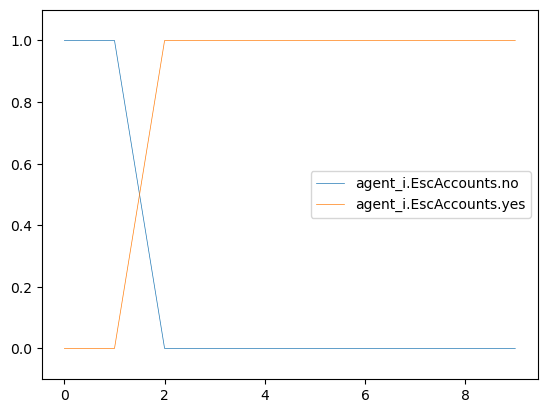

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005    EnumAccounts   
2                0.131574                 0.868426      PrivEscAcc   
3                0.000159                 0.999841       FileRecon   
4                0.000198                 0.999802       FileRecon   
5                0.000111                 0.999889  ManipulateData   
6                0.000040                 0.999961            Exit   
7                0.000040                 0.999961             Nop   
8                0.000040                 0.999961             Nop   
9                0.000040                 0.999961             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

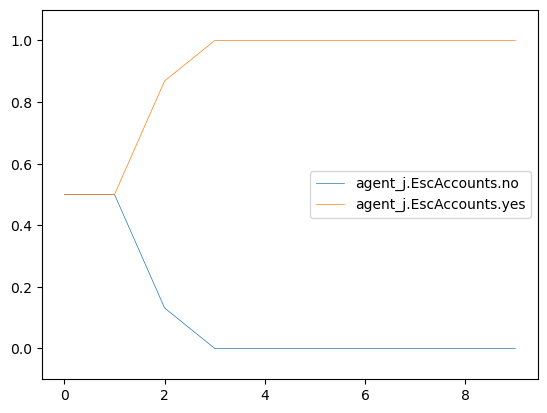

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

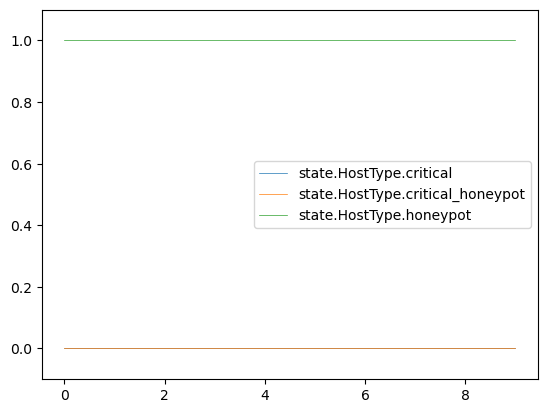

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

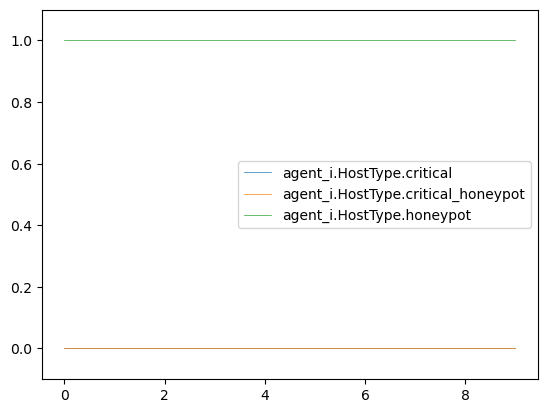

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0  ManipulateData            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

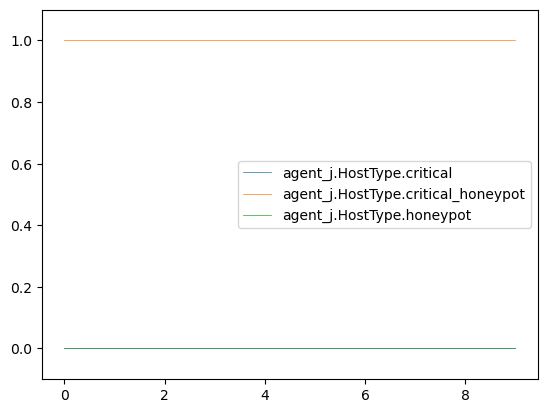

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

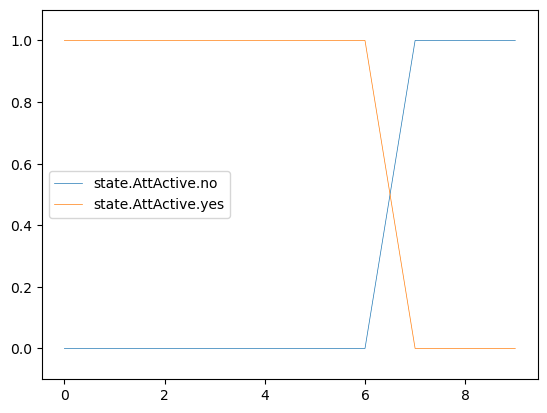

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount    EnumAccounts   
2              0.000000               1.000000            Nop      PrivEscAcc   
3              0.000005               0.999995            Nop       FileRecon   
4              0.291929               0.708071            Nop       FileRecon   
5              0.382706               0.617294            Nop  ManipulateData   
6              0.402672               0.597328            Nop            Exit   
7              0.938130               0.061870            Nop             Nop   
8              0.857056               0.142944            Nop             Nop   
9              0.989432               0.010568            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

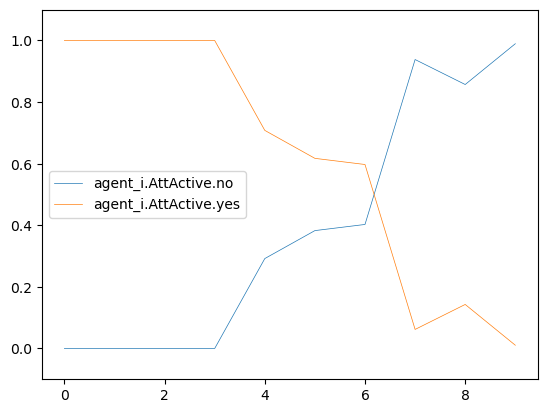

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

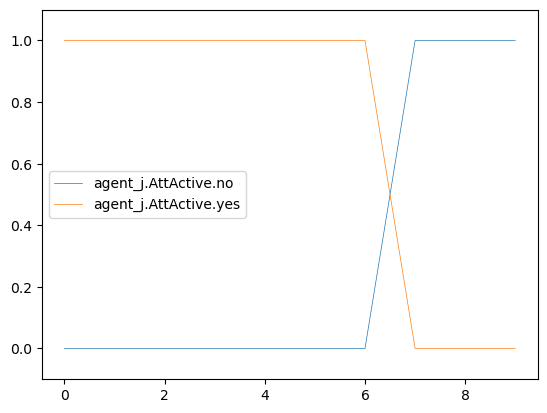

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

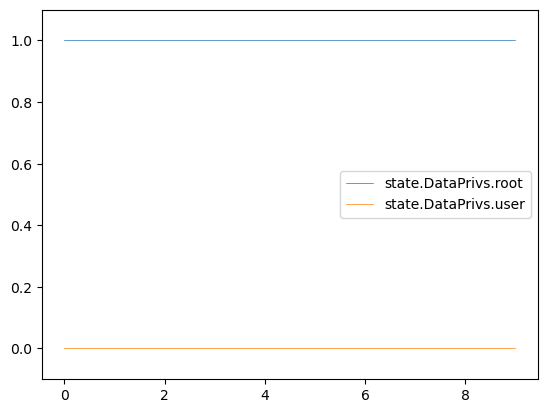

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                   login_activity  
5  ManipulateData                       file_write  
6            Exit                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

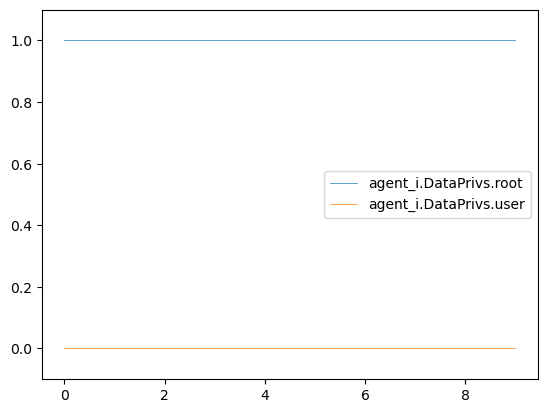

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592109                0.407891    EnumAccounts   
2                0.592113                0.407886      PrivEscAcc   
3                0.592118                0.407882       FileRecon   
4                0.551207                0.448793       FileRecon   
5                0.661655                0.338345  ManipulateData   
6                0.751694                0.248307            Exit   
7                0.751696                0.248304             Nop   
8                0.751698                0.248302             Nop   
9                0.751701                0.248299             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

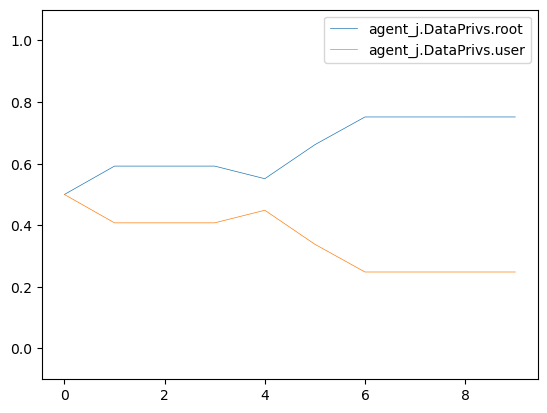

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

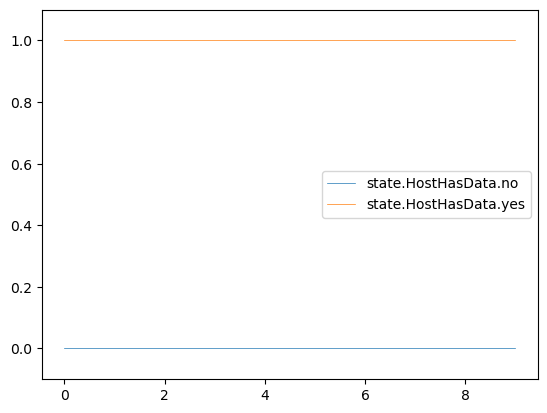

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                   login_activity  
5  ManipulateData                       file_write  
6            Exit                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

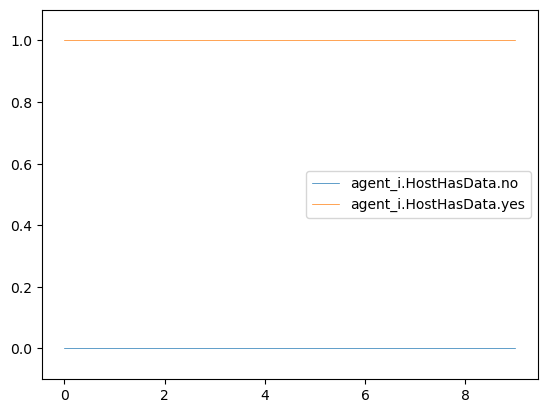

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.800038                 0.199962       FileRecon   
5                0.359620                 0.640380  ManipulateData   
6                0.000581                 0.999419            Exit   
7                0.000581                 0.999419             Nop   
8                0.000581                 0.999419             Nop   
9                0.000581                 0.999419             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

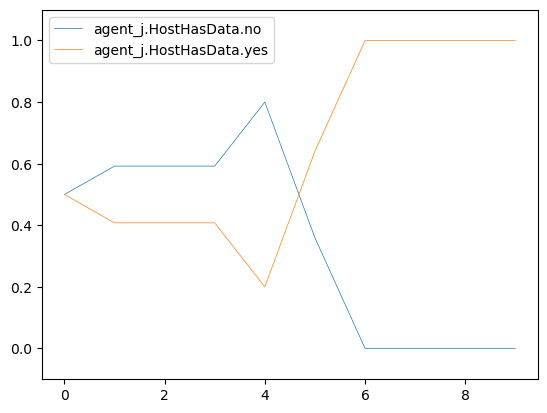

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

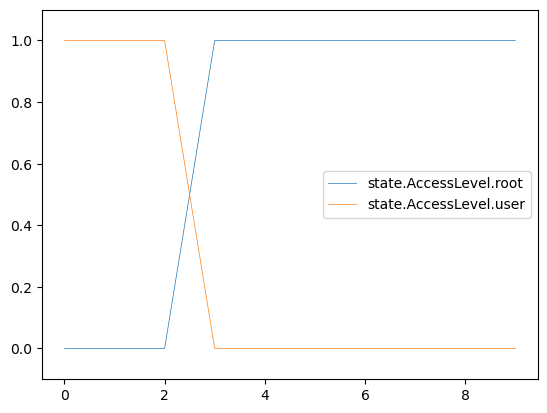

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.199936                  0.800064            Nop   
4                  0.610556                  0.389444            Nop   
5                  0.610556                  0.389444            Nop   
6                  0.795627                  0.204373            Nop   
7                  0.801330                  0.198670            Nop   
8                  0.825300                  0.174700            Nop   
9                  0.826882                  0.173118            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                   login_activity  
5  ManipulateData                       file_write  
6            Exit                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

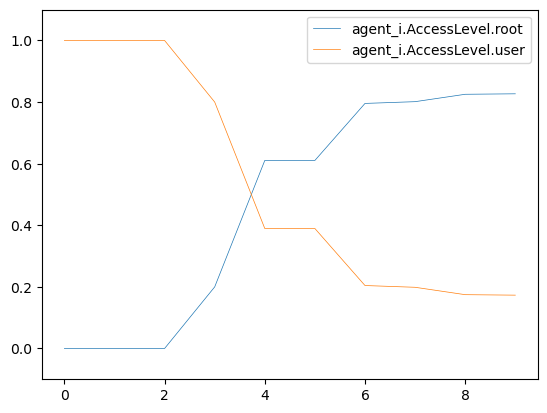

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999794                  0.000207       FileRecon   
4                  0.999742                  0.000258       FileRecon   
5                  0.999856                  0.000144  ManipulateData   
6                  0.999949                  0.000051            Exit   
7                  0.999949                  0.000051             Nop   
8                  0.999949                  0.000051             Nop   
9                  0.999949                  0.000051             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

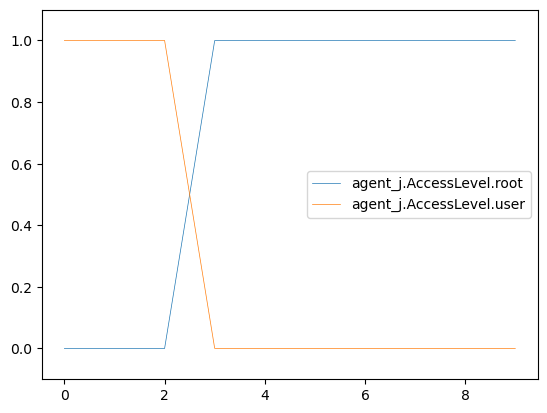

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

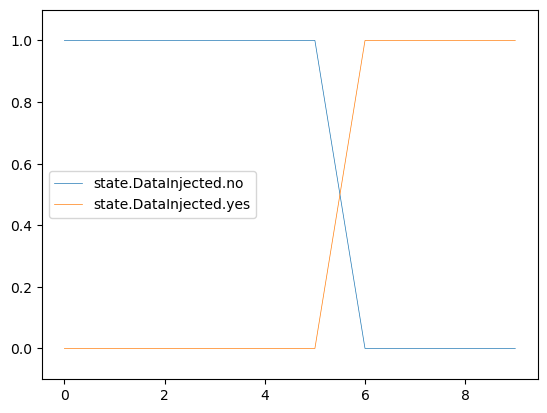

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.621354                  0.378646            Nop   
6                 0.265645                  0.734355            Nop   
7                 0.257827                  0.742173            Nop   
8                 0.211804                  0.788196            Nop   
9                 0.208740                  0.791260            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                   login_activity  
5  ManipulateData                       file_write  
6            Exit                        file_enum  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

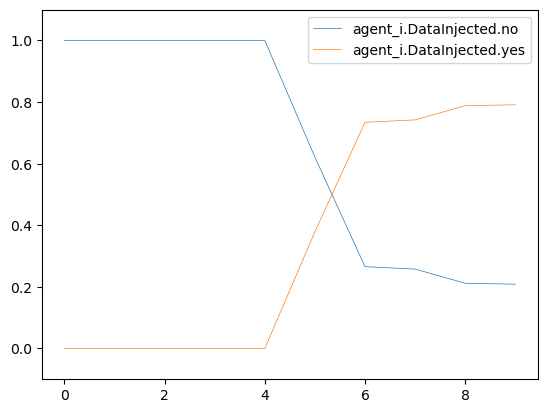

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000615                  0.999385            Exit   
7                 0.000615                  0.999385             Nop   
8                 0.000615                  0.999385             Nop   
9                 0.000615                  0.999385             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

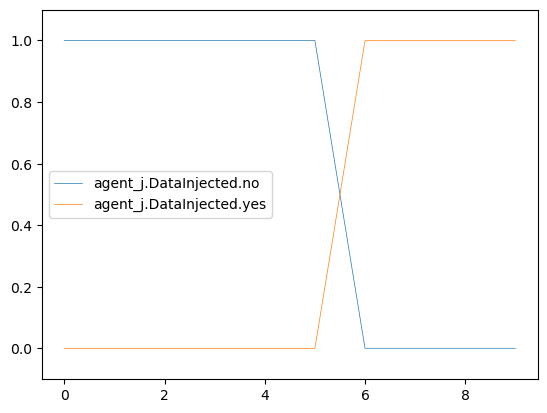

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                   login_activity
8                               1.0                             none
9                               1.0                   login_activity

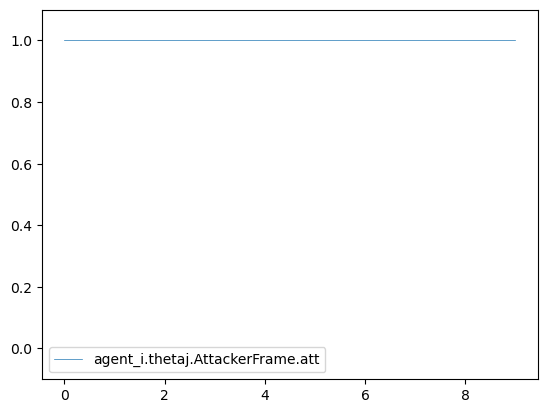

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0   DecoyAccount    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

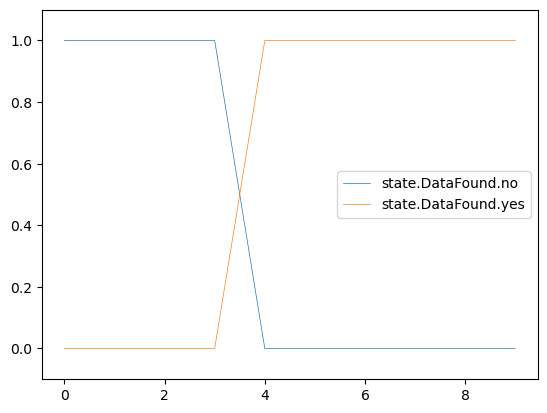

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.345530               0.654470            Nop  ManipulateData   
5              0.077594               0.922407            Nop            Exit   
6              0.025055               0.974945            Nop             Nop   
7              0.023816               0.976184            Nop             Nop   
8              0.023816               0.976184            Nop             Nop   
9              0.023816               0.976184            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                   login_activity  
8                             none  
9                   login_activity

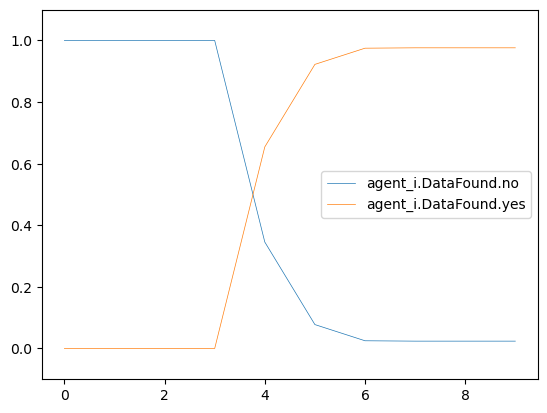

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.211914               0.788086  ManipulateData            Nop   
5              0.000269               0.999731            Exit            Nop   
6              0.000269               0.999731             Nop            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           failure

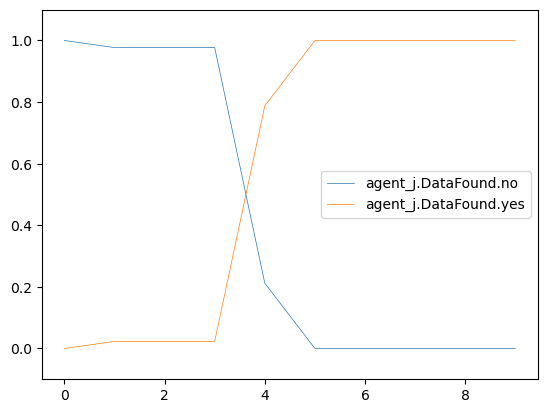

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0   DecoyAccount    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

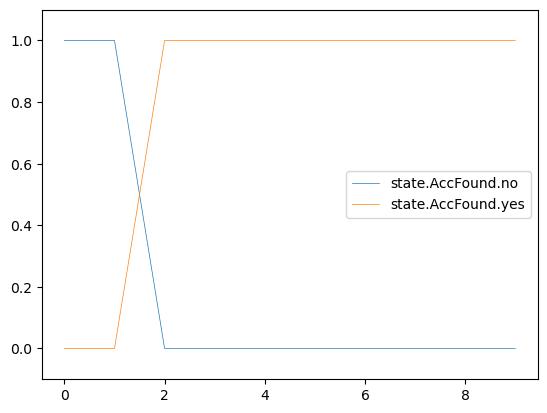

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.370000              0.630000            Nop      PrivEscAcc   
3             0.101242              0.898758            Nop       FileRecon   
4             0.059157              0.940843            Nop  ManipulateData   
5             0.018945              0.981055            Nop            Exit   
6             0.020897              0.979103            Nop             Nop   
7             0.020897              0.979103            Nop             Nop   
8             0.020897              0.979103            Nop             Nop   
9             0.020897              0.979103            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                   login_activity  
8                             none  
9                   login_activity

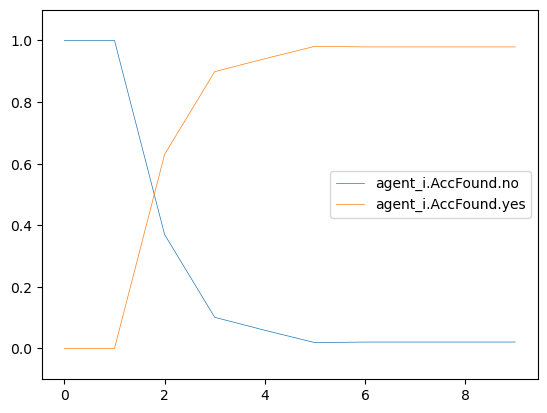

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.171048              0.828952      PrivEscAcc            Nop   
3             0.000207              0.999794       FileRecon            Nop   
4             0.000104              0.999896  ManipulateData            Nop   
5             0.000060              0.999940            Exit            Nop   
6             0.000060              0.999940             Nop            Nop   
7             0.000060              0.999940             Nop            Nop   
8             0.000060              0.999940             Nop            Nop   
9             0.000060              0.999940             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           failure

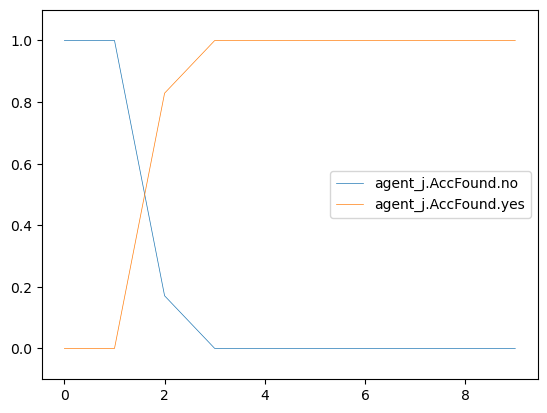

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

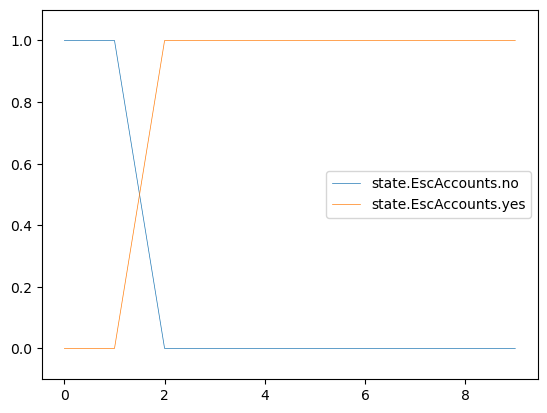

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                   login_activity

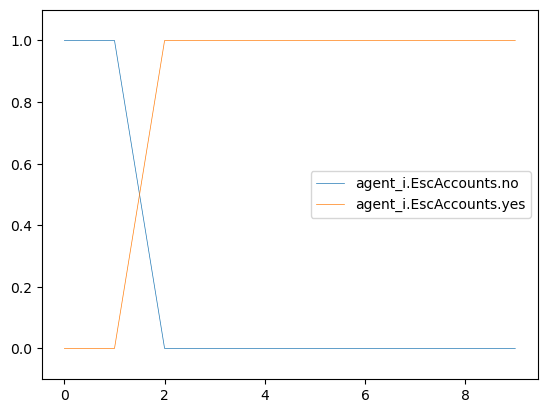

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005    EnumAccounts   
2                0.131574                 0.868426      PrivEscAcc   
3                0.000159                 0.999841       FileRecon   
4                0.000080                 0.999920  ManipulateData   
5                0.000046                 0.999954            Exit   
6                0.000046                 0.999954             Nop   
7                0.000046                 0.999954             Nop   
8                0.000046                 0.999954             Nop   
9                0.000046                 0.999954             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

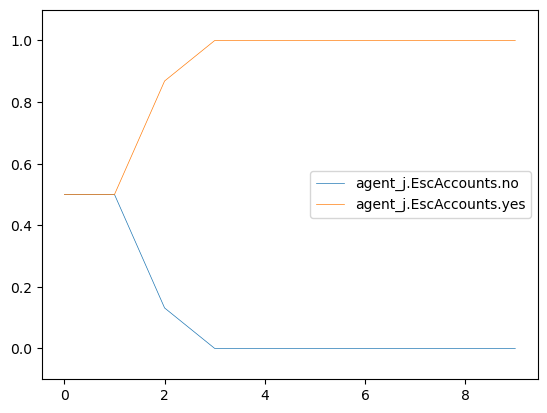

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0   DecoyAccount    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

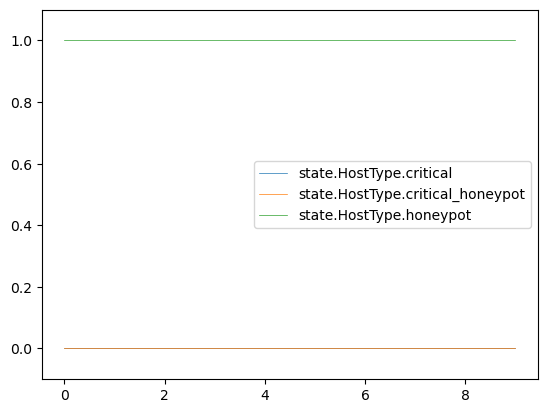

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                   login_activity  
8                             none  
9                   login_activity

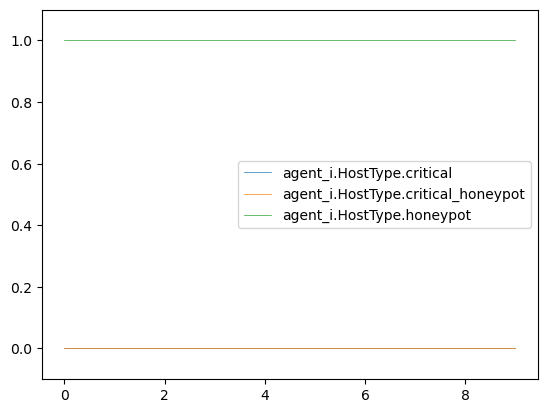

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           failure

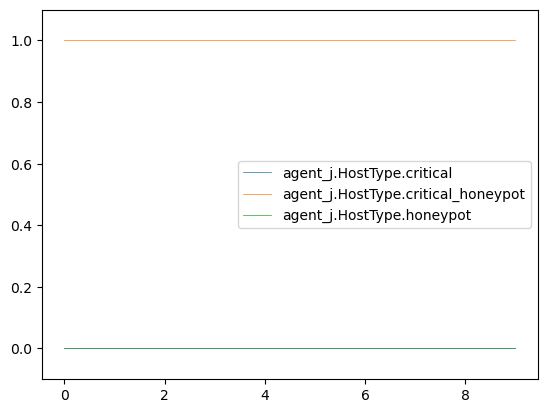

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0   DecoyAccount    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

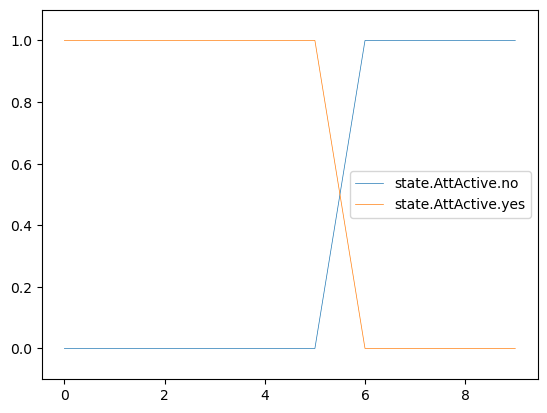

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000022           9.999781e-01            Nop       FileRecon   
4              0.009271           9.907289e-01            Nop  ManipulateData   
5              0.012220           9.877799e-01            Nop            Exit   
6              0.982683           1.731706e-02            Nop             Nop   
7              0.991086           8.914412e-03            Nop             Nop   
8              0.998406           1.594085e-03            Nop             Nop   
9              1.000000           7.336327e-08            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                   login_activity  
8                             none  
9                   login_activity

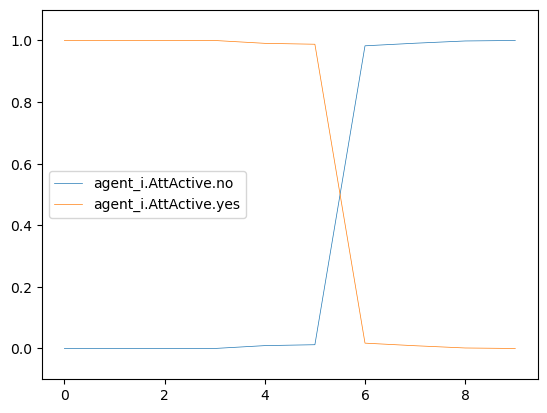

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           failure

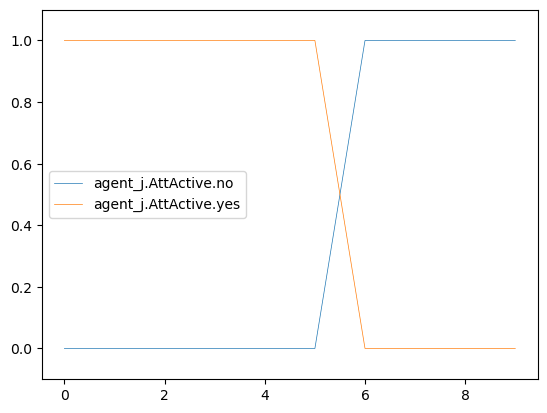

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0   DecoyAccount    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

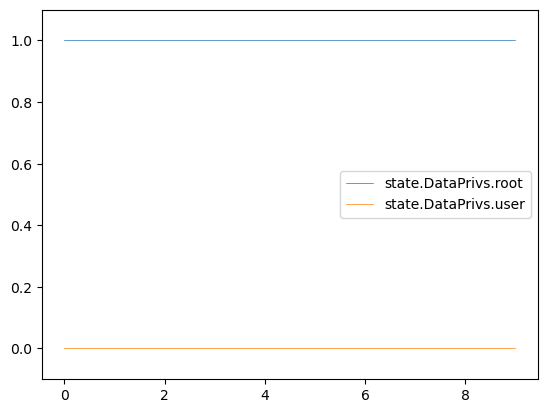

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                   login_activity

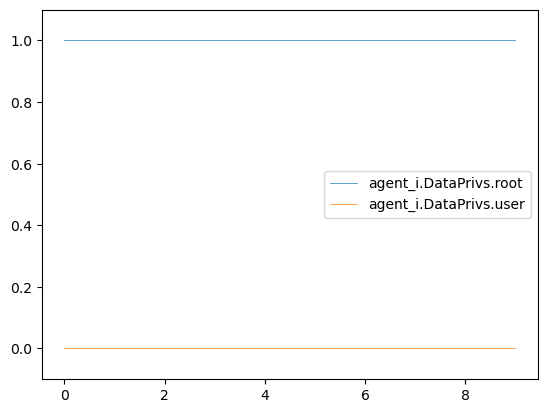

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592109                0.407891    EnumAccounts   
2                0.592113                0.407886      PrivEscAcc   
3                0.592118                0.407882       FileRecon   
4                0.673738                0.326262  ManipulateData   
5                0.708589                0.291411            Exit   
6                0.708592                0.291408             Nop   
7                0.708595                0.291405             Nop   
8                0.708598                0.291402             Nop   
9                0.708601                0.291399             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

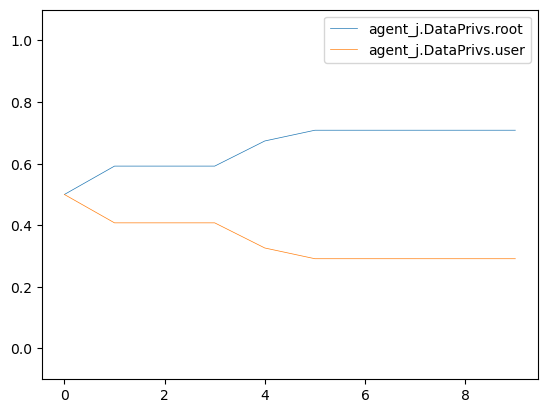

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0   DecoyAccount    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

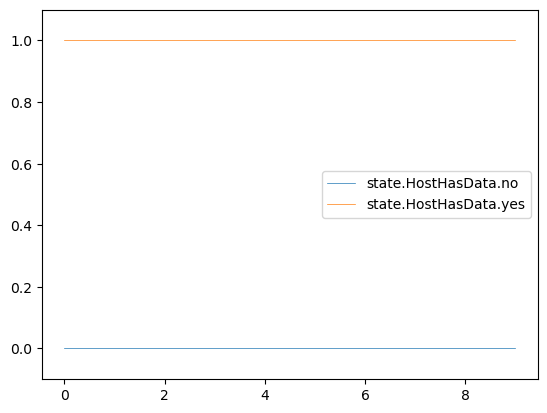

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                   login_activity

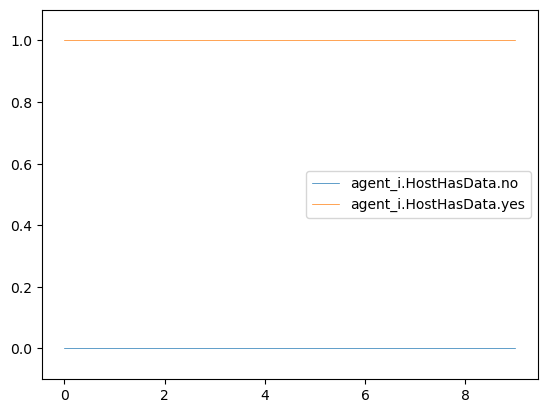

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.177323                 0.822677  ManipulateData   
5                0.000225                 0.999775            Exit   
6                0.000225                 0.999775             Nop   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

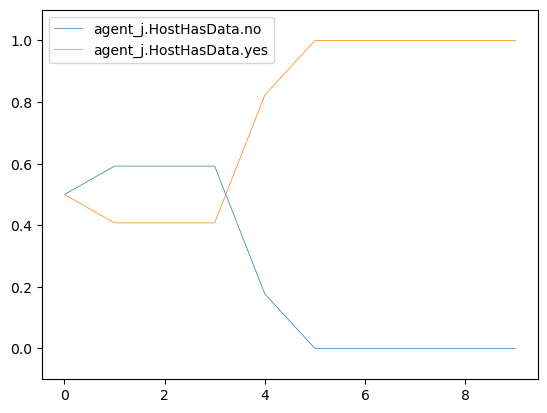

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

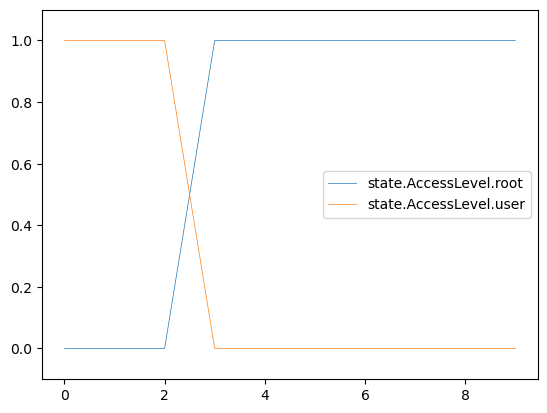

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.869632                  0.130368            Nop   
4                  0.937075                  0.062925            Nop   
5                  0.980051                  0.019949            Nop   
6                  0.977994                  0.022006            Nop   
7                  0.977994                  0.022006            Nop   
8                  0.977994                  0.022006            Nop   
9                  0.977994                  0.022006            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                   login_activity

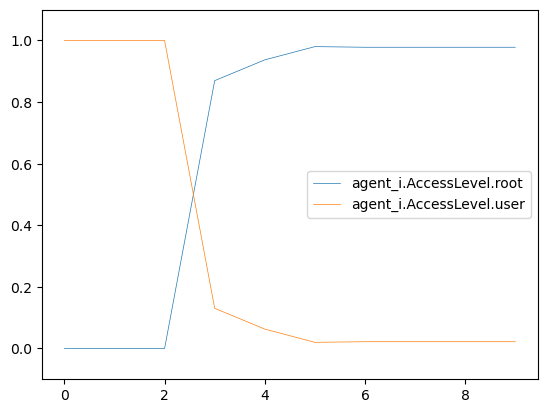

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999794                  0.000207       FileRecon   
4                  0.999896                  0.000104  ManipulateData   
5                  0.999940                  0.000060            Exit   
6                  0.999940                  0.000060             Nop   
7                  0.999940                  0.000060             Nop   
8                  0.999940                  0.000060             Nop   
9                  0.999940                  0.000060             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

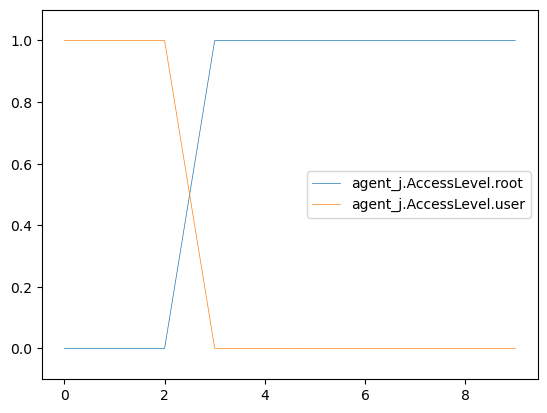

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

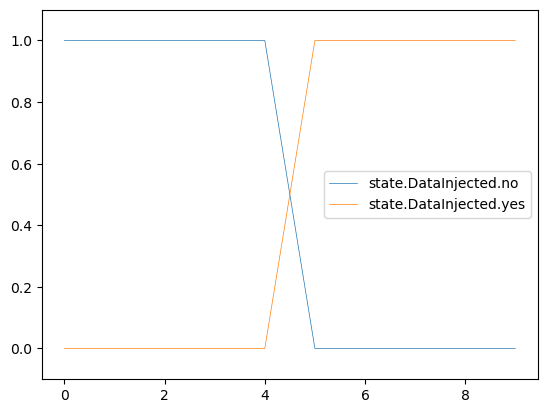

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.129022                  0.870978            Nop   
6                 0.032051                  0.967949            Nop   
7                 0.025768                  0.974232            Nop   
8                 0.024241                  0.975760            Nop   
9                 0.024240                  0.975760            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                   login_activity  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                   login_activity

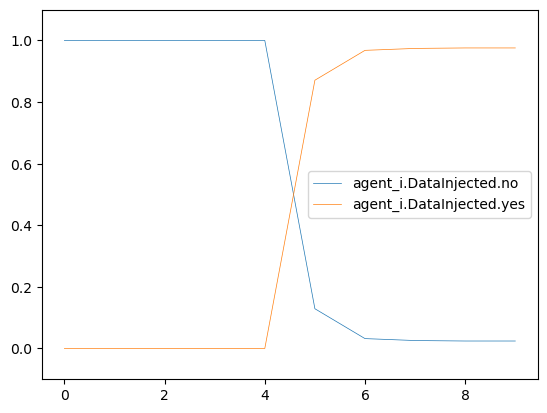

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000269                  0.999731            Exit   
6                 0.000269                  0.999731             Nop   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

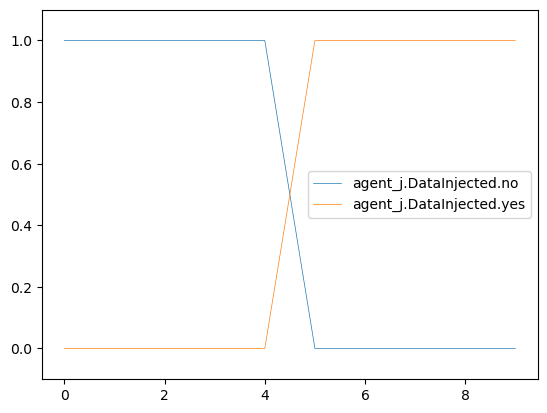

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    